<a href="https://colab.research.google.com/github/RavaUnda/creditCardFraudDetection/blob/main/Credit_card_fraud_detection_3.0.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Credit Card Fraud Detection**

In this project you will predict fraudulent credit card transactions with the help of Machine learning models. Please import the following libraries to get started.

**Business problem overview**
For many banks, retaining high profitable customers is the number one business goal. Banking fraud, however, poses a significant threat to this goal for different banks. In terms of substantial financial losses, trust and credibility, this is a concerning issue to both banks and customers alike.


It has been estimated by Nilson Report that by 2020, banking frauds would account for $30 billion worldwide. With the rise in digital payment channels, the number of fraudulent transactions is also increasing in new and different ways.



In the banking industry, credit card fraud detection using machine learning is not only a trend but a necessity for them to put proactive monitoring and fraud prevention mechanisms in place. Machine learning is helping these institutions to reduce time-consuming manual reviews, costly chargebacks and fees as well as denials of legitimate transactions.



Understanding and defining fraud
Credit card fraud is any dishonest act or behaviour to obtain information without proper authorisation from the account holder for financial gain. Among different ways of committing frauds, skimming is the most common one, which is a way of duplicating information that is located on the magnetic strip of the card. Apart from this, following are the other ways:

* Manipulation/alteration of genuine cards
* Creation of counterfeit cards
* Stealing/loss of credit cards
* Fraudulent telemarketing

In [1]:
# This was used while running the model in Google Colab
from google.colab import drive
drive.mount('/content/drive/')

Drive already mounted at /content/drive/; to attempt to forcibly remount, call drive.mount("/content/drive/", force_remount=True).


In [2]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

from sklearn import metrics
from sklearn import preprocessing

## Exploratory data analysis

In [3]:
import warnings
warnings.filterwarnings('ignore')

In [4]:
pd.set_option('display.max_columns', 500)

In [5]:
df = pd.read_csv('/content/drive/MyDrive/dataset/Creditcard/creditcard.csv')
#/content/drive/MyDrive/dataset/Creditcard/creditcard.csv
df.head()

Time        V1        V2        V3        V4        V5        V6        V7  \
0   0.0 -1.359807 -0.072781  2.536347  1.378155 -0.338321  0.462388  0.239599   
1   0.0  1.191857  0.266151  0.166480  0.448154  0.060018 -0.082361 -0.078803   
2   1.0 -1.358354 -1.340163  1.773209  0.379780 -0.503198  1.800499  0.791461   
3   1.0 -0.966272 -0.185226  1.792993 -0.863291 -0.010309  1.247203  0.237609   
4   2.0 -1.158233  0.877737  1.548718  0.403034 -0.407193  0.095921  0.592941   

         V8        V9       V10       V11       V12       V13       V14  \
0  0.098698  0.363787  0.090794 -0.551600 -0.617801 -0.991390 -0.311169   
1  0.085102 -0.255425 -0.166974  1.612727  1.065235  0.489095 -0.143772   
2  0.247676 -1.514654  0.207643  0.624501  0.066084  0.717293 -0.165946   
3  0.377436 -1.387024 -0.054952 -0.226487  0.178228  0.507757 -0.287924   
4 -0.270533  0.817739  0.753074 -0.822843  0.538196  1.345852 -1.119670   

        V15       V16       V17       V18       V19       V20       V21  \
0  1.468177 -0.470401  0.207971  0.025791  0.403993  0.251412 -0.018307   
1  0.635558  0.463917 -0.114805 -0.183361 -0.145783 -0.069083 -0.225775   
2  2.345865 -2.890083  1.109969 -0.121359 -2.261857  0.524980  0.247998   
3 -0.631418 -1.059647 -0.684093  1.965775 -1.232622 -0.208038 -0.108300   
4  0.175121 -0.451449 -0.237033 -0.038195  0.803487  0.408542 -0.009431   

        V22       V23       V24       V25       V26       V27       V28  \
0  0.277838 -0.110474  0.066928  0.128539 -0.189115  0.133558 -0.021053   
1 -0.638672  0.101288 -0.339846  0.167170  0.125895 -0.008983  0.014724   
2  0.771679  0.909412 -0.689281 -0.327642 -0.139097 -0.055353 -0.059752   
3  0.005274 -0.190321 -1.175575  0.647376 -0.221929  0.062723  0.061458   
4  0.798278 -0.137458  0.141267 -0.206010  0.502292  0.219422  0.215153   

   Amount  Class  
0  149.62      0  
1    2.69      0  
2  378.66      0  
3  123.50      0  
4   69.99      0

In [6]:
# look at the shape
df.shape

(284807, 31)

In [7]:
# look at rth info
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  float64
 20  V20     284807 non-null  float64
 21  V21     28

In [8]:
# now lets describe
df.describe()

Time            V1            V2            V3            V4  \
count  284807.000000  2.848070e+05  2.848070e+05  2.848070e+05  2.848070e+05   
mean    94813.859575  1.168375e-15  3.416908e-16 -1.379537e-15  2.074095e-15   
std     47488.145955  1.958696e+00  1.651309e+00  1.516255e+00  1.415869e+00   
min         0.000000 -5.640751e+01 -7.271573e+01 -4.832559e+01 -5.683171e+00   
25%     54201.500000 -9.203734e-01 -5.985499e-01 -8.903648e-01 -8.486401e-01   
50%     84692.000000  1.810880e-02  6.548556e-02  1.798463e-01 -1.984653e-02   
75%    139320.500000  1.315642e+00  8.037239e-01  1.027196e+00  7.433413e-01   
max    172792.000000  2.454930e+00  2.205773e+01  9.382558e+00  1.687534e+01   

                 V5            V6            V7            V8            V9  \
count  2.848070e+05  2.848070e+05  2.848070e+05  2.848070e+05  2.848070e+05   
mean   9.604066e-16  1.487313e-15 -5.556467e-16  1.213481e-16 -2.406331e-15   
std    1.380247e+00  1.332271e+00  1.237094e+00  1.194353e+00  1.098632e+00   
min   -1.137433e+02 -2.616051e+01 -4.355724e+01 -7.321672e+01 -1.343407e+01   
25%   -6.915971e-01 -7.682956e-01 -5.540759e-01 -2.086297e-01 -6.430976e-01   
50%   -5.433583e-02 -2.741871e-01  4.010308e-02  2.235804e-02 -5.142873e-02   
75%    6.119264e-01  3.985649e-01  5.704361e-01  3.273459e-01  5.971390e-01   
max    3.480167e+01  7.330163e+01  1.205895e+02  2.000721e+01  1.559499e+01   

                V10           V11           V12           V13           V14  \
count  2.848070e+05  2.848070e+05  2.848070e+05  2.848070e+05  2.848070e+05   
mean   2.239053e-15  1.673327e-15 -1.247012e-15  8.190001e-16  1.207294e-15   
std    1.088850e+00  1.020713e+00  9.992014e-01  9.952742e-01  9.585956e-01   
min   -2.458826e+01 -4.797473e+00 -1.868371e+01 -5.791881e+00 -1.921433e+01   
25%   -5.354257e-01 -7.624942e-01 -4.055715e-01 -6.485393e-01 -4.255740e-01   
50%   -9.291738e-02 -3.275735e-02  1.400326e-01 -1.356806e-02  5.060132e-02   
75%    4.539234e-01  7.395934e-01  6.182380e-01  6.625050e-01  4.931498e-01   
max    2.374514e+01  1.201891e+01  7.848392e+00  7.126883e+00  1.052677e+01   

                V15           V16           V17           V18           V19  \
count  2.848070e+05  2.848070e+05  2.848070e+05  2.848070e+05  2.848070e+05   
mean   4.887456e-15  1.437716e-15 -3.772171e-16  9.564149e-16  1.039917e-15   
std    9.153160e-01  8.762529e-01  8.493371e-01  8.381762e-01  8.140405e-01   
min   -4.498945e+00 -1.412985e+01 -2.516280e+01 -9.498746e+00 -7.213527e+00   
25%   -5.828843e-01 -4.680368e-01 -4.837483e-01 -4.988498e-01 -4.562989e-01   
50%    4.807155e-02  6.641332e-02 -6.567575e-02 -3.636312e-03  3.734823e-03   
75%    6.488208e-01  5.232963e-01  3.996750e-01  5.008067e-01  4.589494e-01   
max    8.877742e+00  1.731511e+01  9.253526e+00  5.041069e+00  5.591971e+00   

                V20           V21           V22           V23           V24  \
count  2.848070e+05  2.848070e+05  2.848070e+05  2.848070e+05  2.848070e+05   
mean   6.406204e-16  1.654067e-16 -3.568593e-16  2.578648e-16  4.473266e-15   
std    7.709250e-01  7.345240e-01  7.257016e-01  6.244603e-01  6.056471e-01   
min   -5.449772e+01 -3.483038e+01 -1.093314e+01 -4.480774e+01 -2.836627e+00   
25%   -2.117214e-01 -2.283949e-01 -5.423504e-01 -1.618463e-01 -3.545861e-01   
50%   -6.248109e-02 -2.945017e-02  6.781943e-03 -1.119293e-02  4.097606e-02   
75%    1.330408e-01  1.863772e-01  5.285536e-01  1.476421e-01  4.395266e-01   
max    3.942090e+01  2.720284e+01  1.050309e+01  2.252841e+01  4.584549e+00   

                V25           V26           V27           V28         Amount  \
count  2.848070e+05  2.848070e+05  2.848070e+05  2.848070e+05  284807.000000   
mean   5.340915e-16  1.683437e-15 -3.660091e-16 -1.227390e-16      88.349619   
std    5.212781e-01  4.822270e-01  4.036325e-01  3.300833e-01     250.120109   
min   -1.029540e+01 -2.604551e+00 -2.256568e+01 -1.543008e+01       0.000000   
25%   -3.171451e-01 -3.269839e-01 -7.083953e-02

##  Missing Values Handling

#### Lets handle the columns first

In [9]:
# find % of missing values in cols
df_missing_columns = (round(((df.isnull().sum()/len(df.index))*100),2).to_frame('null')).sort_values('null', ascending=False)
df_missing_columns

null
Time     0.0
V16      0.0
Amount   0.0
V28      0.0
V27      0.0
V26      0.0
V25      0.0
V24      0.0
V23      0.0
V22      0.0
V21      0.0
V20      0.0
V19      0.0
V18      0.0
V17      0.0
V15      0.0
V1       0.0
V14      0.0
V13      0.0
V12      0.0
V11      0.0
V10      0.0
V9       0.0
V8       0.0
V7       0.0
V6       0.0
V5       0.0
V4       0.0
V3       0.0
V2       0.0
Class    0.0

There are no missing values here.

### Class Distribution analysis based on time

In [10]:
classes = df['Class'].value_counts()
classes

Class
0    284315
1       492
Name: count, dtype: int64

In [11]:
# share of non-fraaud cases
clean_share = round((classes[0]/df['Class'].count()*100),2)
clean_share

99.83

In [12]:
# share of fraud cases
fraud_share = round((classes[1]/df['Class'].count()*100),2)
fraud_share

0.17

There is evidently a class imbalance as only 0.17 is the fraud cases

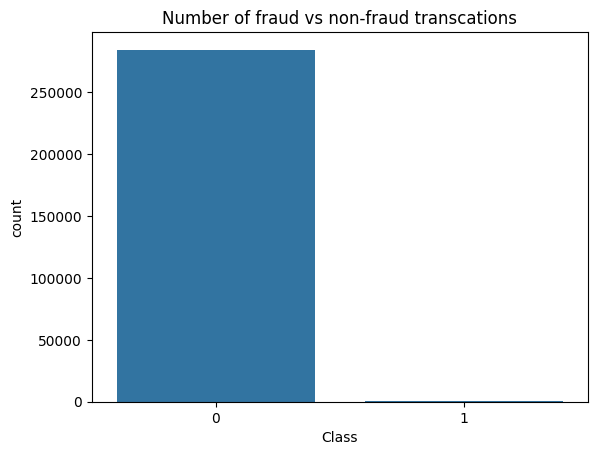

In [13]:
# Bar chart to show fraud vs non-fraud transcations
sns.countplot(x='Class', data=df)
plt.title('Number of fraud vs non-fraud transcations')
plt.show()

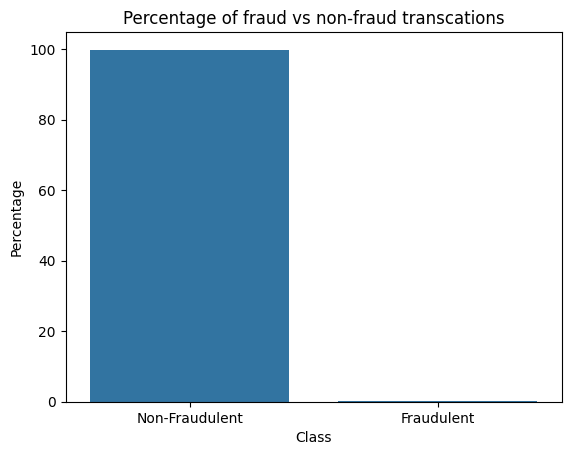

In [14]:
# Bar chart: % of fraud vs non-fraud transcations
fraud_percentage = {'Class':['Non-Fraudulent', 'Fraudulent'], 'Percentage':[clean_share, fraud_share]}
df_fraud_percentage = pd.DataFrame(fraud_percentage)
sns.barplot(x='Class',y='Percentage', data=df_fraud_percentage)
plt.title('Percentage of fraud vs non-fraud transcations')
plt.show()

#### Timebased distribution of classes  

In [15]:
# fraud dataframe
data_fraud = df[df['Class'] == 1]
# non fraud dataframe
data_non_fraud = df[df['Class'] == 0]

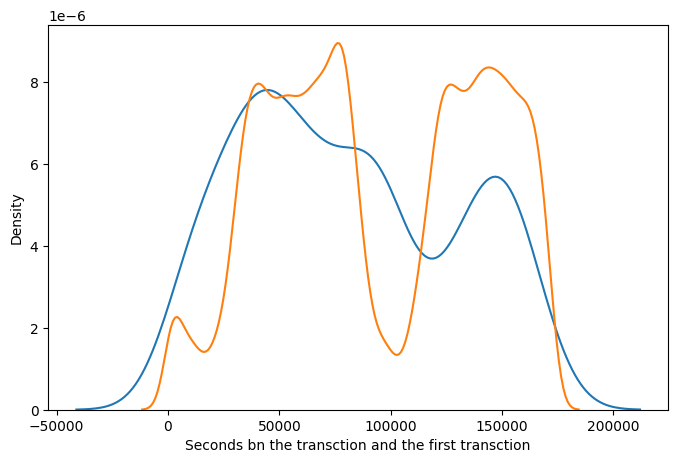

In [16]:
# Distribution plot
plt.figure(figsize=(8,5))
ax = sns.distplot(data_fraud['Time'],label='fraudulent',hist=False)
ax = sns.distplot(data_non_fraud['Time'],label='non fraudulent',hist=False)
ax.set(xlabel='Seconds bn the transction and the first transction')
plt.show()

There is no visible patern based on time between the transations. Therefore its safe to drop the time column

In [17]:
# drop the Time column
df.drop('Time', axis=1, inplace=True)

## Class distribution analysis based on amount

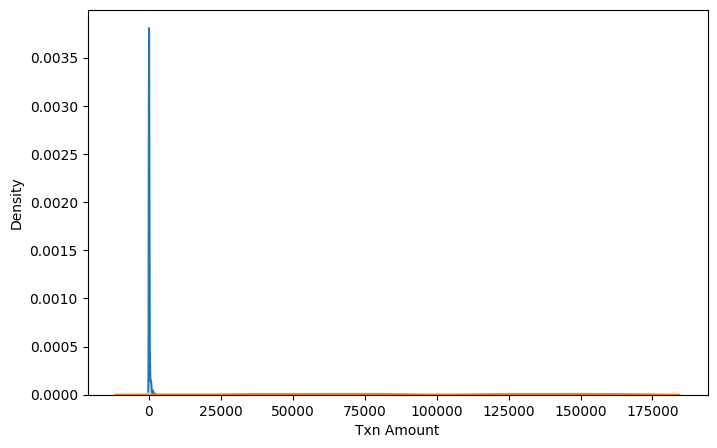

In [18]:
# distribution
plt.figure(figsize=(8,5))
ax = sns.distplot(data_fraud['Amount'],label='fraudulent',hist=False)
ax = sns.distplot(data_non_fraud['Time'],label='non fraudulent',hist=False)
ax.set(xlabel='Txn Amount')
plt.show()

Based on the plot we can see that the fraudulent transctions are mostly focused in the lower amounts, whereas the non-fraudulent transctions are completely  throughout low to high range of amount.

## Train-Test-Split

In [19]:
# import library
from sklearn.model_selection import train_test_split

In [20]:
# Putting feature variables into X
X = df.drop(['Class'], axis=1)

In [21]:
# Putting target variable to y
y = df['Class']

In [22]:
# split data into train and test (80-20 ratoi)
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.8, test_size=0.2, random_state=100)

## Featuer Scaling

In [23]:
# Standardization method
from sklearn.preprocessing import StandardScaler

In [24]:
# instantiate the Scaler
scaler = StandardScaler()

In [25]:
# fit the data into scaler and transform
X_train['Amount'] = scaler.fit_transform(X_train[['Amount']])

In [26]:
X_train.head()

V1        V2        V3        V4        V5        V6        V7  \
201788  2.023734 -0.429219 -0.691061 -0.201461 -0.162486  0.283718 -0.674694   
179369 -0.145286  0.736735  0.543226  0.892662  0.350846  0.089253  0.626708   
73138  -3.015846 -1.920606  1.229574  0.721577  1.089918 -0.195727 -0.462586   
208679  1.851980 -1.007445 -1.499762 -0.220770 -0.568376 -1.232633  0.248573   
206534  2.237844 -0.551513 -1.426515 -0.924369 -0.401734 -1.438232 -0.119942   

              V8        V9       V10       V11       V12       V13       V14  \
201788  0.192230  1.124319 -0.037763  0.308648  0.875063 -0.009562  0.116038   
179369 -0.049137 -0.732566  0.297692  0.519027  0.041275 -0.690783  0.647121   
73138   0.919341 -0.612193 -0.966197  1.106534  1.026421 -0.474229  0.641488   
208679 -0.539483 -0.813368  0.785431 -0.784316  0.673626  1.428269  0.043937   
206534 -0.449263 -0.717258  0.851668 -0.497634 -0.445482  0.324575  0.125543   

             V15       V16       V17       V18       V19       V20       V21  \
201788  0.086537  0.628337 -0.997868  0.482547  0.576077 -0.171390 -0.195207   
179369  0.526333 -1.098558  0.511739  0.243984  3.349611  0.206709 -0.124288   
73138  -0.430684 -0.631257  0.634633 -0.718062 -0.039929  0.842838  0.274911   
208679 -0.309507 -1.805728 -0.012118  0.377096 -0.658353 -0.196551 -0.406722   
206534  0.266588  0.802640  0.225312 -1.865494  0.621879 -0.045417  0.050447   

             V22       V23       V24       V25       V26       V27       V28  \
201788 -0.477813  0.340513  0.059174 -0.431015 -0.297028 -0.000063 -0.046947   
179369 -0.263560 -0.110568 -0.434224 -0.509076  0.719784 -0.006357  0.146053   
73138  -0.319550  0.212891 -0.268792  0.241190  0.318445 -0.100726 -0.365257   
208679 -0.899081  0.137370  0.075894 -0.244027  0.455618 -0.094066 -0.031488   
206534  0.125601  0.215531 -0.080485 -0.063975 -0.307176 -0.042838 -0.063872   

          Amount  
201788 -0.345273  
179369 -0.206439  
73138   0.358043  
208679  0.362400  
206534 -0.316109

In [27]:
# next is transforming the test set
X_test['Amount'] = scaler.transform(X_test[['Amount']])
X_test.head()

V1        V2        V3        V4        V5        V6        V7  \
49089   1.229452 -0.235478 -0.627166  0.419877  1.797014  4.069574 -0.896223   
154704  2.016893 -0.088751 -2.989257 -0.142575  2.675427  3.332289 -0.652336   
67247   0.535093 -1.469185  0.868279  0.385462 -1.439135  0.368118 -0.499370   
251657  2.128486 -0.117215 -1.513910  0.166456  0.359070 -0.540072  0.116023   
201903  0.558593  1.587908 -2.368767  5.124413  2.171788 -0.500419  1.059829   

              V8        V9       V10       V11       V12       V13       V14  \
49089   1.036103  0.745991 -0.147304 -0.850459  0.397845 -0.259849 -0.277065   
154704  0.752811  1.962566 -1.025024  1.126976 -2.418093  1.250341 -0.056209   
67247   0.303698  1.042073 -0.437209  1.145725  0.907573 -1.095634 -0.055080   
251657 -0.216140  0.680314  0.079977 -1.705327 -0.127579 -0.207945  0.307878   
201903 -0.254233 -1.959060  0.948915 -0.288169 -1.007647  0.470316 -2.771902   

             V15       V16       V17       V18       V19       V20       V21  \
49089  -0.766810 -0.200946 -0.338122  0.006032  0.477431 -0.057922 -0.170060   
154704 -0.736695  0.014783  1.890249  0.333755 -0.450398 -0.147619 -0.184153   
67247  -0.621880 -0.191066  0.311988 -0.478635  0.231159  0.437685  0.028010   
251657  0.213491  0.163032 -0.587029 -0.561292  0.472667 -0.227278 -0.357993   
201903  0.221958  0.354333  2.603189  1.092576  0.668084  0.249457 -0.035049   

             V22       V23       V24       V25       V26       V27       V28  \
49089  -0.288750 -0.130270  1.025935  0.847990 -0.271476  0.060052  0.018104   
154704 -0.089661  0.087188  0.570679  0.101899  0.620842 -0.048958 -0.042831   
67247  -0.384708 -0.128376  0.286638 -0.136700  0.913904 -0.083364  0.052485   
251657 -0.905085  0.223474 -1.075605 -0.188519  0.267672 -0.071733 -0.072238   
201903  0.271455  0.381606  0.332001 -0.334757  0.448890  0.168585  0.004955   

          Amount  
49089  -0.340485  
154704 -0.320859  
67247   0.853442  
251657 -0.344410  
201903 -0.229480

## skewness check

In [28]:
# listing the cols
cols = X_train.columns
cols

Index(['V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8', 'V9', 'V10', 'V11',
       'V12', 'V13', 'V14', 'V15', 'V16', 'V17', 'V18', 'V19', 'V20', 'V21',
       'V22', 'V23', 'V24', 'V25', 'V26', 'V27', 'V28', 'Amount'],
      dtype='object')

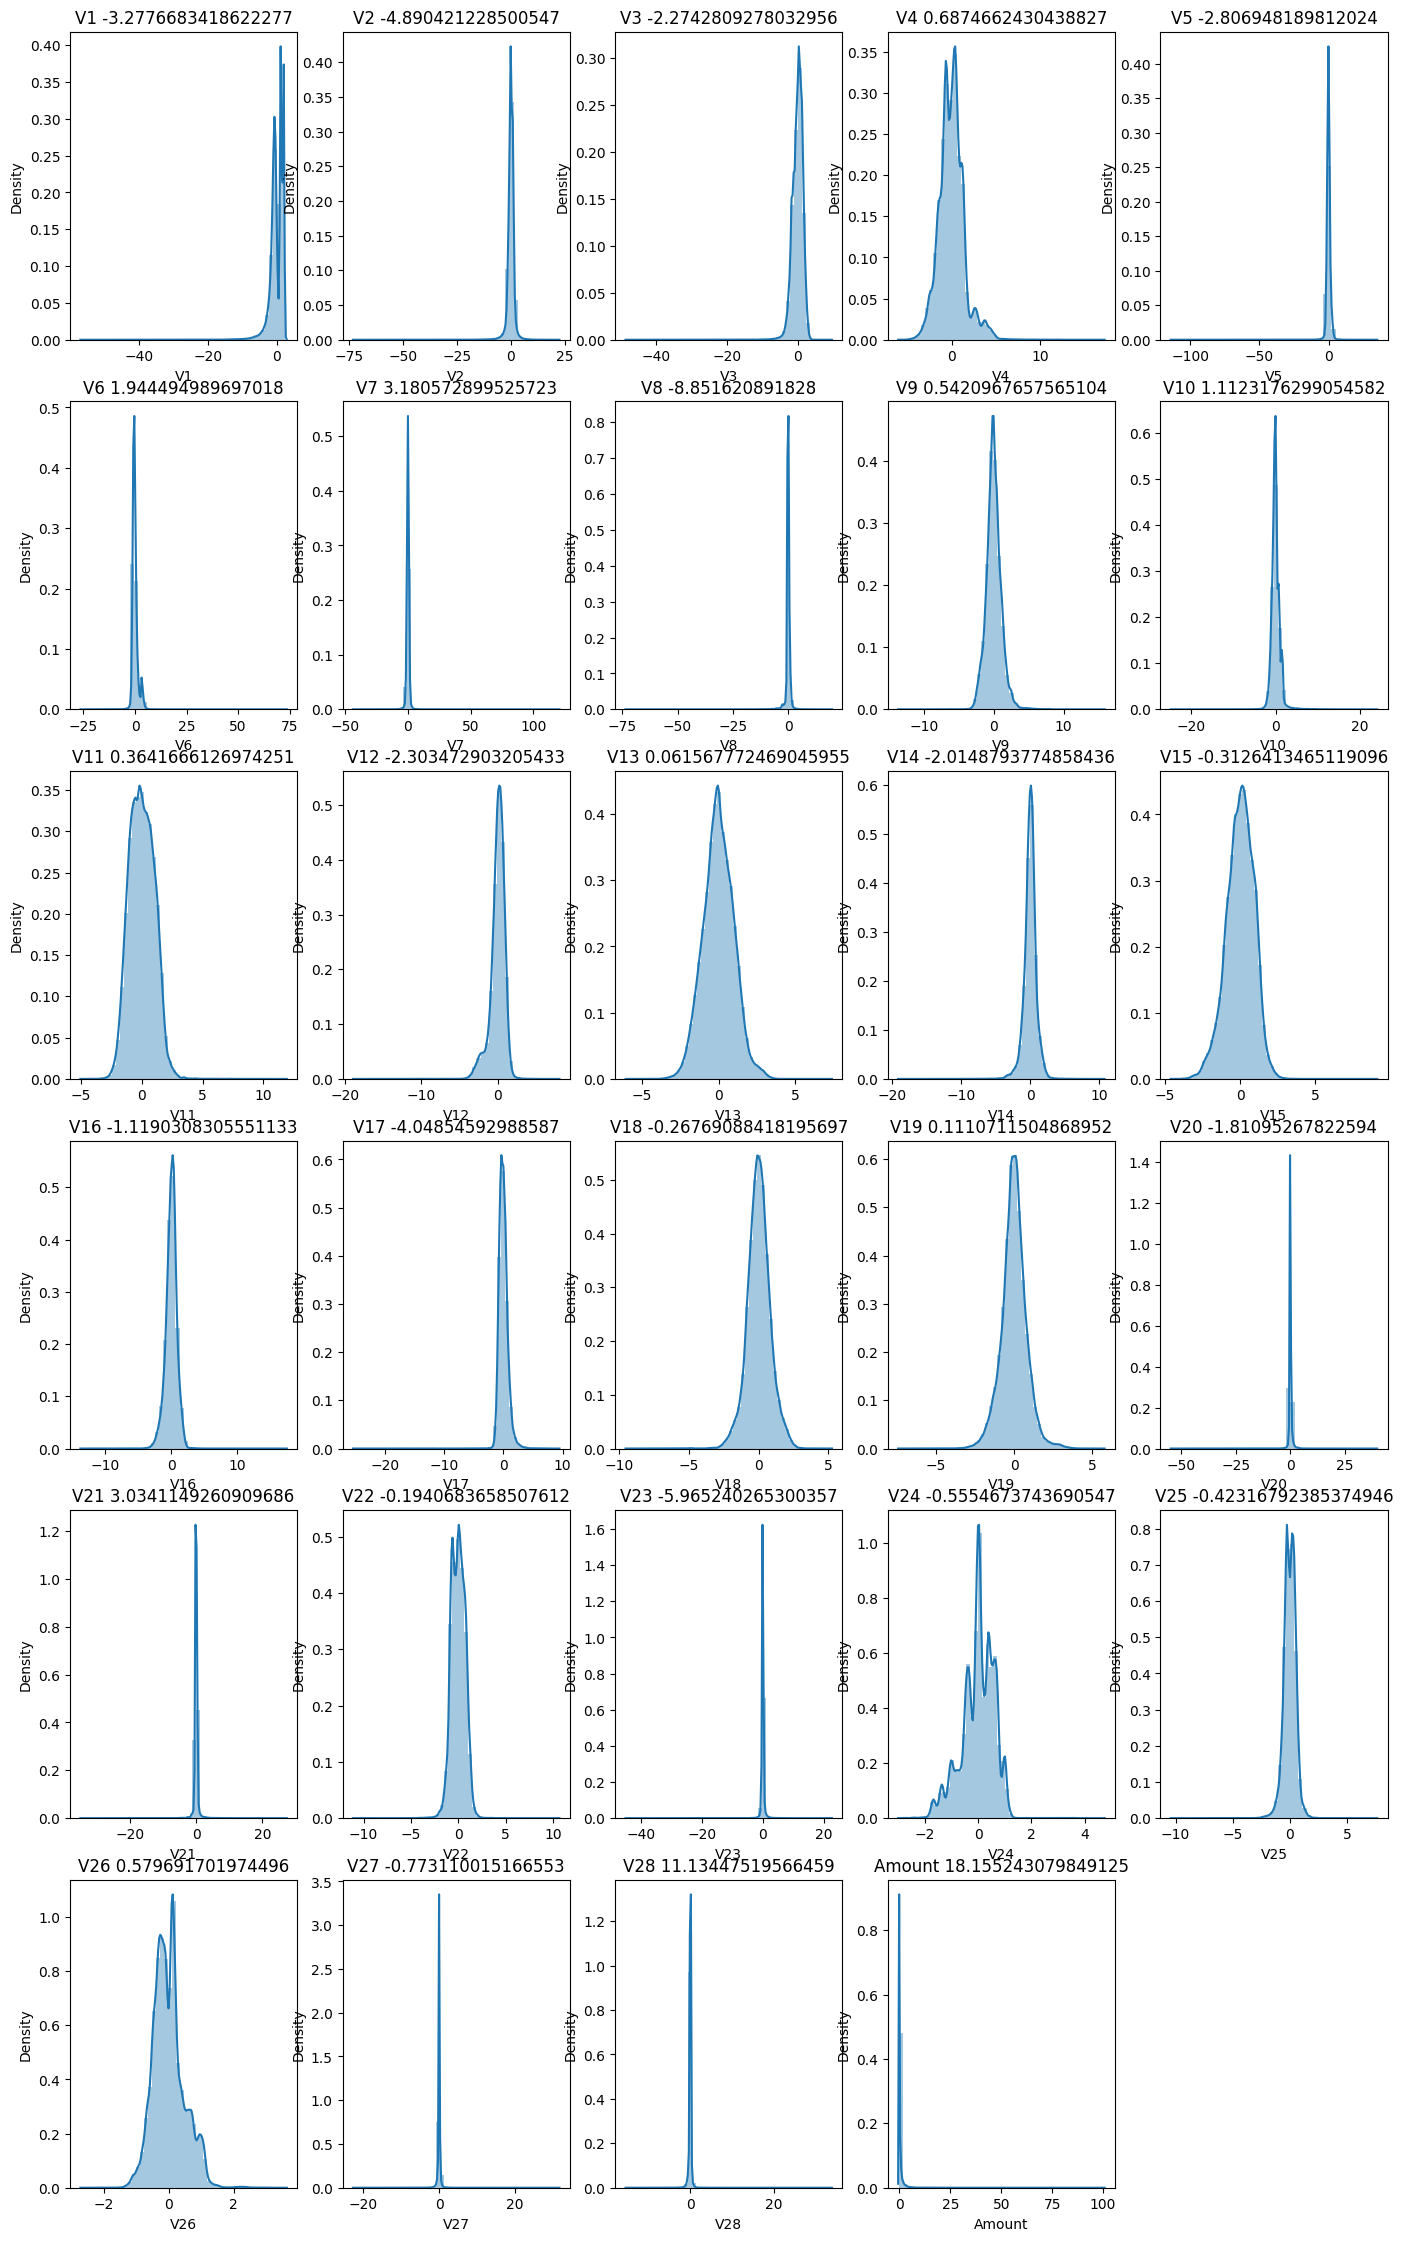

In [29]:
# plot the distribution of the skewness of all the columns
k=0
plt.figure(figsize=(17,28))
for col in cols :
    k=k+1
    plt.subplot(6, 5,k)
    sns.distplot(X_train[col])
    plt.title(col+' '+str(X_train[col].skew()))

#### We are seeing heavy skewness on some of the variables. Thes variables need to be adjusted

## skweness Adjustment using PowerTransformer

In [30]:
# import PowerTransformer
from sklearn.preprocessing import PowerTransformer
# instantiate the powertransformer
pt = PowerTransformer(method='yeo-johnson', standardize=True, copy=False)
# Fit and transform the PT on training data
X_train[cols] = pt.fit_transform(X_train)

In [31]:
# transform the test set
X_test[cols] = pt.transform(X_test)

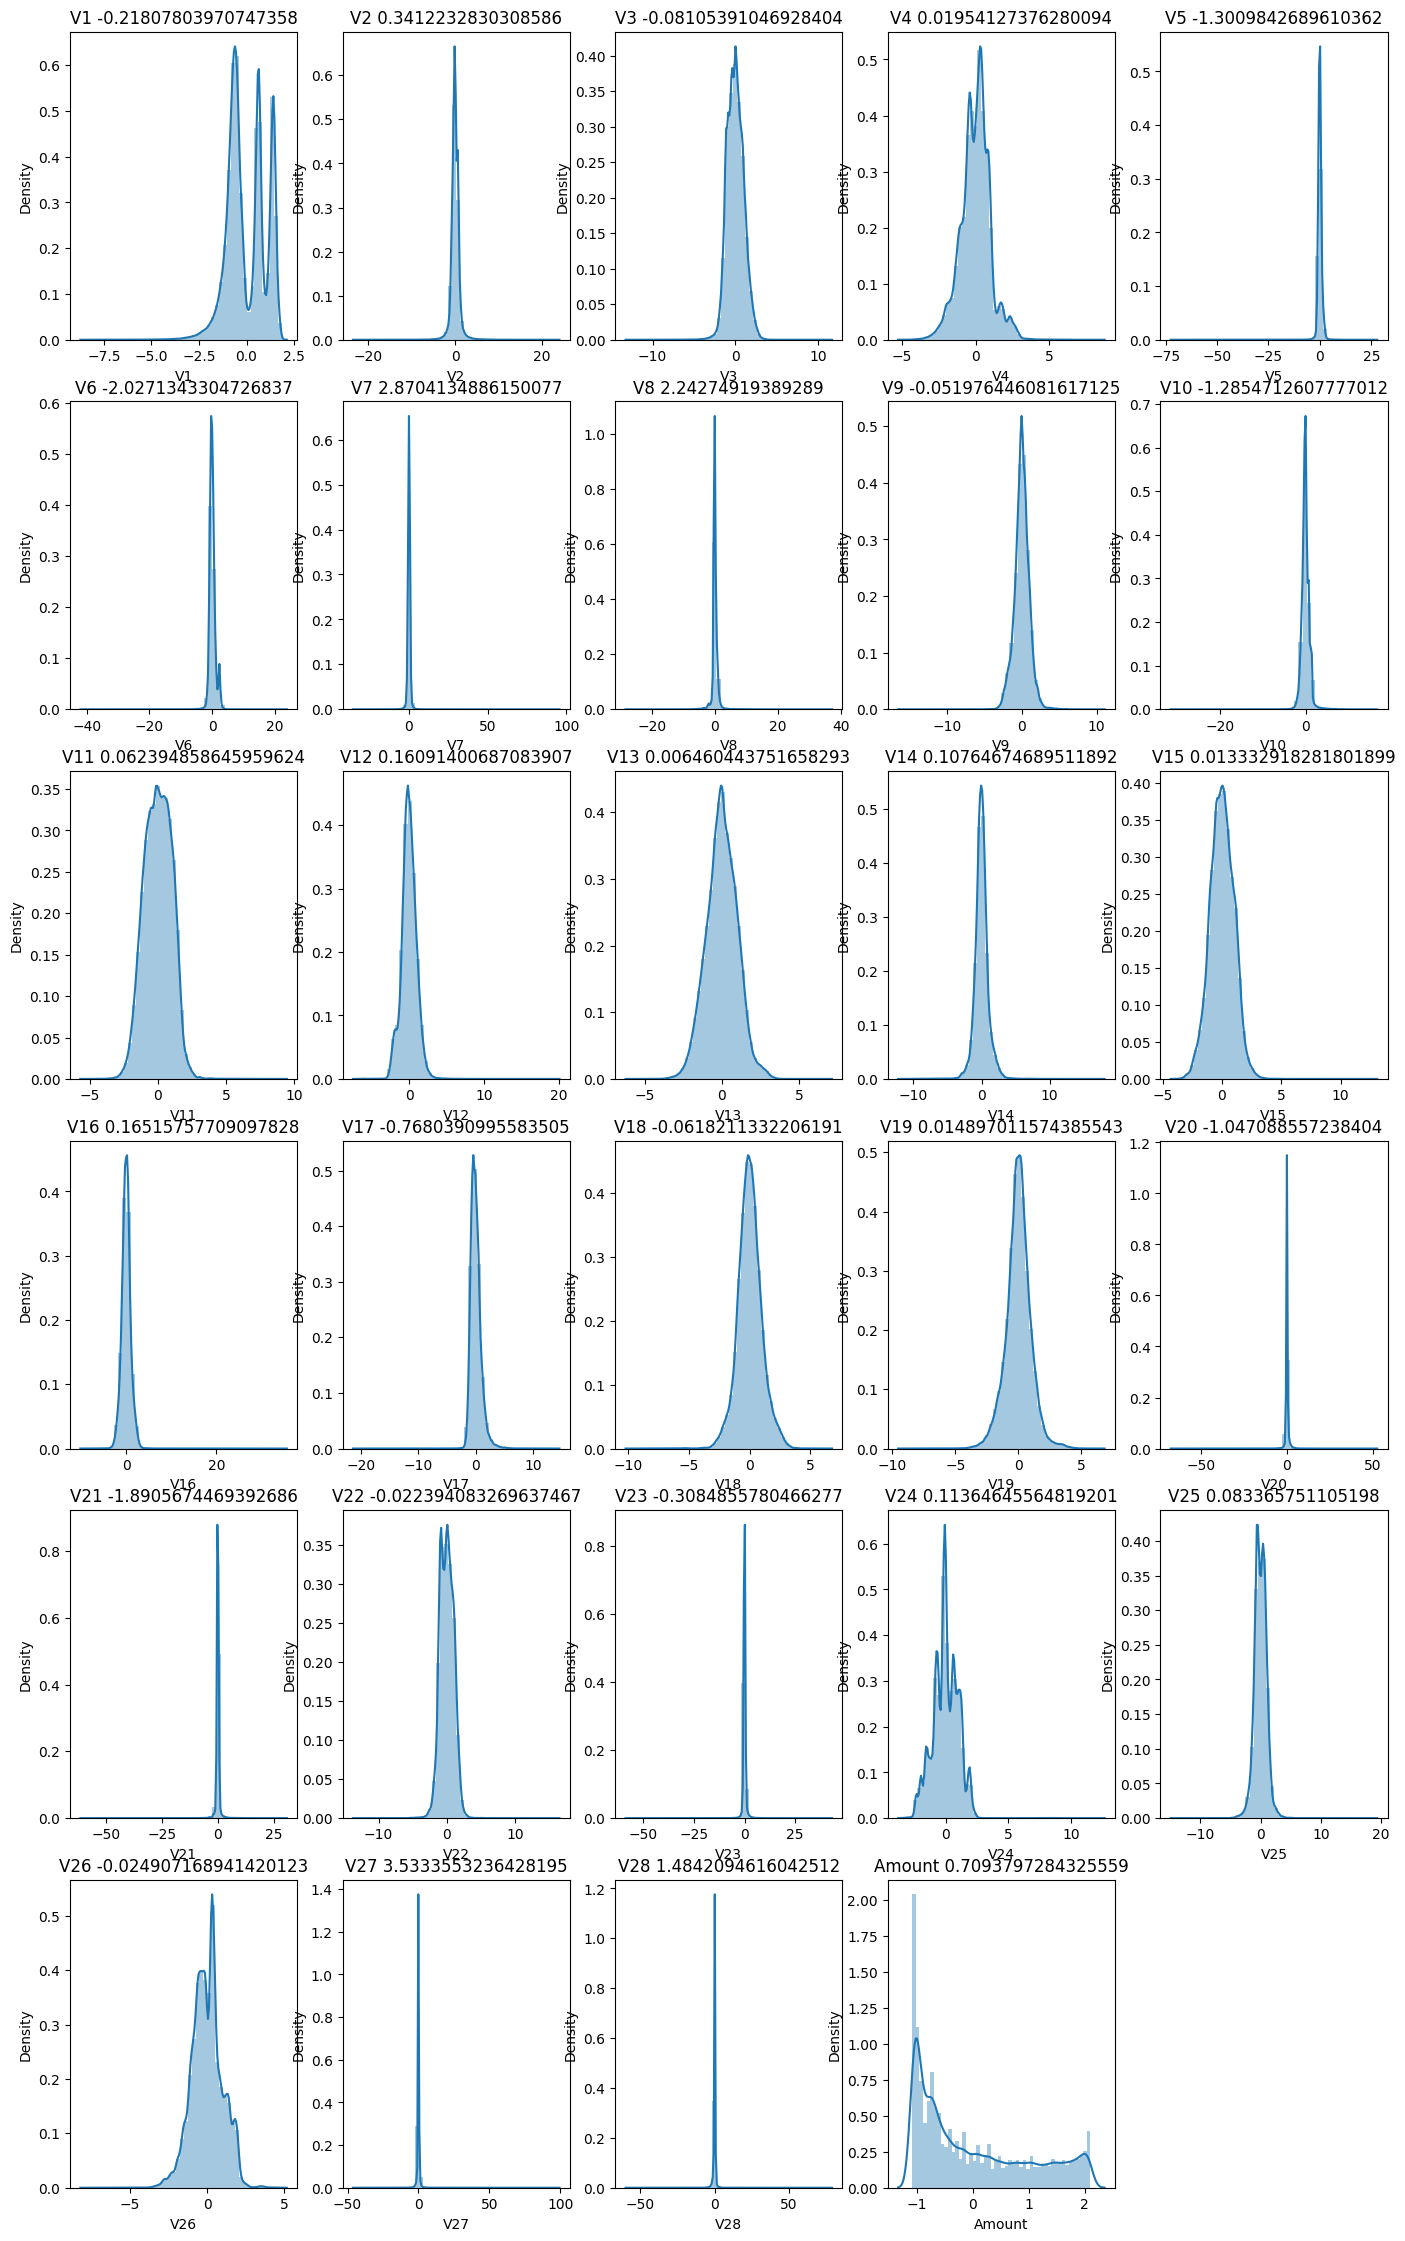

In [32]:
# plottin the distribution of the skewness of all the columnsagain
k=0
plt.figure(figsize=(17,28))
for col in cols :
    k=k+1
    plt.subplot(6, 5,k)
    sns.distplot(X_train[col])
    plt.title(col+' '+str(X_train[col].skew()))

baed on the plot above we can see that variables are normally distributed now

# Model building on imbalanced data

## Logistic regression

In [33]:
# import scikit logistic regression module
from sklearn.linear_model import LogisticRegression

In [34]:
# import metrics
from sklearn import metrics
from sklearn.metrics import confusion_matrix
from sklearn.metrics import f1_score
from sklearn.metrics import classification_report

### Hyperparameter Tuning

In [35]:
# import libraries for cross validation
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV

In [36]:
# create KFold object - 5 splits
folds = KFold(n_splits=5, shuffle=True, random_state=4)

params = {"C": [0.01, 0.1, 1, 10, 100, 1000]}

# Specifing score as recall as we are more focused on acheiving the higher sensitivity than the accuracy
model_cv = GridSearchCV(estimator = LogisticRegression(),
                        param_grid = params,
                        scoring= 'roc_auc',
                        cv = folds,
                        verbose = 1,
                        return_train_score=True)

# Fit the model
model_cv.fit(X_train, y_train)

Fitting 5 folds for each of 6 candidates, totalling 30 fits


GridSearchCV(cv=KFold(n_splits=5, random_state=4, shuffle=True),
             estimator=LogisticRegression(),
             param_grid={'C': [0.01, 0.1, 1, 10, 100, 1000]},
             return_train_score=True, scoring='roc_auc', verbose=1)

In [37]:
# grid search CV results
cv_results = pd.DataFrame(model_cv.cv_results_)
cv_results

mean_fit_time  std_fit_time  mean_score_time  std_score_time  param_C  \
0       0.472182      0.025757         0.030402        0.001618     0.01   
1       0.536069      0.119565         0.042438        0.016233     0.10   
2       0.691931      0.143593         0.043747        0.017143     1.00   
3       0.478534      0.040363         0.030245        0.001630    10.00   
4       0.480706      0.038324         0.029660        0.000431   100.00   
5       0.512945      0.097879         0.031931        0.002301  1000.00   

        params  split0_test_score  split1_test_score  split2_test_score  \
0  {'C': 0.01}           0.986595           0.987068           0.969244   
1   {'C': 0.1}           0.985593           0.987368           0.966190   
2     {'C': 1}           0.985601           0.987346           0.960695   
3    {'C': 10}           0.985580           0.987338           0.961110   
4   {'C': 100}           0.985578           0.987338           0.959647   
5  {'C': 1000}           0.985578           0.987338           0.959637   

   split3_test_score  split4_test_score  mean_test_score  std_test_score  \
0           0.981472           0.993990         0.983674        0.008241   
1           0.980005           0.994159         0.982663        0.009395   
2           0.979551           0.994229         0.981484        0.011399   
3           0.979525           0.991787         0.981068        0.010726   
4           0.979517           0.991783         0.980772        0.011272   
5           0.979519           0.991782         0.980771        0.011275   

   rank_test_score  split0_train_score  split1_train_score  \
0                1            0.983877            0.984106   
1                2            0.982962            0.983607   
2                3            0.982770            0.983390   
3                4            0.982758            0.983365   
4                5            0.982757            0.983362   
5                6            0.982757            0.983362   

   split2_train_score  split3_train_score  split4_train_score  \
0            0.988321            0.985739            0.982709   
1            0.988169            0.984679            0.981988   
2            0.987509            0.984222            0.981921   
3            0.987466            0.984354            0.980767   
4            0.987354            0.984366            0.980764   
5            0.987352            0.984367            0.980764   

   mean_train_score  std_train_score  
0          0.984950         0.001943  
1          0.984281         0.002132  
2          0.983962         0.001927  
3          0.983742         0.002200  
4          0.983721         0.002164  
5          0.983721         0.002164

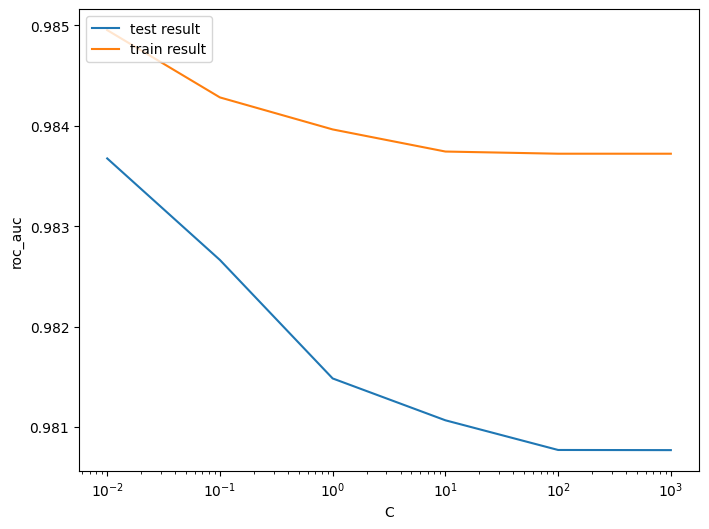

In [38]:
# lets visualize using a plot of C Vs. train and validation scores

plt.figure(figsize=(8, 6))
plt.plot(cv_results['param_C'], cv_results['mean_test_score'])
plt.plot(cv_results['param_C'], cv_results['mean_train_score'])
plt.xlabel('C')
plt.ylabel('roc_auc')
plt.legend(['test result', 'train result'], loc='upper left')
plt.xscale('log')

In [39]:
# lets find the best score with best C
best_score = model_cv.best_score_
best_C = model_cv.best_params_['C']

print(" Highest test roc_auc is {0} at C = {1}".format(best_score, best_C))

 Highest test roc_auc is 0.9836736960858568 at C = 0.01


### Logistic regression with optimal C

In [40]:
# instantiate the model with best C
logistic_imb = LogisticRegression(C=0.01)

In [41]:
# lets try to fit the model on the train set
logistic_imb_model = logistic_imb.fit(X_train, y_train)

### Prediction

In [42]:
# predictions on the train set
y_train_pred = logistic_imb_model.predict(X_train)

In [43]:
# build confusion matrix
confusion = metrics.confusion_matrix(y_train, y_train_pred)
print(confusion)

[[227427     22]
 [   138    258]]


In [44]:
TP = confusion[1,1] # true positive
TN = confusion[0,0] # true negatives
FP = confusion[0,1] # false positives
FN = confusion[1,0] # false negatives


In [45]:
# print Accuracy
print("Accuracy:-",metrics.accuracy_score(y_train, y_train_pred))

# print Sensitivity
print("Sensitivity:-",TP / float(TP+FN))

# print Specificity
print("Specificity:-", TN / float(TN+FP))

# print F1 score
print("F1 Score:-", f1_score(y_train, y_train_pred))

Accuracy:- 0.999297768219623
Sensitivity:- 0.6515151515151515
Specificity:- 0.9999032750198946
F1 Score:- 0.7633136094674556


In [46]:
# lets print the classification_report
print(classification_report(y_train, y_train_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00    227449
           1       0.92      0.65      0.76       396

    accuracy                           1.00    227845
   macro avg       0.96      0.83      0.88    227845
weighted avg       1.00      1.00      1.00    227845



### ROC on Train set

In [47]:
# ROC Curve function

def draw_roc( actual, probs ):
    fpr, tpr, thresholds = metrics.roc_curve( actual, probs,
                                              drop_intermediate = False )
    auc_score = metrics.roc_auc_score( actual, probs )
    plt.figure(figsize=(5, 5))
    plt.plot( fpr, tpr, label='ROC curve (area = %0.2f)' % auc_score )
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate or [1 - True Negative Rate]')
    plt.ylabel('True Positive Rate')
    plt.legend(loc="lower right")
    plt.show()

    return None

In [48]:
# predicted probability
y_train_pred_proba = logistic_imb_model.predict_proba(X_train)[:,1]

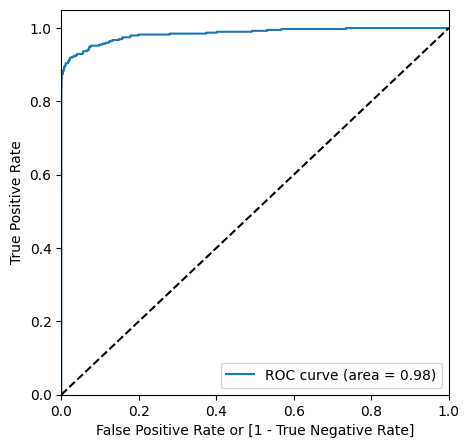

In [49]:
# try plotting the ROC curve
draw_roc(y_train, y_train_pred_proba)

ROC of 0.98 obtained on the train set

### Test Set Prediction

In [50]:
# prediction on the test set
y_test_pred = logistic_imb_model.predict(X_test)

In [51]:
# confusion matrix
confusion = metrics.confusion_matrix(y_test, y_test_pred)
print(confusion)

[[56850    16]
 [   42    54]]


In [52]:
TP = confusion[1,1] # true positive
TN = confusion[0,0] # true negatives
FP = confusion[0,1] # false positives
FN = confusion[1,0] # false negatives

In [53]:
# print Accuracy
print("Accuracy:-",metrics.accuracy_score(y_test, y_test_pred))

# print Sensitivity
print("Sensitivity:-",TP / float(TP+FN))

# print Specificity
print("Specificity:-", TN / float(TN+FP))

# print F1 score
print("F1 Score:-", f1_score(y_test, y_test_pred))

Accuracy:- 0.9989817773252344
Sensitivity:- 0.5625
Specificity:- 0.9997186367952731
F1 Score:- 0.6506024096385542


In [54]:
# print classification_report
print(classification_report(y_test, y_test_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56866
           1       0.77      0.56      0.65        96

    accuracy                           1.00     56962
   macro avg       0.89      0.78      0.83     56962
weighted avg       1.00      1.00      1.00     56962



### ROC in Test set

In [55]:
# Predicted probability
y_test_pred_proba = logistic_imb_model.predict_proba(X_test)[:,1]

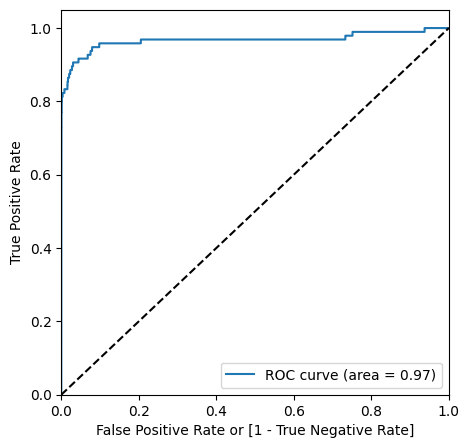

In [56]:
# plotting the ROC curve
draw_roc(y_test, y_test_pred_proba)

ROC of 0.97 obtained on the train set

### Based on the number we can say that model performance is good

Accuracy:- 0.9989817773252344
Sensitivity:- 0.5625
Specificity:- 0.9997186367952731
F1 Score:- 0.6506024096385542

## XGBoost

In [57]:
# importing XGBoost
from xgboost import XGBClassifier

### Hyperparameter tuning

In [58]:
# hyperparameter tuning with XGBoost

# creating a KFold object
folds = 3

# specify range of hyperparameters
param_grid = {'learning_rate': [0.2, 0.6],
             'subsample': [0.3, 0.6, 0.9]}


# model
xgb_model = XGBClassifier(max_depth=2, n_estimators=200)

# GridSearchCV()
model_cv = GridSearchCV(estimator = xgb_model,
                        param_grid = param_grid,
                        scoring= 'roc_auc',
                        cv = folds,
                        verbose = 1,
                        return_train_score=True)

# fit the model
model_cv.fit(X_train, y_train)


Fitting 3 folds for each of 6 candidates, totalling 18 fits


GridSearchCV(cv=3,
             estimator=XGBClassifier(base_score=None, booster=None,
                                     callbacks=None, colsample_bylevel=None,
                                     colsample_bynode=None,
                                     colsample_bytree=None, device=None,
                                     early_stopping_rounds=None,
                                     enable_categorical=False, eval_metric=None,
                                     feature_types=None, gamma=None,
                                     grow_policy=None, importance_type=None,
                                     interaction_constraints=None,
                                     learning_rate=None,...
                                     max_cat_threshold=None,
                                     max_cat_to_onehot=None,
                                     max_delta_step=None, max_depth=2,
                                     max_leaves=None, min_child_weight=None,
                                     missing=nan, monotone_constraints=None,
                                     multi_strategy=None, n_estimators=200,
                                     n_jobs=None, num_parallel_tree=None,
                                     random_state=None, ...),
             param_grid={'learning_rate': [0.2, 0.6],
                         'subsample': [0.3, 0.6, 0.9]},
             return_train_score=True, scoring='roc_auc', verbose=1)

In [59]:
# grid search results
cv_results = pd.DataFrame(model_cv.cv_results_)
cv_results

mean_fit_time  std_fit_time  mean_score_time  std_score_time  \
0       4.440366      1.486323         0.154746        0.008224   
1       4.394207      1.504989         0.141301        0.001710   
2       4.178841      1.413350         0.139939        0.001221   
3       4.466431      1.495705         0.145219        0.003564   
4       4.470333      1.471080         0.146760        0.008486   
5       4.317020      1.478884         0.146060        0.007796   

   param_learning_rate  param_subsample  \
0                  0.2              0.3   
1                  0.2              0.6   
2                  0.2              0.9   
3                  0.6              0.3   
4                  0.6              0.6   
5                  0.6              0.9   

                                     params  split0_test_score  \
0  {'learning_rate': 0.2, 'subsample': 0.3}           0.971504   
1  {'learning_rate': 0.2, 'subsample': 0.6}           0.969237   
2  {'learning_rate': 0.2, 'subsample': 0.9}           0.977422   
3  {'learning_rate': 0.6, 'subsample': 0.3}           0.959016   
4  {'learning_rate': 0.6, 'subsample': 0.6}           0.969186   
5  {'learning_rate': 0.6, 'subsample': 0.9}           0.968313   

   split1_test_score  split2_test_score  mean_test_score  std_test_score  \
0           0.972498           0.978483         0.974161        0.003082   
1           0.978238           0.973924         0.973800        0.003676   
2           0.973420           0.977898         0.976247        0.002008   
3           0.955137           0.967728         0.960627        0.005265   
4           0.962236           0.971101         0.967508        0.003809   
5           0.968930           0.977132         0.971458        0.004020   

   rank_test_score  split0_train_score  split1_train_score  \
0                2            0.999582            0.999761   
1                3            0.999976            0.999969   
2                1            0.999960            0.999977   
3                6            0.999993            0.999959   
4                5            1.000000            1.000000   
5                4            1.000000            1.000000   

   split2_train_score  mean_train_score  std_train_score  
0            0.999632          0.999658         0.000075  
1            0.999964          0.999970         0.000005  
2            0.999954          0.999964         0.000010  
3            0.999988          0.999980         0.000015  
4            1.000000          1.000000         0.000000  
5            1.000000          1.000000         0.000000

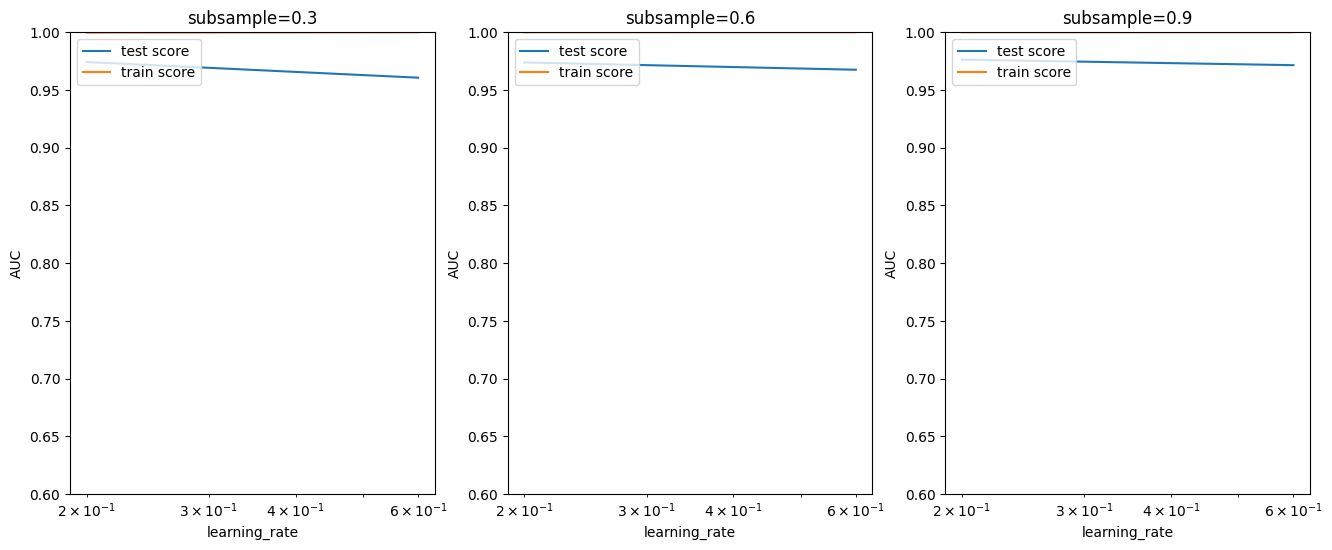

In [60]:
# lets plot
plt.figure(figsize=(16,6))

param_grid = {'learning_rate': [0.2, 0.6],
             'subsample': [0.3, 0.6, 0.9]}


for n, subsample in enumerate(param_grid['subsample']):

    plt.subplot(1,len(param_grid['subsample']), n+1)
    df = cv_results[cv_results['param_subsample']==subsample]

    plt.plot(df["param_learning_rate"], df["mean_test_score"])
    plt.plot(df["param_learning_rate"], df["mean_train_score"])
    plt.xlabel('learning_rate')
    plt.ylabel('AUC')
    plt.title("subsample={0}".format(subsample))
    plt.ylim([0.60, 1])
    plt.legend(['test score', 'train score'], loc='upper left')
    plt.xscale('log')

In [61]:
model_cv.best_params_

{'learning_rate': 0.2, 'subsample': 0.9}

As per analysis we choose the best parameters as learning_rate : 0.2 and subsample: 0.9

In [62]:
params = {'learning_rate': 0.2,
          'max_depth': 2,
          'n_estimators':200,
          'subsample':0.9,
         'objective':'binary:logistic'}

# fit model on training data
xgb_imb_model = XGBClassifier(params = params)
xgb_imb_model.fit(X_train, y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None,
              num_parallel_tree=None,
              params={'learning_rate': 0.2, 'max_depth': 2, 'n_estimators': 200,
                      'objective': 'binary:logistic', 'subsample': 0.9}, ...)

#### Predictions on Train Set

In [63]:
# prredictions on the train set
y_train_pred = xgb_imb_model.predict(X_train)

In [64]:
# confusion matrix
confusion = metrics.confusion_matrix(y_train, y_train_pred)
print(confusion)

[[227449      0]
 [     0    396]]


In [65]:
TP = confusion[1,1] # true positive
TN = confusion[0,0] # true negatives
FP = confusion[0,1] # false positives
FN = confusion[1,0] # false negatives

In [66]:
# print Accuracy
print("Accuracy:-",metrics.accuracy_score(y_train, y_train_pred))

# print Sensitivity
print("Sensitivity:-",TP / float(TP+FN))

# print Specificity
print("Specificity:-", TN / float(TN+FP))

# print F1 score
print("F1 Score:-", f1_score(y_train, y_train_pred))

Accuracy:- 1.0
Sensitivity:- 1.0
Specificity:- 1.0
F1 Score:- 1.0


In [67]:
# print classification_report
print(classification_report(y_train, y_train_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00    227449
           1       1.00      1.00      1.00       396

    accuracy                           1.00    227845
   macro avg       1.00      1.00      1.00    227845
weighted avg       1.00      1.00      1.00    227845



In [68]:
# Predicted probability
y_train_pred_proba_imb_xgb = xgb_imb_model.predict_proba(X_train)[:,1]

In [69]:
# roc_auc
auc = metrics.roc_auc_score(y_train, y_train_pred_proba_imb_xgb)
auc

1.0

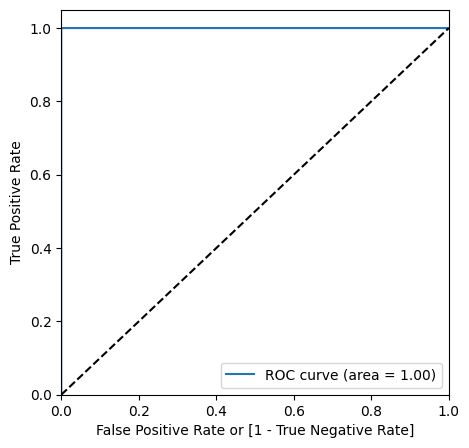

In [70]:
# plot the ROC curve
draw_roc(y_train, y_train_pred_proba_imb_xgb)

#### Prediction on the test set


In [71]:
# Predictions on the test set
y_test_pred = xgb_imb_model.predict(X_test)

In [72]:
# Confusion matrix
confusion = metrics.confusion_matrix(y_test, y_test_pred)
print(confusion)

[[56858     8]
 [   25    71]]


In [73]:
TP = confusion[1,1] # true positive
TN = confusion[0,0] # true negatives
FP = confusion[0,1] # false positives
FN = confusion[1,0] # false negatives

In [74]:
# print Accuracy
print("Accuracy:-",metrics.accuracy_score(y_test, y_test_pred))

# print Sensitivity
print("Sensitivity:-",TP / float(TP+FN))

# print Specificity
print("Specificity:-", TN / float(TN+FP))

# print F1 score
print("F1 Score:-", f1_score(y_test, y_test_pred))

Accuracy:- 0.999420666409185
Sensitivity:- 0.7395833333333334
Specificity:- 0.9998593183976365
F1 Score:- 0.8114285714285714


In [75]:
# print classification_report
print(classification_report(y_test, y_test_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56866
           1       0.90      0.74      0.81        96

    accuracy                           1.00     56962
   macro avg       0.95      0.87      0.91     56962
weighted avg       1.00      1.00      1.00     56962



In [76]:
# Predicted probability
y_test_pred_proba = xgb_imb_model.predict_proba(X_test)[:,1]

In [77]:
# roc_auc
auc = metrics.roc_auc_score(y_test, y_test_pred_proba)
auc

0.9723599118981465

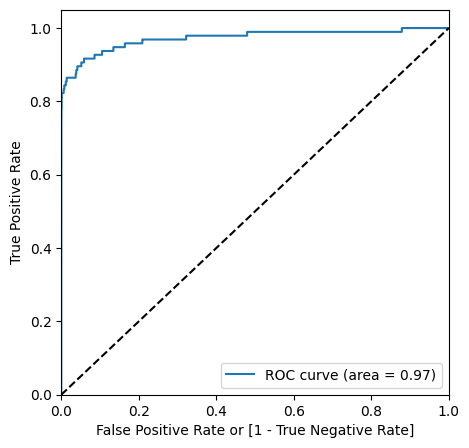

In [78]:
# plot the ROC curve
draw_roc(y_test, y_test_pred_proba)

Based on the numbers we can say that the model performance is good
Accuracy = 0.99
Sensitivity = 0.73
Specificity = 0.99
ROC-AUC = 0.99
F Score = 0.81

## Decision Tree

In [79]:
# Importing decision tree classifier
from sklearn.tree import DecisionTreeClassifier

In [80]:
# Create the parameter grid
param_grid = {
    'max_depth': range(5, 15, 5),
    'min_samples_leaf': range(50, 150, 50),
    'min_samples_split': range(50, 150, 50),
}


# Instantiate the grid search model
dtree = DecisionTreeClassifier()

grid_search = GridSearchCV(estimator = dtree,
                           param_grid = param_grid,
                           scoring= 'roc_auc',
                           cv = 3,
                           verbose = 1)

# Fit the grid search to the data
grid_search.fit(X_train,y_train)


Fitting 3 folds for each of 8 candidates, totalling 24 fits


GridSearchCV(cv=3, estimator=DecisionTreeClassifier(),
             param_grid={'max_depth': range(5, 15, 5),
                         'min_samples_leaf': range(50, 150, 50),
                         'min_samples_split': range(50, 150, 50)},
             scoring='roc_auc', verbose=1)

In [81]:
# grid search results
cv_results = pd.DataFrame(grid_search.cv_results_)
cv_results

mean_fit_time  std_fit_time  mean_score_time  std_score_time  \
0       5.190488      0.280748         0.031352        0.006115   
1       5.230383      0.508827         0.031179        0.006844   
2       5.251264      0.560583         0.026608        0.000693   
3       5.229862      0.411665         0.031542        0.006203   
4      10.740670      0.114877         0.044656        0.016386   
5      10.457847      0.387406         0.033971        0.005840   
6      10.425784      0.248767         0.029971        0.000836   
7      10.153883      0.626456         0.031492        0.001348   

   param_max_depth  param_min_samples_leaf  param_min_samples_split  \
0                5                      50                       50   
1                5                      50                      100   
2                5                     100                       50   
3                5                     100                      100   
4               10                      50                       50   
5               10                      50                      100   
6               10                     100                       50   
7               10                     100                      100   

                                              params  split0_test_score  \
0  {'max_depth': 5, 'min_samples_leaf': 50, 'min_...           0.933337   
1  {'max_depth': 5, 'min_samples_leaf': 50, 'min_...           0.933337   
2  {'max_depth': 5, 'min_samples_leaf': 100, 'min...           0.933282   
3  {'max_depth': 5, 'min_samples_leaf': 100, 'min...           0.933279   
4  {'max_depth': 10, 'min_samples_leaf': 50, 'min...           0.924938   
5  {'max_depth': 10, 'min_samples_leaf': 50, 'min...           0.924924   
6  {'max_depth': 10, 'min_samples_leaf': 100, 'mi...           0.933417   
7  {'max_depth': 10, 'min_samples_leaf': 100, 'mi...           0.933461   

   split1_test_score  split2_test_score  mean_test_score  std_test_score  \
0           0.933183           0.923880         0.930133        0.004422   
1           0.933183           0.923883         0.930134        0.004421   
2           0.936720           0.944598         0.938200        0.004737   
3           0.936720           0.944598         0.938199        0.004738   
4           0.923896           0.937996         0.928943        0.006416   
5           0.923908           0.945514         0.931449        0.009954   
6           0.919679           0.944093         0.932396        0.009993   
7           0.919649           0.944102         0.932404        0.010011   

   rank_test_score  
0                7  
1                6  
2                1  
3                2  
4                8  
5                5  
6                4  
7                3

In [82]:
# lets see the optimal sensitivity score and hyperparameters
print("Best roc_auc:-", grid_search.best_score_)
print(grid_search.best_estimator_)

Best roc_auc:- 0.9382001202914115
DecisionTreeClassifier(max_depth=5, min_samples_leaf=100, min_samples_split=50)


In [83]:
# Model with optimal hyperparameters
dt_imb_model = DecisionTreeClassifier(criterion = "gini",
                                  random_state = 100,
                                  max_depth=5,
                                  min_samples_leaf=100,
                                  min_samples_split=100)

dt_imb_model.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=5, min_samples_leaf=100, min_samples_split=100,
                       random_state=100)

#### Prediction on train set

In [84]:
# predictions on the train set
y_train_pred = dt_imb_model.predict(X_train)

In [85]:
# confusion matrix
confusion = metrics.confusion_matrix(y_train, y_train)
print(confusion)

[[227449      0]
 [     0    396]]


In [86]:
TP = confusion[1,1] # true positive
TN = confusion[0,0] # true negatives
FP = confusion[0,1] # false positives
FN = confusion[1,0] # false negatives

In [87]:
# print Accuracy
print("Accuracy:-",metrics.accuracy_score(y_train, y_train_pred))

# print Sensitivity
print("Sensitivity:-",TP / float(TP+FN))

# print Specificity
print("Specificity:-", TN / float(TN+FP))

# print F1 score
print("F1 Score:-", f1_score(y_train, y_train_pred))

Accuracy:- 0.9991704887094297
Sensitivity:- 1.0
Specificity:- 1.0
F1 Score:- 0.749003984063745


In [88]:
# print classification_report
print(classification_report(y_train, y_train_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00    227449
           1       0.79      0.71      0.75       396

    accuracy                           1.00    227845
   macro avg       0.89      0.86      0.87    227845
weighted avg       1.00      1.00      1.00    227845



In [89]:
# Predicted probability
y_train_pred_proba = dt_imb_model.predict_proba(X_train)[:,1]

In [90]:
# roc_auc
auc = metrics.roc_auc_score(y_train, y_train_pred_proba)
auc

0.9534547393930157

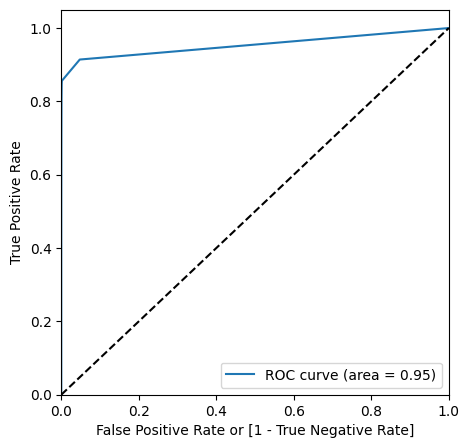

In [91]:
# Plot the ROC curve
draw_roc(y_train, y_train_pred_proba)

#### Predition in test set

In [92]:
# Predictions on the test set
y_test_pred = dt_imb_model.predict(X_test)

In [93]:
# Confusion matrix
confusion = metrics.confusion_matrix(y_test, y_test_pred)
print(confusion)

[[56836    30]
 [   40    56]]


In [94]:
TP = confusion[1,1] # true positive
TN = confusion[0,0] # true negatives
FP = confusion[0,1] # false positives
FN = confusion[1,0] # false negatives

In [95]:
# print Accuracy
print("Accuracy:-",metrics.accuracy_score(y_test, y_test_pred))

# print Sensitivity
print("Sensitivity:-",TP / float(TP+FN))

# print Specificity
print("Specificity:-", TN / float(TN+FP))

# print F1 score
print("F1 Score:-", f1_score(y_train, y_train_pred))

Accuracy:- 0.9987711105649381
Sensitivity:- 0.5833333333333334
Specificity:- 0.9994724439911371
F1 Score:- 0.749003984063745


In [96]:
# print classification_report
print(classification_report(y_test, y_test_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56866
           1       0.65      0.58      0.62        96

    accuracy                           1.00     56962
   macro avg       0.83      0.79      0.81     56962
weighted avg       1.00      1.00      1.00     56962



In [97]:
# Predicted probability
y_test_pred_proba = dt_imb_model.predict_proba(X_test)[:,1]

In [98]:
# roc_auc
auc = metrics.roc_auc_score(y_test, y_test_pred_proba)
auc

0.92174979703748

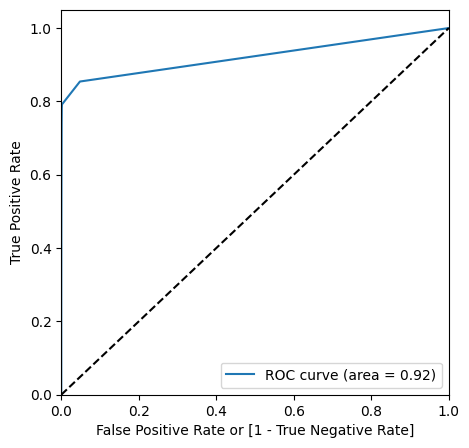

In [99]:
# Plot the ROC curve
draw_roc(y_test, y_test_pred_proba)

Summary of the above model on test set


*   Accuracy:- 0.9987711105649381
*   Sensitivity:- 0.5833333333333334
*   Specificity:- 0.9994724439911371
*   F1 Score:- 0.749003984063745
*   List item

## Random Forest

In [100]:
# import random forest classifier
from sklearn.ensemble import RandomForestClassifier

In [101]:
param_grid = {
    'max_depth': range(5,10,5),
    'min_samples_leaf': range(50, 150, 50),
    'min_samples_split': range(50, 150, 50),
    'n_estimators': [100,200,300],
    'max_features': [10, 20]
}
# Create a based model
rf = RandomForestClassifier()
# Instantiate the grid search model
grid_search = GridSearchCV(estimator = rf,
                           param_grid = param_grid,
                           cv = 2,
                           n_jobs = -1,
                           verbose = 1,
                           return_train_score=True)

# Fit the model
grid_search.fit(X_train, y_train)

Fitting 2 folds for each of 24 candidates, totalling 48 fits


GridSearchCV(cv=2, estimator=RandomForestClassifier(), n_jobs=-1,
             param_grid={'max_depth': range(5, 10, 5), 'max_features': [10, 20],
                         'min_samples_leaf': range(50, 150, 50),
                         'min_samples_split': range(50, 150, 50),
                         'n_estimators': [100, 200, 300]},
             return_train_score=True, verbose=1)

In [102]:
# lets print the optimal accuracy score and hyperparameters
print('Possible accuracy of',grid_search.best_score_,'using',grid_search.best_params_)

Possible accuracy of 0.999302156994871 using {'max_depth': 5, 'max_features': 10, 'min_samples_leaf': 50, 'min_samples_split': 50, 'n_estimators': 100}


In [103]:
# model with the best hyperparameters
rfc_imb_model = RandomForestClassifier(bootstrap=True,
                             max_depth=5,
                             min_samples_leaf=50,
                             min_samples_split=50,
                             max_features=10,
                             n_estimators=100)

In [104]:
# fit the model
rfc_imb_model.fit(X_train, y_train)

RandomForestClassifier(max_depth=5, max_features=10, min_samples_leaf=50,
                       min_samples_split=50)

### Prediction on the train set

In [ ]:
# Predictions on the train set
y_train_pred = rfc_imb_model.predict(X_train)

In [ ]:
# Confusion matrix
confusion = metrics.confusion_matrix(y_train, y_train)
print(confusion)

In [ ]:
TP = confusion[1,1] # true positive
TN = confusion[0,0] # true negatives
FP = confusion[0,1] # false positives
FN = confusion[1,0] # false negatives

In [123]:
# print Accuracy
print("Accuracy:-",metrics.accuracy_score(y_train, y_train_pred))

# print Sensitivity
print("Sensitivity:-",TP / float(TP+FN))

# print Specificity
print("Specificity:-", TN / float(TN+FP))

# print F1 score
print("F1 Score:-", f1_score(y_train, y_train_pred))

Accuracy:- 0.9993723803462881
Sensitivity:- 0.6458333333333334
Specificity:- 0.9996131255935005
F1 Score:- 0.8033012379642366


In [124]:
# classification_report
print(classification_report(y_train, y_train_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00    227449
           1       0.88      0.74      0.80       396

    accuracy                           1.00    227845
   macro avg       0.94      0.87      0.90    227845
weighted avg       1.00      1.00      1.00    227845



In [125]:
# Predicted probability
y_train_pred_proba = rfc_imb_model.predict_proba(X_train)[:,1]

In [126]:
# roc_auc
auc = metrics.roc_auc_score(y_train, y_train_pred_proba)
auc

0.9789940644258537

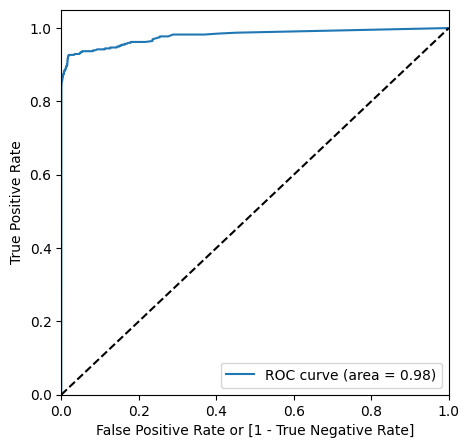

In [127]:
# plot the ROC curve
draw_roc(y_train, y_train_pred_proba)

### Prediction on Test Set

In [128]:
# Predictions on the test set
y_test_pred = rfc_imb_model.predict(X_test)

In [129]:
# Confusion matrix
confusion = metrics.confusion_matrix(y_test, y_test_pred)
print(confusion)

[[56844    22]
 [   34    62]]


In [130]:
TP = confusion[1,1] # true positive
TN = confusion[0,0] # true negatives
FP = confusion[0,1] # false positives
FN = confusion[1,0] # false negatives

In [131]:
# print Accuracy
print("Accuracy:-",metrics.accuracy_score(y_test, y_test_pred))

# print Sensitivity
print("Sensitivity:-",TP / float(TP+FN))

# print Specificity
print("Specificity:-", TN / float(TN+FP))

# print F1 score
print("F1 Score:-", f1_score(y_train, y_train_pred))

Accuracy:- 0.9990168884519505
Sensitivity:- 0.6458333333333334
Specificity:- 0.9996131255935005
F1 Score:- 0.8033012379642366


In [132]:
# print classification_report
print(classification_report(y_test, y_test_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56866
           1       0.74      0.65      0.69        96

    accuracy                           1.00     56962
   macro avg       0.87      0.82      0.84     56962
weighted avg       1.00      1.00      1.00     56962



In [133]:
# Predicted probability
y_test_pred_proba = rfc_imb_model.predict_proba(X_test)[:,1]

In [134]:
# roc_auc
auc = metrics.roc_auc_score(y_test, y_test_pred_proba)
auc

0.9621449254973681

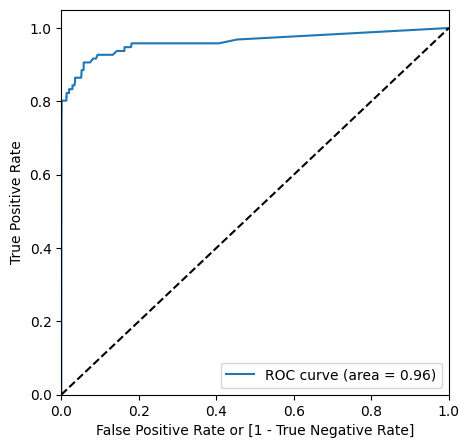

In [135]:
# plot the ROC curve
draw_roc(y_test, y_test_pred_proba)

Summary of above model on test data
* Accuracy:- 0.9990168884519505
* Sensitivity:- 0.6458333333333334
* Specificity:- 0.9996131255935005
* F1 Score:- 0.8033012379642366




## Best model - Imbalanced Data
Based on the models above -Logistic, XGBoost, Decision Tree, and Random Forest, almost all of them have performed well. Especially Logistic regression and XGBoost performed best in terms of ROC-AUC score.

But as we have to choose one of them, we can go for the best as XGBoost, which gives us ROC score of 1.0 on the train data and 0.97 on the test data.

Top var = 14
2nd Top var = 7
3rd Top var = 10


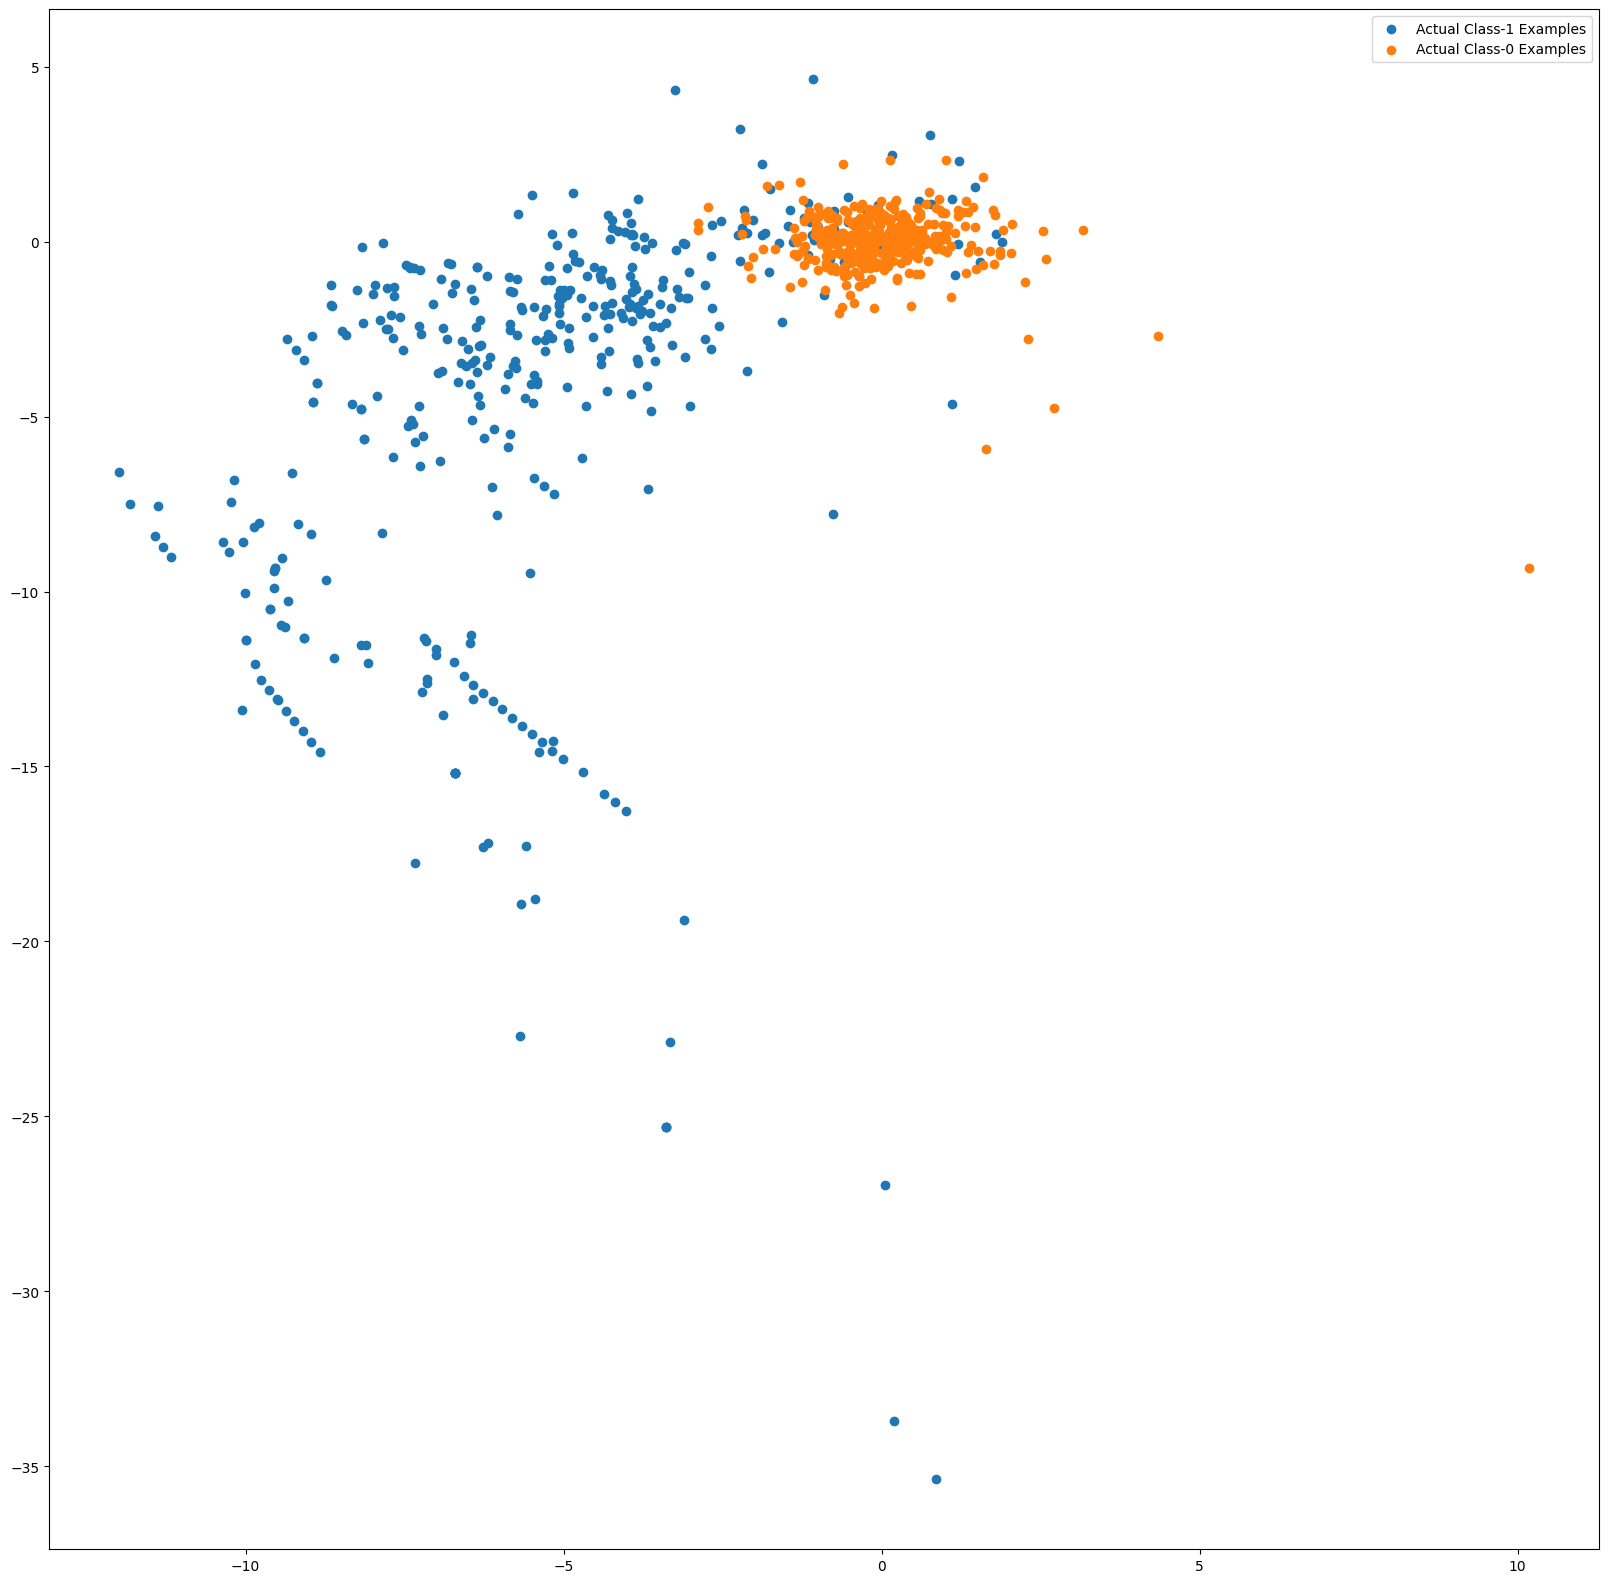

In [136]:
# lets look at the features of XGBoost model

var_imp = []
for i in xgb_imb_model.feature_importances_:
    var_imp.append(i)
print('Top var =', var_imp.index(np.sort(xgb_imb_model.feature_importances_)[-1])+1)
print('2nd Top var =', var_imp.index(np.sort(xgb_imb_model.feature_importances_)[-2])+1)
print('3rd Top var =', var_imp.index(np.sort(xgb_imb_model.feature_importances_)[-3])+1)
# Variable on Index-16 and Index-13 seems to be the top 2 variables
top_var_index = var_imp.index(np.sort(xgb_imb_model.feature_importances_)[-1])
second_top_var_index = var_imp.index(np.sort(xgb_imb_model.feature_importances_)[-2])

X_train_1 = X_train.to_numpy()[np.where(y_train==1.0)]
X_train_0 = X_train.to_numpy()[np.where(y_train==0.0)]

np.random.shuffle(X_train_0)

import matplotlib.pyplot as plt
%matplotlib inline
plt.rcParams['figure.figsize'] = [20, 20]

plt.scatter(X_train_1[:, top_var_index], X_train_1[:, second_top_var_index], label='Actual Class-1 Examples')
plt.scatter(X_train_0[:X_train_1.shape[0], top_var_index], X_train_0[:X_train_1.shape[0], second_top_var_index],
            label='Actual Class-0 Examples')
plt.legend()

#### In the next step lets print the FPR,TPR. Then select the best threshold from the roc curve for the best model

In [137]:
print('Train auc =', metrics.roc_auc_score(y_train, y_train_pred_proba_imb_xgb))
fpr, tpr, thresholds = metrics.roc_curve(y_train, y_train_pred_proba_imb_xgb)
threshold = thresholds[np.argmax(tpr-fpr)]
print("Threshold=",threshold)

Train auc = 1.0
Threshold= 0.82052475


#### The threshold is at 0.85, for which the TPR is the highest and FPR is the lowest and we got the best ROC score.

## Data Imbalance Handling

There are numberous ways to handle the data imbalance.


1.   Undersampling
2.   Oversampling
3.   SMOTE
4.   Adasyn

Lets apply these and see



### Undersampling

In [138]:
# iport undersampler library
from imblearn.under_sampling import RandomUnderSampler
from collections import Counter

In [139]:
# instantiate the random undersampler
rus = RandomUnderSampler()
# resampling X, y
X_train_rus, y_train_rus = rus.fit_resample(X_train, y_train)

In [140]:
# befor sampling class distribution
print('Before sampling class distribution:-',Counter(y_train))
# new class distribution
print('New class distribution:-',Counter(y_train_rus))

Before sampling class distribution:- Counter({0: 227449, 1: 396})
New class distribution:- Counter({0: 396, 1: 396})


### Model Building using Undersampling

### Logistic Regression

In [141]:
# Creating KFold object with 5 splits
folds = KFold(n_splits=5, shuffle=True, random_state=4)

# Specify params
params = {"C": [0.01, 0.1, 1, 10, 100, 1000]}

# Specifing score as roc-auc
model_cv = GridSearchCV(estimator = LogisticRegression(),
                        param_grid = params,
                        scoring= 'roc_auc',
                        cv = folds,
                        verbose = 1,
                        return_train_score=True)

# Fit the model
model_cv.fit(X_train_rus, y_train_rus)

Fitting 5 folds for each of 6 candidates, totalling 30 fits


GridSearchCV(cv=KFold(n_splits=5, random_state=4, shuffle=True),
             estimator=LogisticRegression(),
             param_grid={'C': [0.01, 0.1, 1, 10, 100, 1000]},
             return_train_score=True, scoring='roc_auc', verbose=1)

In [142]:
# grid search results
cv_results = pd.DataFrame(model_cv.cv_results_)
cv_results

mean_fit_time  std_fit_time  mean_score_time  std_score_time  param_C  \
0       0.012809      0.005115         0.005822        0.000400     0.01   
1       0.011798      0.002404         0.005736        0.000188     0.10   
2       0.012171      0.000329         0.005649        0.000198     1.00   
3       0.025964      0.016291         0.007510        0.002621    10.00   
4       0.020013      0.003063         0.006195        0.000382   100.00   
5       0.016249      0.001493         0.007102        0.002439  1000.00   

        params  split0_test_score  split1_test_score  split2_test_score  \
0  {'C': 0.01}           0.981717           0.994619           0.978686   
1   {'C': 0.1}           0.976153           0.992244           0.979327   
2     {'C': 1}           0.969952           0.990662           0.977724   
3    {'C': 10}           0.968521           0.990503           0.974199   
4   {'C': 100}           0.967250           0.990662           0.972276   
5  {'C': 1000}           0.966137           0.990820           0.971955   

   split3_test_score  split4_test_score  mean_test_score  std_test_score  \
0           0.983486           0.986463         0.984994        0.005433   
1           0.982203           0.986624         0.983310        0.005641   
2           0.978836           0.986301         0.980695        0.007190   
3           0.976110           0.985012         0.978869        0.007869   
4           0.973385           0.985012         0.977717        0.008703   
5           0.973545           0.984367         0.977365        0.008944   

   rank_test_score  split0_train_score  split1_train_score  \
0                1            0.989874            0.987641   
1                2            0.991642            0.988999   
2                3            0.992700            0.989787   
3                4            0.993349            0.989817   
4                5            0.993489            0.989797   
5                6            0.993549            0.989887   

   split2_train_score  split3_train_score  split4_train_score  \
0            0.990029            0.988725            0.988910   
1            0.991263            0.990178            0.991031   
2            0.991581            0.990725            0.991907   
3            0.992437            0.990705            0.992066   
4            0.992576            0.990566            0.992016   
5            0.992596            0.990556            0.992036   

   mean_train_score  std_train_score  
0          0.989036         0.000866  
1          0.990622         0.000943  
2          0.991340         0.001002  
3          0.991675         0.001259  
4          0.991689         0.001340  
5          0.991725         0.001336

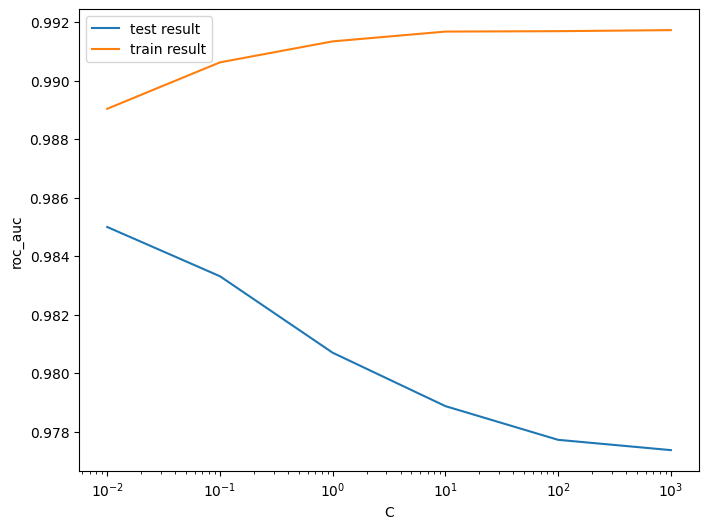

In [143]:
# plot - C versus train and validation scores

plt.figure(figsize=(8, 6))
plt.plot(cv_results['param_C'], cv_results['mean_test_score'])
plt.plot(cv_results['param_C'], cv_results['mean_train_score'])
plt.xlabel('C')
plt.ylabel('roc_auc')
plt.legend(['test result', 'train result'], loc='upper left')
plt.xscale('log')

In [144]:
# Identify best score with best C
best_score = model_cv.best_score_
best_C = model_cv.best_params_['C']

print(" The highest test roc_auc is {0} at C = {1}".format(best_score, best_C))

 The highest test roc_auc is 0.9849939278217323 at C = 0.01


### Logistic regression with optimal C

In [145]:
# Instantiate the model with best C
logistic_bal_rus = LogisticRegression(C=0.1)

# Fit the model on the train set
logistic_bal_rus_model = logistic_bal_rus.fit(X_train_rus, y_train_rus)

### Prediction on the train set

In [146]:
# Predictions on the train set
y_train_pred = logistic_bal_rus_model.predict(X_train_rus)

# Confusion matrix
confusion = metrics.confusion_matrix(y_train_rus, y_train_pred)
print(confusion)

[[392   4]
 [ 30 366]]


In [147]:
TP = confusion[1,1] # true positive
TN = confusion[0,0] # true negatives
FP = confusion[0,1] # false positives
FN = confusion[1,0] # false negatives

In [148]:
# print Accuracy
print("Accuracy:-",metrics.accuracy_score(y_train_rus, y_train_pred))

# print Sensitivity
print("Sensitivity:-",TP / float(TP+FN))

# print Specificity
print("Specificity:-", TN / float(TN+FP))

# print F1 score
print("F1-Score:-", f1_score(y_train_rus, y_train_pred))

Accuracy:- 0.9570707070707071
Sensitivity:- 0.9242424242424242
Specificity:- 0.98989898989899
F1-Score:- 0.9556135770234987


In [149]:
# classification_report
print(classification_report(y_train_rus, y_train_pred))

              precision    recall  f1-score   support

           0       0.93      0.99      0.96       396
           1       0.99      0.92      0.96       396

    accuracy                           0.96       792
   macro avg       0.96      0.96      0.96       792
weighted avg       0.96      0.96      0.96       792



In [150]:
# Predicted probability
y_train_pred_proba = logistic_bal_rus_model.predict_proba(X_train_rus)[:,1]

In [151]:
# roc_auc
auc = metrics.roc_auc_score(y_train_rus, y_train_pred_proba)
auc

0.9897842056932966

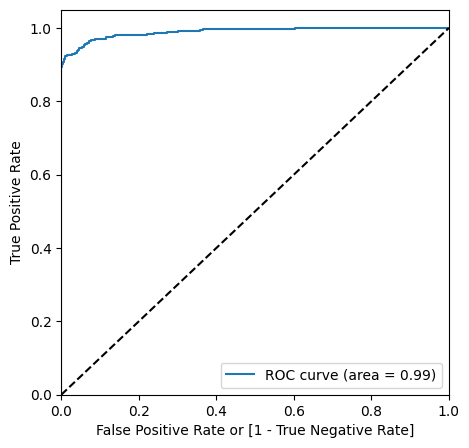

In [152]:
# Plot the ROC curve
draw_roc(y_train_rus, y_train_pred_proba)

#### Prediction on the test set

In [153]:
# Prediction on the test set
y_test_pred = logistic_bal_rus_model.predict(X_test)

In [154]:
# Confusion matrix
confusion = metrics.confusion_matrix(y_test, y_test_pred)
print(confusion)

[[55346  1520]
 [   13    83]]


In [155]:
TP = confusion[1,1] # true positive
TN = confusion[0,0] # true negatives
FP = confusion[0,1] # false positives
FN = confusion[1,0] # false negatives

In [156]:
# print Accuracy
print("Accuracy:-",metrics.accuracy_score(y_test, y_test_pred))

# print Sensitivity
print("Sensitivity:-",TP / float(TP+FN))

# print Specificity
print("Specificity:-", TN / float(TN+FP))

Accuracy:- 0.9730873213721428
Sensitivity:- 0.8645833333333334
Specificity:- 0.9732704955509444


In [157]:
# classification_report
print(classification_report(y_test, y_test_pred))

              precision    recall  f1-score   support

           0       1.00      0.97      0.99     56866
           1       0.05      0.86      0.10        96

    accuracy                           0.97     56962
   macro avg       0.53      0.92      0.54     56962
weighted avg       1.00      0.97      0.98     56962



In [158]:
# Predicted probability
y_test_pred_proba = logistic_bal_rus_model.predict_proba(X_test)[:,1]

In [159]:
# roc_auc
auc = metrics.roc_auc_score(y_test, y_test_pred_proba)
auc

0.9684224756444975

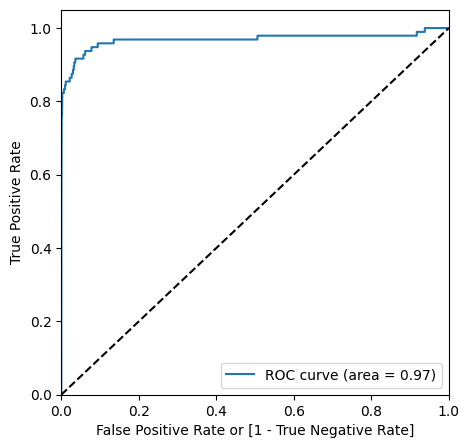

In [160]:
# Plot the ROC curve
draw_roc(y_test, y_test_pred_proba)

#### Model Summary on test data



*   Accuracy = 0.97
*   Sensitivity = -0.86
*   Specificity = -0.97
*   ROC = 0.97



### XGBoost

In [161]:
# hyperparameter tuning with XGBoost
folds = 3

# specify range of hyperparameters
param_grid = {'learning_rate': [0.2, 0.6], 'subsample': [0.3, 0.6, 0.9]}

# model
xgb_model = XGBClassifier(max_depth=2, n_estimators=200)

# GridSearchCV()
model_cv = GridSearchCV(estimator = xgb_model,
                        param_grid = param_grid,
                        scoring= 'roc_auc',
                        cv = folds,
                        verbose = 1,
                        return_train_score=True)

# fit the model
model_cv.fit(X_train_rus, y_train_rus)

Fitting 3 folds for each of 6 candidates, totalling 18 fits


GridSearchCV(cv=3,
             estimator=XGBClassifier(base_score=None, booster=None,
                                     callbacks=None, colsample_bylevel=None,
                                     colsample_bynode=None,
                                     colsample_bytree=None, device=None,
                                     early_stopping_rounds=None,
                                     enable_categorical=False, eval_metric=None,
                                     feature_types=None, gamma=None,
                                     grow_policy=None, importance_type=None,
                                     interaction_constraints=None,
                                     learning_rate=None,...
                                     max_cat_threshold=None,
                                     max_cat_to_onehot=None,
                                     max_delta_step=None, max_depth=2,
                                     max_leaves=None, min_child_weight=None,
                                     missing=nan, monotone_constraints=None,
                                     multi_strategy=None, n_estimators=200,
                                     n_jobs=None, num_parallel_tree=None,
                                     random_state=None, ...),
             param_grid={'learning_rate': [0.2, 0.6],
                         'subsample': [0.3, 0.6, 0.9]},
             return_train_score=True, scoring='roc_auc', verbose=1)

In [162]:
# GridSearchCV results
cv_results = pd.DataFrame(model_cv.cv_results_)
cv_results

mean_fit_time  std_fit_time  mean_score_time  std_score_time  \
0       0.429314      0.357080         0.017563        0.004724   
1       0.148365      0.008522         0.014820        0.001303   
2       0.161025      0.009349         0.014463        0.001270   
3       0.113851      0.003500         0.015299        0.002704   
4       0.417023      0.193999         0.026313        0.001288   
5       0.549030      0.113563         0.034364        0.013020   

   param_learning_rate  param_subsample  \
0                  0.2              0.3   
1                  0.2              0.6   
2                  0.2              0.9   
3                  0.6              0.3   
4                  0.6              0.6   
5                  0.6              0.9   

                                     params  split0_test_score  \
0  {'learning_rate': 0.2, 'subsample': 0.3}           0.956325   
1  {'learning_rate': 0.2, 'subsample': 0.6}           0.965048   
2  {'learning_rate': 0.2, 'subsample': 0.9}           0.969008   
3  {'learning_rate': 0.6, 'subsample': 0.3}           0.955980   
4  {'learning_rate': 0.6, 'subsample': 0.6}           0.966540   
5  {'learning_rate': 0.6, 'subsample': 0.9}           0.965220   

   split1_test_score  split2_test_score  mean_test_score  std_test_score  \
0           0.970673           0.980946         0.969314        0.010097   
1           0.972509           0.980659         0.972739        0.006375   
2           0.977043           0.976814         0.974288        0.003735   
3           0.956554           0.971476         0.961337        0.007173   
4           0.967172           0.980429         0.971380        0.006404   
5           0.970041           0.982955         0.972739        0.007487   

   rank_test_score  split0_train_score  split1_train_score  \
0                5            0.999857            0.999957   
1                2            1.000000            1.000000   
2                1            1.000000            1.000000   
3                6            1.000000            1.000000   
4                4            1.000000            1.000000   
5                2            1.000000            1.000000   

   split2_train_score  mean_train_score  std_train_score  
0            0.999986          0.999933         0.000055  
1            1.000000          1.000000         0.000000  
2            1.000000          1.000000         0.000000  
3            1.000000          1.000000         0.000000  
4            1.000000          1.000000         0.000000  
5            1.000000          1.000000         0.000000

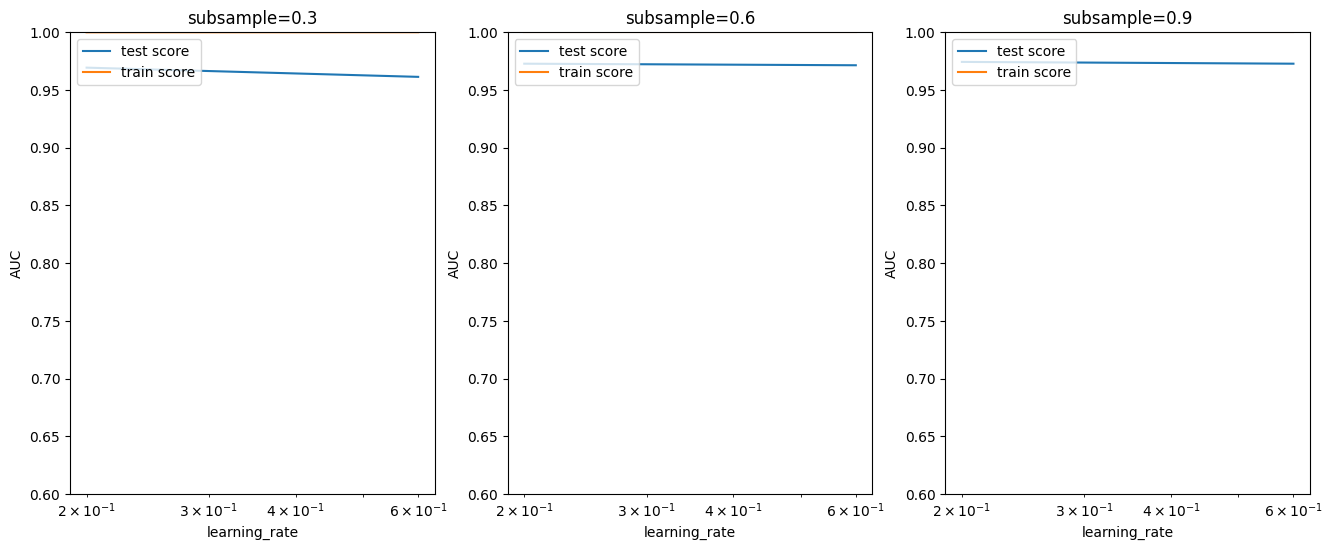

In [163]:
# plot
plt.figure(figsize=(16,6))
param_grid = {'learning_rate': [0.2, 0.6], 'subsample': [0.3, 0.6, 0.9]}


for n, subsample in enumerate(param_grid['subsample']):

    # subplot 1/n
    plt.subplot(1,len(param_grid['subsample']), n+1)
    df = cv_results[cv_results['param_subsample']==subsample]

    plt.plot(df["param_learning_rate"], df["mean_test_score"])
    plt.plot(df["param_learning_rate"], df["mean_train_score"])
    plt.xlabel('learning_rate')
    plt.ylabel('AUC')
    plt.title("subsample={0}".format(subsample))
    plt.ylim([0.60, 1])
    plt.legend(['test score', 'train score'], loc='upper left')
    plt.xscale('log')

In [164]:
model_cv.best_params_

{'learning_rate': 0.2, 'subsample': 0.9}

Choose the best parameters as learning_rate : 0.2 and subsample: 0.3

In [165]:
# 'objective':'binary:logistic' outputs probability rather than label, which we need for calculating auc
params = {'learning_rate': 0.2,
          'max_depth': 2,
          'n_estimators':200,
          'subsample':0.6,
         'objective':'binary:logistic'}

# fit model on training data
xgb_bal_rus_model = XGBClassifier(params = params)
xgb_bal_rus_model.fit(X_train_rus, y_train_rus)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None,
              num_parallel_tree=None,
              params={'learning_rate': 0.2, 'max_depth': 2, 'n_estimators': 200,
                      'objective': 'binary:logistic', 'subsample': 0.6}, ...)

#### Prediction on train set

In [166]:
# Predictions on the train set
y_train_pred = xgb_bal_rus_model.predict(X_train_rus)

In [167]:
# Confusion matrix
confusion = metrics.confusion_matrix(y_train_rus, y_train_rus)
print(confusion)

[[396   0]
 [  0 396]]


In [168]:
TP = confusion[1,1] # true positive
TN = confusion[0,0] # true negatives
FP = confusion[0,1] # false positives
FN = confusion[1,0] # false negatives

In [169]:
# print Accuracy
print("Accuracy:-",metrics.accuracy_score(y_train_rus, y_train_pred))

# print Sensitivity
print("Sensitivity:-",TP / float(TP+FN))

# print Specificity
print("Specificity:-", TN / float(TN+FP))

Accuracy:- 1.0
Sensitivity:- 1.0
Specificity:- 1.0


In [170]:
# classification_report
print(classification_report(y_train_rus, y_train_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00       396
           1       1.00      1.00      1.00       396

    accuracy                           1.00       792
   macro avg       1.00      1.00      1.00       792
weighted avg       1.00      1.00      1.00       792



In [171]:
# Predicted probability
y_train_pred_proba = xgb_bal_rus_model.predict_proba(X_train_rus)[:,1]

In [172]:
# roc_auc
auc = metrics.roc_auc_score(y_train_rus, y_train_pred_proba)
auc

1.0

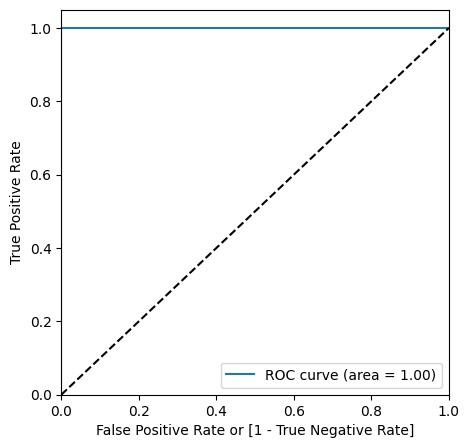

In [173]:
# Plot the ROC curve
draw_roc(y_train_rus, y_train_pred_proba)

#### Prediction on the test set

In [174]:
# Predictions on the test set
y_test_pred = xgb_bal_rus_model.predict(X_test)

In [175]:
# Confusion matrix
confusion = metrics.confusion_matrix(y_test, y_test_pred)
print(confusion)

[[54979  1887]
 [   11    85]]


In [176]:
TP = confusion[1,1] # true positive
TN = confusion[0,0] # true negatives
FP = confusion[0,1] # false positives
FN = confusion[1,0] # false negatives

In [177]:
# print Accuracy
print("Accuracy:-",metrics.accuracy_score(y_test, y_test_pred))

# print Sensitivity
print("Sensitivity:-",TP / float(TP+FN))

# print Specificity
print("Specificity:-", TN / float(TN+FP))

Accuracy:- 0.9666795407464626
Sensitivity:- 0.8854166666666666
Specificity:- 0.966816727042521


In [178]:
# classification_report
print(classification_report(y_test, y_test_pred))

              precision    recall  f1-score   support

           0       1.00      0.97      0.98     56866
           1       0.04      0.89      0.08        96

    accuracy                           0.97     56962
   macro avg       0.52      0.93      0.53     56962
weighted avg       1.00      0.97      0.98     56962



In [179]:
# Predicted probability
y_test_pred_proba = xgb_bal_rus_model.predict_proba(X_test)[:,1]

In [180]:
# roc_auc
auc = metrics.roc_auc_score(y_test, y_test_pred_proba)
auc

0.9804413189193308

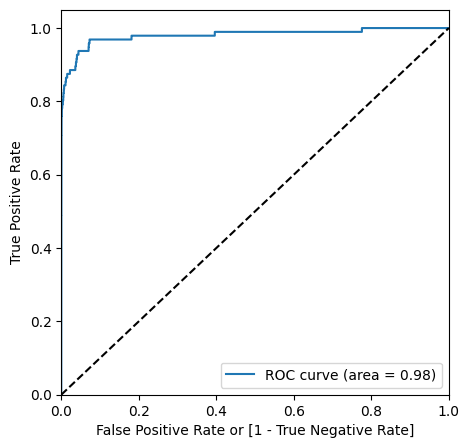

In [181]:
# Plot the ROC curve
draw_roc(y_test, y_test_pred_proba)

#### Model Summary

* Accuracy = -0.96
* Sensitivity = -0.88
* Specificity = -0.96
* ROC-AUC = 0.98


### Decision Tree

In [182]:
# create the parameter grid
param_grid = {
    'max_depth': range(5, 15, 5),
    'min_samples_leaf': range(50, 150, 50),
    'min_samples_split': range(50, 150, 50),
}

# Instantiate the grid search model
dtree = DecisionTreeClassifier()
grid_search = GridSearchCV(estimator = dtree,
                           param_grid = param_grid,
                           scoring= 'roc_auc',
                           cv = 3,
                           verbose = 1)

# Fit the grid search to the data
grid_search.fit(X_train_rus,y_train_rus)

Fitting 3 folds for each of 8 candidates, totalling 24 fits


GridSearchCV(cv=3, estimator=DecisionTreeClassifier(),
             param_grid={'max_depth': range(5, 15, 5),
                         'min_samples_leaf': range(50, 150, 50),
                         'min_samples_split': range(50, 150, 50)},
             scoring='roc_auc', verbose=1)

In [183]:
# GridSearchCV results
cv_results = pd.DataFrame(grid_search.cv_results_)
cv_results

mean_fit_time  std_fit_time  mean_score_time  std_score_time  \
0       0.009233      0.000522         0.004472        0.000967   
1       0.009094      0.000050         0.003867        0.000120   
2       0.007207      0.000298         0.003612        0.000041   
3       0.007269      0.000665         0.004086        0.000274   
4       0.009123      0.000177         0.003969        0.000132   
5       0.009106      0.000539         0.003886        0.000243   
6       0.007064      0.000053         0.003715        0.000150   
7       0.006759      0.000133         0.003717        0.000153   

   param_max_depth  param_min_samples_leaf  param_min_samples_split  \
0                5                      50                       50   
1                5                      50                      100   
2                5                     100                       50   
3                5                     100                      100   
4               10                      50                       50   
5               10                      50                      100   
6               10                     100                       50   
7               10                     100                      100   

                                              params  split0_test_score  \
0  {'max_depth': 5, 'min_samples_leaf': 50, 'min_...           0.944990   
1  {'max_depth': 5, 'min_samples_leaf': 50, 'min_...           0.938447   
2  {'max_depth': 5, 'min_samples_leaf': 100, 'min...           0.931646   
3  {'max_depth': 5, 'min_samples_leaf': 100, 'min...           0.937500   
4  {'max_depth': 10, 'min_samples_leaf': 50, 'min...           0.938447   
5  {'max_depth': 10, 'min_samples_leaf': 50, 'min...           0.943784   
6  {'max_depth': 10, 'min_samples_leaf': 100, 'mi...           0.935520   
7  {'max_depth': 10, 'min_samples_leaf': 100, 'mi...           0.930441   

   split1_test_score  split2_test_score  mean_test_score  std_test_score  \
0           0.953742           0.978794         0.959175        0.014325   
1           0.954086           0.978334         0.956956        0.016410   
2           0.953885           0.965393         0.950308        0.014007   
3           0.957157           0.964532         0.953063        0.011409   
4           0.953914           0.977072         0.956478        0.015872   
5           0.953742           0.979482         0.959003        0.015041   
6           0.953972           0.965450         0.951647        0.012329   
7           0.956985           0.965450         0.950958        0.014914   

   rank_test_score  
0                1  
1                3  
2                8  
3                5  
4                4  
5                2  
6                6  
7                7

In [184]:
# lets take a look at the optimal sensitivity score and hyperparameters
print("Best roc_auc:-", grid_search.best_score_)
print(grid_search.best_estimator_)

Best roc_auc:- 0.9591750841750842
DecisionTreeClassifier(max_depth=5, min_samples_leaf=50, min_samples_split=50)


In [185]:
# modeling with optimal hyperparameters
dt_bal_rus_model = DecisionTreeClassifier(criterion = "gini",
                                  random_state = 100,
                                  max_depth=5,
                                  min_samples_leaf=50,
                                  min_samples_split=50)

dt_bal_rus_model.fit(X_train_rus, y_train_rus)

DecisionTreeClassifier(max_depth=5, min_samples_leaf=50, min_samples_split=50,
                       random_state=100)

#### Prediction on the train set

In [186]:
# Predictions on the train set
y_train_pred = dt_bal_rus_model.predict(X_train_rus)

In [187]:
# Confusion matrix
confusion = metrics.confusion_matrix(y_train_rus, y_train_pred)
print(confusion)

[[386  10]
 [ 50 346]]


In [188]:
TP = confusion[1,1] # true positive
TN = confusion[0,0] # true negatives
FP = confusion[0,1] # false positives
FN = confusion[1,0] # false negatives

In [189]:
# print Accuracy
print("Accuracy:-",metrics.accuracy_score(y_train_rus, y_train_pred))

# print Sensitivity
print("Sensitivity:-",TP / float(TP+FN))

# print Specificity
print("Specificity:-", TN / float(TN+FP))

Accuracy:- 0.9242424242424242
Sensitivity:- 0.8737373737373737
Specificity:- 0.9747474747474747


In [190]:
# classification_report
print(classification_report(y_train_rus, y_train_pred))

              precision    recall  f1-score   support

           0       0.89      0.97      0.93       396
           1       0.97      0.87      0.92       396

    accuracy                           0.92       792
   macro avg       0.93      0.92      0.92       792
weighted avg       0.93      0.92      0.92       792



In [191]:
# Predicted probability
y_train_pred_proba = dt_bal_rus_model.predict_proba(X_train_rus)[:,1]

In [192]:
# roc_auc
auc = metrics.roc_auc_score(y_train_rus, y_train_pred_proba)
auc

0.9790997092133457

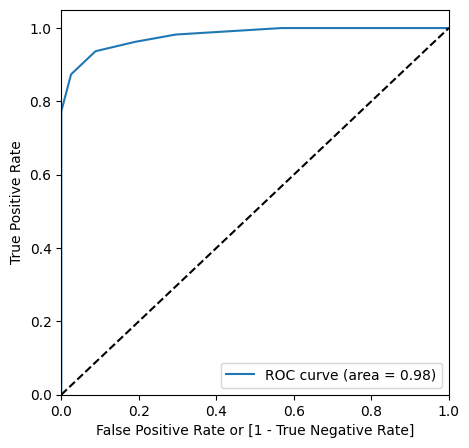

In [193]:
# Plot the ROC curve
draw_roc(y_train_rus, y_train_pred_proba)

#### Prediction on the test set

In [194]:
# Predictions on the test set
y_test_pred = dt_bal_rus_model.predict(X_test)

# Confusion matrix
confusion = metrics.confusion_matrix(y_test, y_test_pred)
print(confusion)

[[55435  1431]
 [   19    77]]


In [195]:
TP = confusion[1,1] # true positive
TN = confusion[0,0] # true negatives
FP = confusion[0,1] # false positives
FN = confusion[1,0] # false negatives

In [196]:
# print Accuracy
print("Accuracy:-",metrics.accuracy_score(y_test, y_test_pred))

# print Sensitivity
print("Sensitivity:-",TP / float(TP+FN))

# print Specificity
print("Specificity:-", TN / float(TN+FP))

Accuracy:- 0.9745444331308591
Sensitivity:- 0.8020833333333334
Specificity:- 0.9748355783772377


In [197]:
# classification_report
print(classification_report(y_test, y_test_pred))

              precision    recall  f1-score   support

           0       1.00      0.97      0.99     56866
           1       0.05      0.80      0.10        96

    accuracy                           0.97     56962
   macro avg       0.53      0.89      0.54     56962
weighted avg       1.00      0.97      0.99     56962



In [198]:
# Predicted probability
y_test_pred_proba = dt_bal_rus_model.predict_proba(X_test)[:,1]

In [199]:
# roc_auc
auc = metrics.roc_auc_score(y_test, y_test_pred_proba)
auc

0.9581126940233766

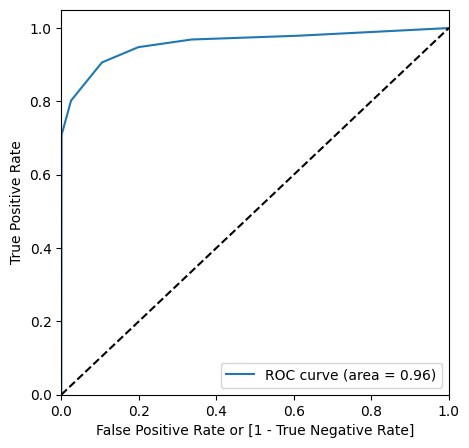

In [200]:
# Plot the ROC curve
draw_roc(y_test, y_test_pred_proba)

#### Model Summary on test data

* Accuracy:- 0.9745444331308591
* Sensitivity:- 0.8020833333333334
* Specificity:- 0.9748355783772377
* ROC-AUC = 0.96

## Random Forest

In [201]:
param_grid = {
    'max_depth': range(5,10,5),
    'min_samples_leaf': range(50, 150, 50),
    'min_samples_split': range(50, 150, 50),
    'n_estimators': [100,200,300],
    'max_features': [10, 20]
}
# Create a based model
rf = RandomForestClassifier()
# Instantiate the grid search model
grid_search = GridSearchCV(estimator = rf,
                           param_grid = param_grid,
                           scoring= 'roc_auc',
                           cv = 2,
                           n_jobs = -1,
                           verbose = 1,
                           return_train_score=True)

# Fit the model
grid_search.fit(X_train_rus, y_train_rus)

Fitting 2 folds for each of 24 candidates, totalling 48 fits


GridSearchCV(cv=2, estimator=RandomForestClassifier(), n_jobs=-1,
             param_grid={'max_depth': range(5, 10, 5), 'max_features': [10, 20],
                         'min_samples_leaf': range(50, 150, 50),
                         'min_samples_split': range(50, 150, 50),
                         'n_estimators': [100, 200, 300]},
             return_train_score=True, scoring='roc_auc', verbose=1)

In [202]:
# take a look at the optimal accuracy score and hyperparameters
print('ROC-AUC : ',grid_search.best_score_,'using',grid_search.best_params_)

ROC-AUC :  0.9764564840322416 using {'max_depth': 5, 'max_features': 10, 'min_samples_leaf': 50, 'min_samples_split': 50, 'n_estimators': 100}


In [203]:
# modeling with the best hyperparameters

rfc_bal_rus_model = RandomForestClassifier(bootstrap=True,
                             max_depth=5,
                             min_samples_leaf=50,
                             min_samples_split=50,
                             max_features=10,
                             n_estimators=100)

In [204]:
# fit the model
rfc_bal_rus_model.fit(X_train_rus, y_train_rus)

RandomForestClassifier(max_depth=5, max_features=10, min_samples_leaf=50,
                       min_samples_split=50)

#### Prediction on the train set

In [205]:
# Predictions on the train set
y_train_pred = rfc_bal_rus_model.predict(X_train_rus)

# Confusion matrix
confusion = metrics.confusion_matrix(y_train_rus, y_train_pred)
print(confusion)

[[392   4]
 [ 45 351]]


In [206]:
TP = confusion[1,1] # true positive
TN = confusion[0,0] # true negatives
FP = confusion[0,1] # false positives
FN = confusion[1,0] # false negatives

In [207]:
# print Accuracy
print("Accuracy:-",metrics.accuracy_score(y_train_rus, y_train_pred))

# print Sensitivity
print("Sensitivity:-",TP / float(TP+FN))

# print Specificity
print("Specificity:-", TN / float(TN+FP))

# print F1 score
print("F1 Score:-", f1_score(y_train_rus, y_train_pred))

Accuracy:- 0.9381313131313131
Sensitivity:- 0.8863636363636364
Specificity:- 0.98989898989899
F1 Score:- 0.9347536617842876


In [208]:
# classification_report
print(classification_report(y_train_rus, y_train_pred))

              precision    recall  f1-score   support

           0       0.90      0.99      0.94       396
           1       0.99      0.89      0.93       396

    accuracy                           0.94       792
   macro avg       0.94      0.94      0.94       792
weighted avg       0.94      0.94      0.94       792



In [209]:
# Predicted probability
y_train_pred_proba = rfc_bal_rus_model.predict_proba(X_train_rus)[:,1]

# roc_auc
auc = metrics.roc_auc_score(y_train_rus, y_train_pred_proba)
auc

0.9837644117947149

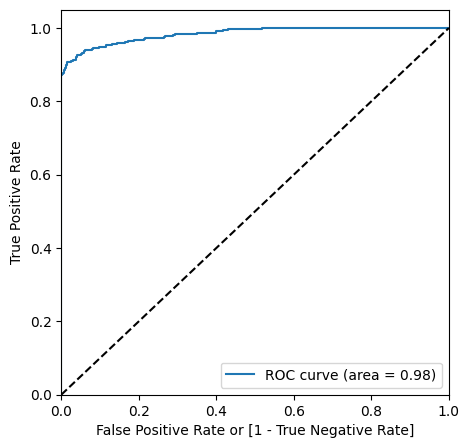

In [210]:
# Plot the ROC curve
draw_roc(y_train_rus, y_train_pred_proba)

#### Prediction on the test set

In [211]:
# Predictions on the test set
y_test_pred = rfc_bal_rus_model.predict(X_test)

# Confusion matrix
confusion = metrics.confusion_matrix(y_test, y_test_pred)
print(confusion)

[[56141   725]
 [   18    78]]


In [212]:
TP = confusion[1,1] # true positive
TN = confusion[0,0] # true negatives
FP = confusion[0,1] # false positives
FN = confusion[1,0] # false negatives

In [213]:
# print Accuracy
print("Accuracy:-",metrics.accuracy_score(y_test, y_test_pred))

# print Sensitivity
print("Sensitivity:-",TP / float(TP+FN))

# print Specificity
print("Specificity:-", TN / float(TN+FP))

Accuracy:- 0.9869562164249851
Sensitivity:- 0.8125
Specificity:- 0.9872507297858123


In [214]:
# classification_report
print(classification_report(y_test, y_test_pred))

              precision    recall  f1-score   support

           0       1.00      0.99      0.99     56866
           1       0.10      0.81      0.17        96

    accuracy                           0.99     56962
   macro avg       0.55      0.90      0.58     56962
weighted avg       1.00      0.99      0.99     56962



In [215]:
# Predicted probability
y_test_pred_proba = rfc_bal_rus_model.predict_proba(X_test)[:,1]

# roc_auc
auc = metrics.roc_auc_score(y_test, y_test_pred_proba)
auc

0.9714207522948686

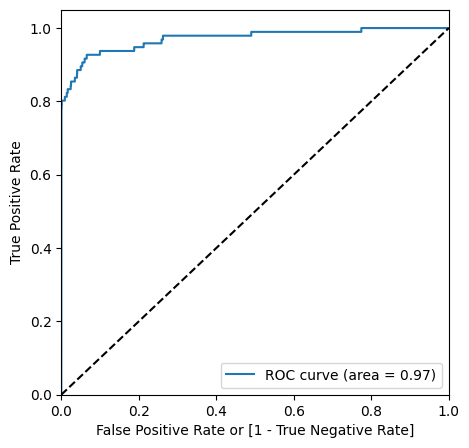

In [216]:
# Plot the ROC curve
draw_roc(y_test, y_test_pred_proba)

#### Model Summary based on test data

* Accuracy:- 0.9869562164249851
* Sensitivity:- 0.8125
* Specificity:- 0.9872507297858123
* ROC-AUC = 0.97

## Oversampling

In [217]:
# import oversampler library
from imblearn.over_sampling import RandomOverSampler

# instantiate the random oversampler
ros = RandomOverSampler()
# resampling X, y
X_train_ros, y_train_ros = ros.fit_resample(X_train, y_train)

# befor sampling class distribution
print('Before sampling class distribution:-',Counter(y_train))
# new class distribution
print('New class distribution:-',Counter(y_train_ros))


Before sampling class distribution:- Counter({0: 227449, 1: 396})
New class distribution:- Counter({0: 227449, 1: 227449})


### Logistic Regression

In [218]:
# Creating KFold object with 5 splits
folds = KFold(n_splits=5, shuffle=True, random_state=4)

# Specify params
params = {"C": [0.01, 0.1, 1, 10, 100, 1000]}

# Specifing score as roc-auc
model_cv = GridSearchCV(estimator = LogisticRegression(),
                        param_grid = params,
                        scoring= 'roc_auc',
                        cv = folds,
                        verbose = 1,
                        return_train_score=True)

# Fit the model
model_cv.fit(X_train_ros, y_train_ros)

Fitting 5 folds for each of 6 candidates, totalling 30 fits


GridSearchCV(cv=KFold(n_splits=5, random_state=4, shuffle=True),
             estimator=LogisticRegression(),
             param_grid={'C': [0.01, 0.1, 1, 10, 100, 1000]},
             return_train_score=True, scoring='roc_auc', verbose=1)

In [219]:
# GridSearchCV results
cv_results = pd.DataFrame(model_cv.cv_results_)
cv_results

mean_fit_time  std_fit_time  mean_score_time  std_score_time  param_C  \
0       2.916795      0.377089         0.104792        0.028093     0.01   
1       2.983229      0.864799         0.139808        0.057943     0.10   
2       2.698701      0.777060         0.132546        0.047714     1.00   
3       1.693713      0.408506         0.073209        0.023885    10.00   
4       1.412270      0.096514         0.053453        0.003223   100.00   
5       1.692987      0.334935         0.062581        0.009737  1000.00   

        params  split0_test_score  split1_test_score  split2_test_score  \
0  {'C': 0.01}           0.988667           0.988513           0.988348   
1   {'C': 0.1}           0.988671           0.988524           0.988369   
2     {'C': 1}           0.988674           0.988528           0.988361   
3    {'C': 10}           0.988673           0.988528           0.988365   
4   {'C': 100}           0.988674           0.988528           0.988365   
5  {'C': 1000}           0.988674           0.988529           0.988365   

   split3_test_score  split4_test_score  mean_test_score  std_test_score  \
0           0.988292           0.988442         0.988453        0.000132   
1           0.988305           0.988470         0.988468        0.000127   
2           0.988301           0.988473         0.988467        0.000131   
3           0.988300           0.988474         0.988468        0.000130   
4           0.988300           0.988474         0.988468        0.000130   
5           0.988300           0.988474         0.988468        0.000130   

   rank_test_score  split0_train_score  split1_train_score  \
0                6            0.988445            0.988392   
1                4            0.988453            0.988405   
2                5            0.988454            0.988409   
3                3            0.988454            0.988409   
4                2            0.988454            0.988409   
5                1            0.988454            0.988409   

   split2_train_score  split3_train_score  split4_train_score  \
0            0.988503            0.988566            0.988445   
1            0.988521            0.988581            0.988462   
2            0.988517            0.988582            0.988463   
3            0.988518            0.988581            0.988463   
4            0.988519            0.988581            0.988463   
5            0.988519            0.988581            0.988463   

   mean_train_score  std_train_score  
0          0.988470         0.000059  
1          0.988484         0.000061  
2          0.988485         0.000059  
3          0.988485         0.000059  
4          0.988485         0.000059  
5          0.988485         0.000059

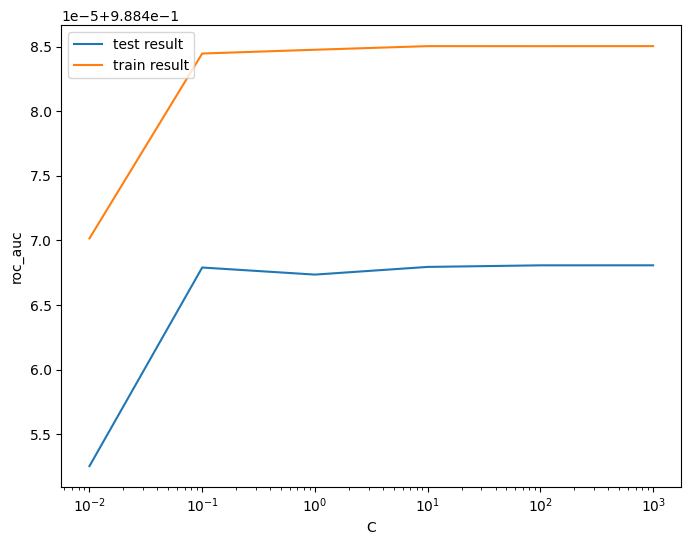

In [220]:
# plot of C versus train and validation scores

plt.figure(figsize=(8, 6))
plt.plot(cv_results['param_C'], cv_results['mean_test_score'])
plt.plot(cv_results['param_C'], cv_results['mean_train_score'])
plt.xlabel('C')
plt.ylabel('roc_auc')
plt.legend(['test result', 'train result'], loc='upper left')
plt.xscale('log')

In [221]:
# Best score with best C
best_score = model_cv.best_score_
best_C = model_cv.best_params_['C']

print(" The highest test roc_auc is {0} at C = {1}".format(best_score, best_C))

 The highest test roc_auc is 0.9884680748626387 at C = 1000


#### Logistic regression with optimal C

In [222]:
# instantiate the model with best C
logistic_bal_ros = LogisticRegression(C=1000)

In [223]:
# Fit the model on the train set
logistic_bal_ros_model = logistic_bal_ros.fit(X_train_ros, y_train_ros)

#### Prediction on the train set

In [224]:
# predictions on the train set
y_train_pred = logistic_bal_ros_model.predict(X_train_ros)

In [225]:
# Confusion matrix
confusion = metrics.confusion_matrix(y_train_ros, y_train_pred)
print(confusion)

[[222198   5251]
 [ 17329 210120]]


In [226]:
TP = confusion[1,1] # true positive
TN = confusion[0,0] # true negatives
FP = confusion[0,1] # false positives
FN = confusion[1,0] # false negatives

In [228]:
# print Accuracy
print("Accuracy:-",metrics.accuracy_score(y_train_ros, y_train_pred))

# print Sensitivity
print("Sensitivity:-",TP / float(TP+FN))

# print Specificity
print("Specificity:-", TN / float(TN+FP))

# print F1 score
print("F1 Score:-", f1_score(y_train_ros, y_train_pred))

Accuracy:- 0.9503624988458951
Sensitivity:- 0.9238114918069545
Specificity:- 0.9769135058848357
F1 Score:- 0.949008626529967


In [229]:
# classification_report
print(classification_report(y_train_ros, y_train_pred))

              precision    recall  f1-score   support

           0       0.93      0.98      0.95    227449
           1       0.98      0.92      0.95    227449

    accuracy                           0.95    454898
   macro avg       0.95      0.95      0.95    454898
weighted avg       0.95      0.95      0.95    454898



In [230]:
# Predicted probability
y_train_pred_proba = logistic_bal_ros_model.predict_proba(X_train_ros)[:,1]

In [231]:
# roc_auc
auc = metrics.roc_auc_score(y_train_ros, y_train_pred_proba)
auc

0.9884838180113618

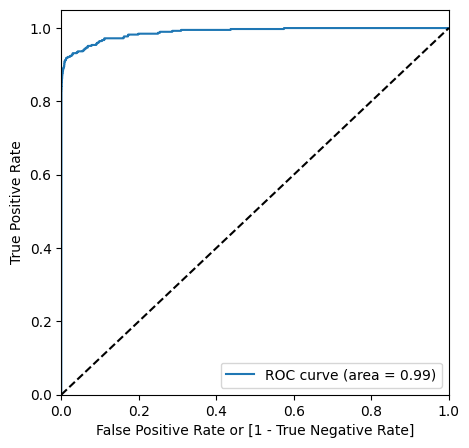

In [232]:
# Plot the ROC curve
draw_roc(y_train_ros, y_train_pred_proba)

#### Prediction on TEst Set

In [233]:
# Prediction on the test set
y_test_pred = logistic_bal_ros_model.predict(X_test)

# Confusion matrix
confusion = metrics.confusion_matrix(y_test, y_test_pred)
print(confusion)



[[55521  1345]
 [   11    85]]


In [234]:
TP = confusion[1,1] # true positive
TN = confusion[0,0] # true negatives
FP = confusion[0,1] # false positives
FN = confusion[1,0] # false negatives

In [235]:
# Accuracy
print("Accuracy:-",metrics.accuracy_score(y_test, y_test_pred))

# Sensitivity
print("Sensitivity:-",TP / float(TP+FN))

# Specificity
print("Specificity:-", TN / float(TN+FP))

Accuracy:- 0.9761946560865138
Sensitivity:- 0.8854166666666666
Specificity:- 0.9763479056026448


In [236]:
# classification_report
print(classification_report(y_test, y_test_pred))

              precision    recall  f1-score   support

           0       1.00      0.98      0.99     56866
           1       0.06      0.89      0.11        96

    accuracy                           0.98     56962
   macro avg       0.53      0.93      0.55     56962
weighted avg       1.00      0.98      0.99     56962



In [237]:
# Predicted probability
y_test_pred_proba = logistic_bal_ros_model.predict_proba(X_test)[:,1]

# roc_auc
auc = metrics.roc_auc_score(y_test, y_test_pred_proba)
auc

0.9714183709656619

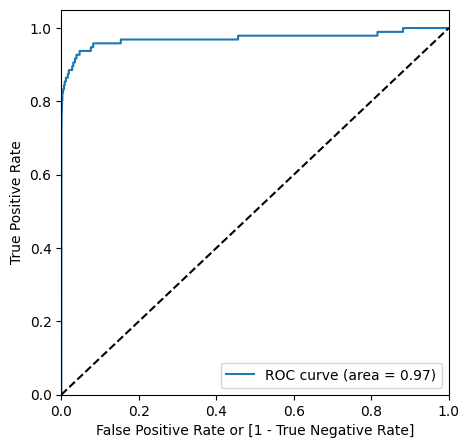

In [238]:
# Plot the ROC curve
draw_roc(y_test, y_test_pred_proba)

#### Model Summary bsed oin test data

* Accuracy:- 0.9761946560865138
* Sensitivity:- 0.8854166666666666
* Specificity:- 0.9763479056026448
* ROC-AUC = 0.97

## XGBoost

In [239]:
# hyperparameter tuning with XGBoost

# create a KFold object
folds = 3

# specify range of hyperparameters
param_grid = {'learning_rate': [0.2, 0.6],
             'subsample': [0.3, 0.6, 0.9]}


# specify model
xgb_model = XGBClassifier(max_depth=2, n_estimators=200)

# set up GridSearchCV()
model_cv = GridSearchCV(estimator = xgb_model,
                        param_grid = param_grid,
                        scoring= 'roc_auc',
                        cv = folds,
                        verbose = 1,
                        return_train_score=True)

# fit the model
model_cv.fit(X_train_ros, y_train_ros)

Fitting 3 folds for each of 6 candidates, totalling 18 fits


GridSearchCV(cv=3,
             estimator=XGBClassifier(base_score=None, booster=None,
                                     callbacks=None, colsample_bylevel=None,
                                     colsample_bynode=None,
                                     colsample_bytree=None, device=None,
                                     early_stopping_rounds=None,
                                     enable_categorical=False, eval_metric=None,
                                     feature_types=None, gamma=None,
                                     grow_policy=None, importance_type=None,
                                     interaction_constraints=None,
                                     learning_rate=None,...
                                     max_cat_threshold=None,
                                     max_cat_to_onehot=None,
                                     max_delta_step=None, max_depth=2,
                                     max_leaves=None, min_child_weight=None,
                                     missing=nan, monotone_constraints=None,
                                     multi_strategy=None, n_estimators=200,
                                     n_jobs=None, num_parallel_tree=None,
                                     random_state=None, ...),
             param_grid={'learning_rate': [0.2, 0.6],
                         'subsample': [0.3, 0.6, 0.9]},
             return_train_score=True, scoring='roc_auc', verbose=1)

In [240]:
# GridSearchCV results
cv_results = pd.DataFrame(model_cv.cv_results_)
cv_results

mean_fit_time  std_fit_time  mean_score_time  std_score_time  \
0      14.882956      3.671764         0.640775        0.166441   
1      12.956922      2.960710         0.320783        0.084468   
2      10.915601      4.592952         0.332251        0.055198   
3      12.806340      2.117002         0.414397        0.111043   
4       7.872772      1.172135         0.330707        0.094764   
5       6.881726      1.425999         0.265717        0.009685   

   param_learning_rate  param_subsample  \
0                  0.2              0.3   
1                  0.2              0.6   
2                  0.2              0.9   
3                  0.6              0.3   
4                  0.6              0.6   
5                  0.6              0.9   

                                     params  split0_test_score  \
0  {'learning_rate': 0.2, 'subsample': 0.3}           0.999885   
1  {'learning_rate': 0.2, 'subsample': 0.6}           0.999903   
2  {'learning_rate': 0.2, 'subsample': 0.9}           0.999893   
3  {'learning_rate': 0.6, 'subsample': 0.3}           0.999988   
4  {'learning_rate': 0.6, 'subsample': 0.6}           0.999984   
5  {'learning_rate': 0.6, 'subsample': 0.9}           0.999987   

   split1_test_score  split2_test_score  mean_test_score  std_test_score  \
0           0.999906           0.999890         0.999894        0.000009   
1           0.999918           0.999908         0.999910        0.000006   
2           0.999916           0.999901         0.999903        0.000010   
3           0.999987           0.999976         0.999984        0.000006   
4           0.999981           0.999984         0.999983        0.000001   
5           0.999989           0.999978         0.999985        0.000005   

   rank_test_score  split0_train_score  split1_train_score  \
0                6            0.999905            0.999914   
1                4            0.999916            0.999926   
2                5            0.999906            0.999917   
3                2            0.999999            0.999997   
4                3            0.999997            0.999997   
5                1            0.999995            0.999997   

   split2_train_score  mean_train_score  std_train_score  
0            0.999913          0.999910     3.729390e-06  
1            0.999919          0.999920     4.242126e-06  
2            0.999921          0.999915     6.321075e-06  
3            0.999997          0.999998     8.934494e-07  
4            1.000000          0.999998     1.252442e-06  
5            0.999998          0.999997     1.332003e-06

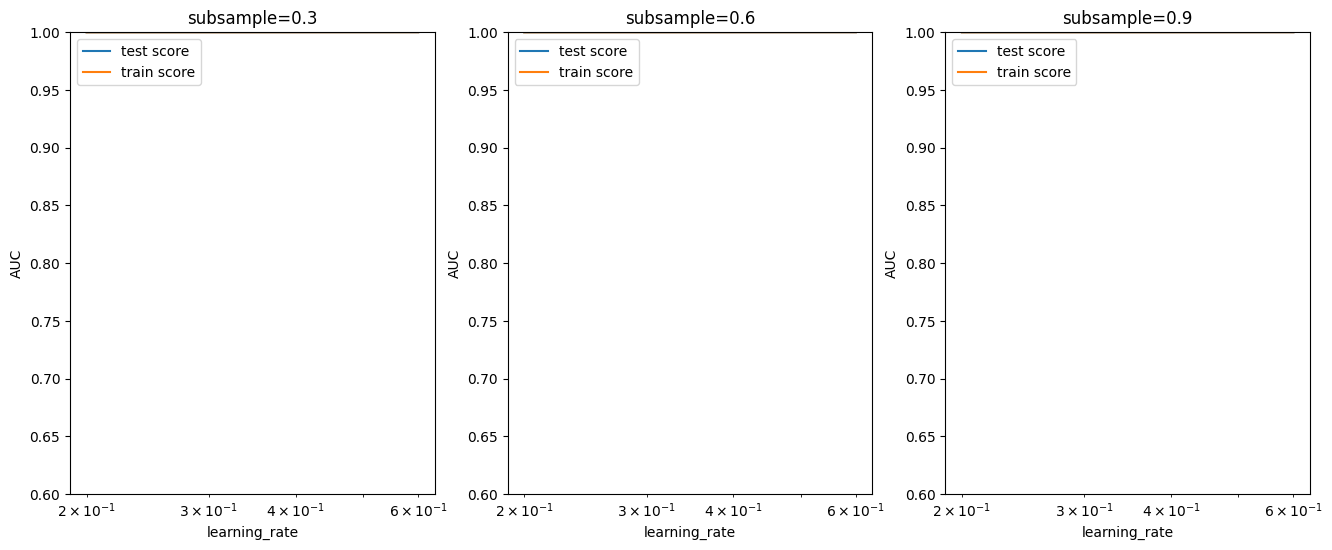

In [241]:
# lets plot
plt.figure(figsize=(16,6))

param_grid = {'learning_rate': [0.2, 0.6], 'subsample': [0.3, 0.6, 0.9]}


for n, subsample in enumerate(param_grid['subsample']):

    # subplot 1/n
    plt.subplot(1,len(param_grid['subsample']), n+1)
    df = cv_results[cv_results['param_subsample']==subsample]

    plt.plot(df["param_learning_rate"], df["mean_test_score"])
    plt.plot(df["param_learning_rate"], df["mean_train_score"])
    plt.xlabel('learning_rate')
    plt.ylabel('AUC')
    plt.title("subsample={0}".format(subsample))
    plt.ylim([0.60, 1])
    plt.legend(['test score', 'train score'], loc='upper left')
    plt.xscale('log')

Choose best parameters as learning_rate : 0.2 and subsample: 0.3

In [242]:
model_cv.best_params_

{'learning_rate': 0.6, 'subsample': 0.9}

In [243]:
# chosen hyperparameters
params = {'learning_rate': 0.6,
          'max_depth': 2,
          'n_estimators':200,
          'subsample':0.9,
         'objective':'binary:logistic'}

# fit model on training data
xgb_bal_ros_model = XGBClassifier(params = params)
xgb_bal_ros_model.fit(X_train_ros, y_train_ros)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None,
              num_parallel_tree=None,
              params={'learning_rate': 0.6, 'max_depth': 2, 'n_estimators': 200,
                      'objective': 'binary:logistic', 'subsample': 0.9}, ...)

#### Prediction on the train set

In [244]:
# Predictions on the train set
y_train_pred = xgb_bal_ros_model.predict(X_train_ros)

# Confusion matrix
confusion = metrics.confusion_matrix(y_train_ros, y_train_ros)
print(confusion)



[[227449      0]
 [     0 227449]]


In [245]:
TP = confusion[1,1] # true positive
TN = confusion[0,0] # true negatives
FP = confusion[0,1] # false positives
FN = confusion[1,0] # false negatives


# print Accuracy
print("Accuracy:-",metrics.accuracy_score(y_train_ros, y_train_pred))

# print Sensitivity
print("Sensitivity:-",TP / float(TP+FN))

# print Specificity
print("Specificity:-", TN / float(TN+FP))

Accuracy:- 1.0
Sensitivity:- 1.0
Specificity:- 1.0


In [246]:
# classification_report
print(classification_report(y_train_ros, y_train_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00    227449
           1       1.00      1.00      1.00    227449

    accuracy                           1.00    454898
   macro avg       1.00      1.00      1.00    454898
weighted avg       1.00      1.00      1.00    454898



In [247]:
# Predicted probability
y_train_pred_proba = xgb_bal_ros_model.predict_proba(X_train_ros)[:,1]

# roc_auc
auc = metrics.roc_auc_score(y_train_ros, y_train_pred_proba)
auc


1.0

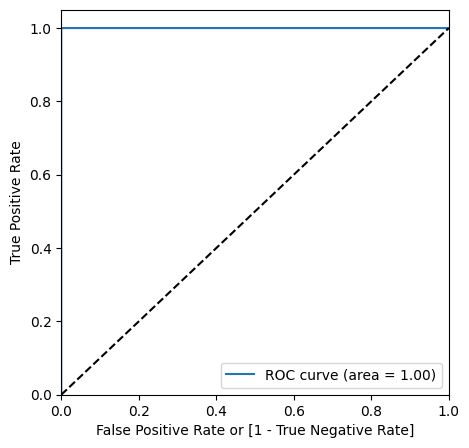

In [248]:
# Plot the ROC curve
draw_roc(y_train_ros, y_train_pred_proba)

#### Prediction on test set

In [249]:
# Predictions on the test set
y_test_pred = xgb_bal_ros_model.predict(X_test)

# Confusion matrix
confusion = metrics.confusion_matrix(y_test, y_test_pred)
print(confusion)

[[56854    12]
 [   21    75]]


In [250]:
TP = confusion[1,1] # true positive
TN = confusion[0,0] # true negatives
FP = confusion[0,1] # false positives
FN = confusion[1,0] # false negatives

# Accuracy
print("Accuracy:-",metrics.accuracy_score(y_test, y_test_pred))

# Sensitivity
print("Sensitivity:-",TP / float(TP+FN))

# Specificity
print("Specificity:-", TN / float(TN+FP))

Accuracy:- 0.999420666409185
Sensitivity:- 0.78125
Specificity:- 0.9997889775964548


In [251]:
# classification_report
print(classification_report(y_test, y_test_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56866
           1       0.86      0.78      0.82        96

    accuracy                           1.00     56962
   macro avg       0.93      0.89      0.91     56962
weighted avg       1.00      1.00      1.00     56962



In [252]:
# Predicted probability
y_test_pred_proba = xgb_bal_ros_model.predict_proba(X_test)[:,1]

# roc_auc
auc = metrics.roc_auc_score(y_test, y_test_pred_proba)
auc

0.9766294519865415

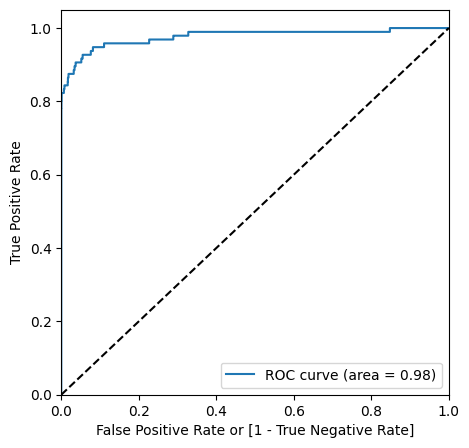

In [253]:
# Plot the ROC curve
draw_roc(y_test, y_test_pred_proba)

#### Model summary based on test data

* Accuracy:- 0.999420666409185
* Sensitivity:- 0.78125
* Specificity:- 0.9997889775964548
* ROC = 0.98

## Decision Tree

In [254]:
# Create the parameter grid
param_grid = {
    'max_depth': range(5, 15, 5),
    'min_samples_leaf': range(50, 150, 50),
    'min_samples_split': range(50, 150, 50),
}


# Instantiate the grid search model
dtree = DecisionTreeClassifier()

grid_search = GridSearchCV(estimator = dtree,
                           param_grid = param_grid,
                           scoring= 'roc_auc',
                           cv = 3,
                           verbose = 1)

# Fit the grid search to the data
grid_search.fit(X_train_ros,y_train_ros)

Fitting 3 folds for each of 8 candidates, totalling 24 fits


GridSearchCV(cv=3, estimator=DecisionTreeClassifier(),
             param_grid={'max_depth': range(5, 15, 5),
                         'min_samples_leaf': range(50, 150, 50),
                         'min_samples_split': range(50, 150, 50)},
             scoring='roc_auc', verbose=1)

In [255]:
# GridSearc results
cv_results = pd.DataFrame(grid_search.cv_results_)
cv_results

mean_fit_time  std_fit_time  mean_score_time  std_score_time  \
0       7.529929      2.339747         0.054447        0.001082   
1       7.878972      0.982881         0.119342        0.046605   
2       9.150377      1.102860         0.088383        0.012172   
3       9.382061      0.626660         0.078165        0.000855   
4      14.155504      1.218099         0.073782        0.012558   
5      13.789304      1.087910         0.161668        0.109040   
6      12.962071      2.167298         0.081132        0.001254   
7      14.488216      0.363401         0.102164        0.048276   

   param_max_depth  param_min_samples_leaf  param_min_samples_split  \
0                5                      50                       50   
1                5                      50                      100   
2                5                     100                       50   
3                5                     100                      100   
4               10                      50                       50   
5               10                      50                      100   
6               10                     100                       50   
7               10                     100                      100   

                                              params  split0_test_score  \
0  {'max_depth': 5, 'min_samples_leaf': 50, 'min_...           0.990369   
1  {'max_depth': 5, 'min_samples_leaf': 50, 'min_...           0.990369   
2  {'max_depth': 5, 'min_samples_leaf': 100, 'min...           0.990351   
3  {'max_depth': 5, 'min_samples_leaf': 100, 'min...           0.990344   
4  {'max_depth': 10, 'min_samples_leaf': 50, 'min...           0.999599   
5  {'max_depth': 10, 'min_samples_leaf': 50, 'min...           0.999599   
6  {'max_depth': 10, 'min_samples_leaf': 100, 'mi...           0.999593   
7  {'max_depth': 10, 'min_samples_leaf': 100, 'mi...           0.999599   

   split1_test_score  split2_test_score  mean_test_score  std_test_score  \
0           0.990749           0.990577         0.990565        0.000155   
1           0.990749           0.990563         0.990560        0.000155   
2           0.990658           0.990481         0.990497        0.000126   
3           0.990669           0.990471         0.990495        0.000133   
4           0.999626           0.999584         0.999603        0.000017   
5           0.999627           0.999627         0.999618        0.000013   
6           0.999640           0.999487         0.999573        0.000064   
7           0.999697           0.999487         0.999594        0.000086   

   rank_test_score  
0                5  
1                6  
2                7  
3                8  
4                2  
5                1  
6                4  
7                3

In [256]:
# lets look at the optimal sensitivity score and hyperparameters
print("Best roc_auc:-", grid_search.best_score_)
print(grid_search.best_estimator_)

Best roc_auc:- 0.9996175834929089
DecisionTreeClassifier(max_depth=10, min_samples_leaf=50, min_samples_split=100)


In [257]:
# Model with optimal hyperparameters
dt_bal_ros_model = DecisionTreeClassifier(criterion = "gini",
                                  random_state = 100,
                                  max_depth=10,
                                  min_samples_leaf=100,
                                  min_samples_split=50)

dt_bal_ros_model.fit(X_train_ros, y_train_ros)

DecisionTreeClassifier(max_depth=10, min_samples_leaf=100, min_samples_split=50,
                       random_state=100)

#### Prediction on train set

In [258]:
# Predictions on the train set
y_train_pred = dt_bal_ros_model.predict(X_train_ros)

# Confusion matrix
confusion = metrics.confusion_matrix(y_train_ros, y_train_pred)
print(confusion)

[[225938   1511]
 [     0 227449]]


In [259]:
TP = confusion[1,1] # true positive
TN = confusion[0,0] # true negatives
FP = confusion[0,1] # false positives
FN = confusion[1,0] # false negatives

# Accuracy
print("Accuracy:-",metrics.accuracy_score(y_train_ros, y_train_pred))

# Sensitivity
print("Sensitivity:-",TP / float(TP+FN))

# Specificity
print("Specificity:-", TN / float(TN+FP))

Accuracy:- 0.9966783762513794
Sensitivity:- 1.0
Specificity:- 0.9933567525027589


In [260]:
# classification_report
print(classification_report(y_train_ros, y_train_pred))

              precision    recall  f1-score   support

           0       1.00      0.99      1.00    227449
           1       0.99      1.00      1.00    227449

    accuracy                           1.00    454898
   macro avg       1.00      1.00      1.00    454898
weighted avg       1.00      1.00      1.00    454898



In [261]:
# Predicted probability
y_train_pred_proba = dt_bal_ros_model.predict_proba(X_train_ros)[:,1]

# roc_auc
auc = metrics.roc_auc_score(y_train_ros, y_train_pred_proba)
auc

0.9997724649900623

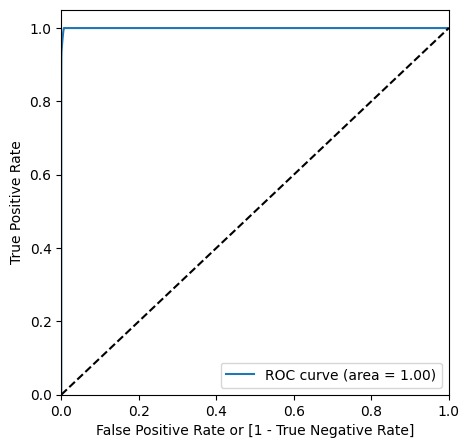

In [262]:
# Plot the ROC curve
draw_roc(y_train_ros, y_train_pred_proba)

#### Prediction on the test set

In [263]:
# Predictions on the test set
y_test_pred = dt_bal_ros_model.predict(X_test)

# Confusion matrix
confusion = metrics.confusion_matrix(y_test, y_test_pred)
print(confusion)



[[56437   429]
 [   21    75]]


In [264]:
TP = confusion[1,1] # true positive
TN = confusion[0,0] # true negatives
FP = confusion[0,1] # false positives
FN = confusion[1,0] # false negatives

In [265]:
# Accuracy
print("Accuracy:-",metrics.accuracy_score(y_test, y_test_pred))

# Sensitivity
print("Sensitivity:-",TP / float(TP+FN))

# Specificity
print("Specificity:-", TN / float(TN+FP))

Accuracy:- 0.9920999964888874
Sensitivity:- 0.78125
Specificity:- 0.99245594907326


In [266]:
# classification_report
print(classification_report(y_test, y_test_pred))

              precision    recall  f1-score   support

           0       1.00      0.99      1.00     56866
           1       0.15      0.78      0.25        96

    accuracy                           0.99     56962
   macro avg       0.57      0.89      0.62     56962
weighted avg       1.00      0.99      0.99     56962



In [267]:
# Predicted probability
y_test_pred_proba = dt_bal_ros_model.predict_proba(X_test)[:,1]

# roc_auc
auc = metrics.roc_auc_score(y_test, y_test_pred_proba)
auc

0.8896181556935018

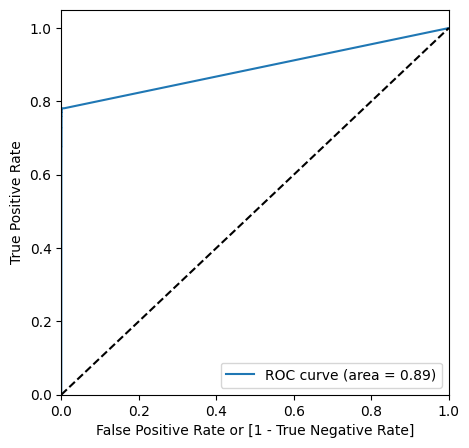

In [268]:
# Plot the ROC curve
draw_roc(y_test, y_test_pred_proba)

#### Model Summary based in test data

* Accuracy:- 0.9920999964888874
* Sensitivity:- 0.78125
* Specificity:- 0.99245594907326
* ROC - 0.89

## SMOTE

In [270]:
# import SMOTE
from imblearn.over_sampling import SMOTE

# instantiate SMOTE
sm = SMOTE(random_state=27)
# Fit SMOTE to the train set
X_train_smote, y_train_smote = sm.fit_resample(X_train, y_train)

print('Prior to SMOTE oversampling X_train shape=',X_train.shape)
print('Post SMOTE oversampling X_train shape=',X_train_smote.shape)

Prior to SMOTE oversampling X_train shape= (227845, 29)
Post SMOTE oversampling X_train shape= (454898, 29)


#### Logistic REgression

In [271]:
# Creating KFold object with 5 splits
folds = KFold(n_splits=5, shuffle=True, random_state=4)

# Specify params
params = {"C": [0.01, 0.1, 1, 10, 100, 1000]}

# Specifing score as roc-auc
model_cv = GridSearchCV(estimator = LogisticRegression(),
                        param_grid = params,
                        scoring= 'roc_auc',
                        cv = folds,
                        verbose = 1,
                        return_train_score=True)

# Fit the model
model_cv.fit(X_train_smote, y_train_smote)

Fitting 5 folds for each of 6 candidates, totalling 30 fits


GridSearchCV(cv=KFold(n_splits=5, random_state=4, shuffle=True),
             estimator=LogisticRegression(),
             param_grid={'C': [0.01, 0.1, 1, 10, 100, 1000]},
             return_train_score=True, scoring='roc_auc', verbose=1)

In [272]:
#grid srch results
cv_results = pd.DataFrame(model_cv.cv_results_)
cv_results

mean_fit_time  std_fit_time  mean_score_time  std_score_time  param_C  \
0       2.232245      0.397001         0.099375        0.049779     0.01   
1       2.064602      0.684298         0.080241        0.045536     0.10   
2       2.262425      0.611728         0.092147        0.046405     1.00   
3       2.203095      0.492175         0.089450        0.033887    10.00   
4       2.655073      0.345806         0.108104        0.034356   100.00   
5       1.965582      0.581642         0.071841        0.021922  1000.00   

        params  split0_test_score  split1_test_score  split2_test_score  \
0  {'C': 0.01}           0.989807           0.989807           0.989494   
1   {'C': 0.1}           0.989844           0.989820           0.989503   
2     {'C': 1}           0.989847           0.989825           0.989502   
3    {'C': 10}           0.989847           0.989825           0.989502   
4   {'C': 100}           0.989847           0.989825           0.989502   
5  {'C': 1000}           0.989847           0.989825           0.989502   

   split3_test_score  split4_test_score  mean_test_score  std_test_score  \
0           0.989635           0.989915         0.989731        0.000149   
1           0.989646           0.989952         0.989753        0.000159   
2           0.989644           0.989955         0.989755        0.000161   
3           0.989644           0.989955         0.989755        0.000161   
4           0.989644           0.989955         0.989755        0.000161   
5           0.989644           0.989955         0.989755        0.000161   

   rank_test_score  split0_train_score  split1_train_score  \
0                6            0.989764            0.989675   
1                5            0.989795            0.989696   
2                4            0.989797            0.989701   
3                3            0.989797            0.989701   
4                2            0.989797            0.989701   
5                1            0.989797            0.989701   

   split2_train_score  split3_train_score  split4_train_score  \
0            0.989768            0.989844            0.989688   
1            0.989784            0.989864            0.989712   
2            0.989785            0.989865            0.989713   
3            0.989785            0.989865            0.989714   
4            0.989785            0.989865            0.989714   
5            0.989785            0.989865            0.989714   

   mean_train_score  std_train_score  
0          0.989748         0.000061  
1          0.989770         0.000061  
2          0.989772         0.000060  
3          0.989772         0.000060  
4          0.989772         0.000060  
5          0.989772         0.000060

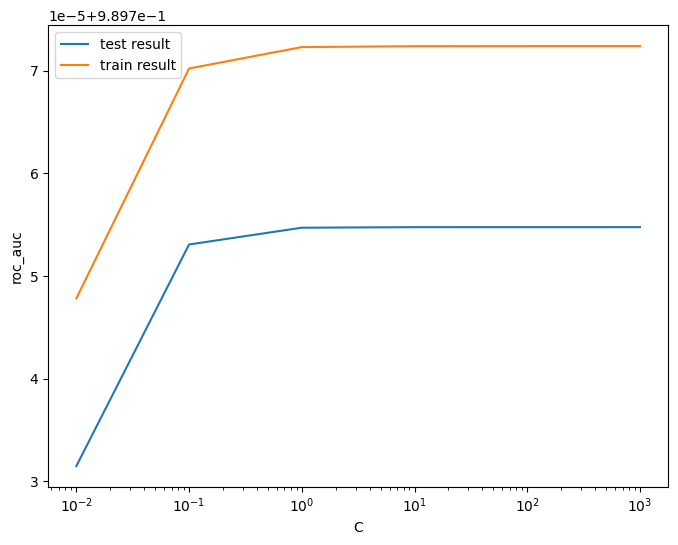

In [273]:
# plot of C versus train and validation scores

plt.figure(figsize=(8, 6))
plt.plot(cv_results['param_C'], cv_results['mean_test_score'])
plt.plot(cv_results['param_C'], cv_results['mean_train_score'])
plt.xlabel('C')
plt.ylabel('roc_auc')
plt.legend(['test result', 'train result'], loc='upper left')
plt.xscale('log')

In [274]:
# Best score with best C
best_score = model_cv.best_score_
best_C = model_cv.best_params_['C']

print(" Highest test roc_auc is {0} at C = {1}".format(best_score, best_C))

 Highest test roc_auc is 0.9897547669810569 at C = 1000


#### Logistic regression using optimal C

In [275]:
# Instantiate the model with best C
logistic_bal_smote = LogisticRegression(C=1000)

# Fit the model on the train set
logistic_bal_smote_model = logistic_bal_smote.fit(X_train_smote, y_train_smote)

#### Prediction on the train set

In [276]:
# Predictions on the train set
y_train_pred = logistic_bal_smote_model.predict(X_train_smote)

# Confusion matrix
confusion = metrics.confusion_matrix(y_train_smote, y_train_pred)
print(confusion)

[[221877   5572]
 [ 17668 209781]]


In [277]:
TP = confusion[1,1] # true positive
TN = confusion[0,0] # true negatives
FP = confusion[0,1] # false positives
FN = confusion[1,0] # false negatives

# Accuracy
print("Accuracy:-",metrics.accuracy_score(y_train_smote, y_train_pred))

# Sensitivity
print("Sensitivity:-",TP / float(TP+FN))

# Specificity
print("Specificity:-", TN / float(TN+FP))




Accuracy:- 0.9489116241443136
Sensitivity:- 0.92232104779533
Specificity:- 0.9755022004932974


In [278]:
# classification_report
print(classification_report(y_train_smote, y_train_pred))

              precision    recall  f1-score   support

           0       0.93      0.98      0.95    227449
           1       0.97      0.92      0.95    227449

    accuracy                           0.95    454898
   macro avg       0.95      0.95      0.95    454898
weighted avg       0.95      0.95      0.95    454898



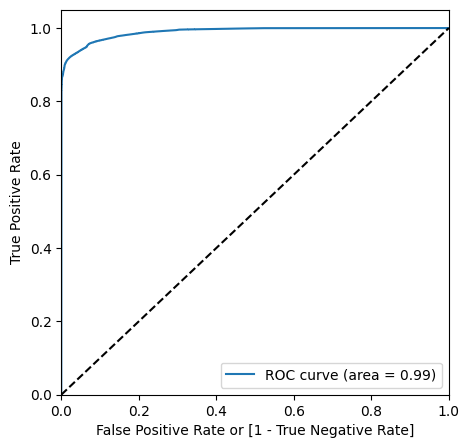

In [279]:
# Predicted probability
y_train_pred_proba_log_bal_smote = logistic_bal_smote_model.predict_proba(X_train_smote)[:,1]

# Plot the ROC curve
draw_roc(y_train_smote, y_train_pred_proba_log_bal_smote)

#### Prediction on the test set

In [280]:
# Prediction on the test set
y_test_pred = logistic_bal_smote_model.predict(X_test)

# Confusion matrix
confusion = metrics.confusion_matrix(y_test, y_test_pred)
print(confusion)

[[55413  1453]
 [   10    86]]


In [281]:
TP = confusion[1,1] # true positive
TN = confusion[0,0] # true negatives
FP = confusion[0,1] # false positives
FN = confusion[1,0] # false negatives


# Accuracy
print("Accuracy:-",metrics.accuracy_score(y_test, y_test_pred))

# Sensitivity
print("Sensitivity:-",TP / float(TP+FN))

# Specificity
print("Specificity:-", TN / float(TN+FP))

Accuracy:- 0.9743162108072048
Sensitivity:- 0.8958333333333334
Specificity:- 0.9744487039707382


In [282]:
# classification_report
print(classification_report(y_test, y_test_pred))

              precision    recall  f1-score   support

           0       1.00      0.97      0.99     56866
           1       0.06      0.90      0.11        96

    accuracy                           0.97     56962
   macro avg       0.53      0.94      0.55     56962
weighted avg       1.00      0.97      0.99     56962



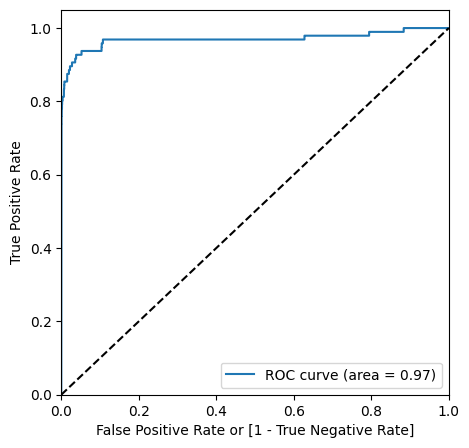

In [283]:
# Predicted probability
y_test_pred_proba = logistic_bal_smote_model.predict_proba(X_test)[:,1]

# Plot the ROC curve
draw_roc(y_test, y_test_pred_proba)

#### Model summary based in test data

* Accuracy:- 0.9743162108072048
* Sensitivity:- 0.8958333333333334
* Specificity:- 0.9744487039707382
* ROC = 0.97

### XGBoost

In [284]:
# creating a KFold object
folds = 3

# specify range of hyperparameters
param_grid = {'learning_rate': [0.2, 0.6],
             'subsample': [0.3, 0.6, 0.9]}


# specify model
xgb_model = XGBClassifier(max_depth=2, n_estimators=200)

# set up GridSearchCV()
model_cv = GridSearchCV(estimator = xgb_model,
                        param_grid = param_grid,
                        scoring= 'roc_auc',
                        cv = folds,
                        verbose = 1,
                        return_train_score=True)

# fit the model
model_cv.fit(X_train_smote, y_train_smote)

Fitting 3 folds for each of 6 candidates, totalling 18 fits


GridSearchCV(cv=3,
             estimator=XGBClassifier(base_score=None, booster=None,
                                     callbacks=None, colsample_bylevel=None,
                                     colsample_bynode=None,
                                     colsample_bytree=None, device=None,
                                     early_stopping_rounds=None,
                                     enable_categorical=False, eval_metric=None,
                                     feature_types=None, gamma=None,
                                     grow_policy=None, importance_type=None,
                                     interaction_constraints=None,
                                     learning_rate=None,...
                                     max_cat_threshold=None,
                                     max_cat_to_onehot=None,
                                     max_delta_step=None, max_depth=2,
                                     max_leaves=None, min_child_weight=None,
                                     missing=nan, monotone_constraints=None,
                                     multi_strategy=None, n_estimators=200,
                                     n_jobs=None, num_parallel_tree=None,
                                     random_state=None, ...),
             param_grid={'learning_rate': [0.2, 0.6],
                         'subsample': [0.3, 0.6, 0.9]},
             return_train_score=True, scoring='roc_auc', verbose=1)

In [285]:
cv_results = pd.DataFrame(model_cv.cv_results_)
cv_results

mean_fit_time  std_fit_time  mean_score_time  std_score_time  \
0      16.986714      3.235213         0.337772        0.054086   
1      10.967883      5.113776         0.517294        0.202296   
2      10.865446      2.925469         0.387707        0.075686   
3       7.320710      1.475169         0.261574        0.004953   
4       8.060597      1.194485         0.356046        0.095969   
5       8.128517      1.514559         0.259641        0.003717   

   param_learning_rate  param_subsample  \
0                  0.2              0.3   
1                  0.2              0.6   
2                  0.2              0.9   
3                  0.6              0.3   
4                  0.6              0.6   
5                  0.6              0.9   

                                     params  split0_test_score  \
0  {'learning_rate': 0.2, 'subsample': 0.3}           0.999680   
1  {'learning_rate': 0.2, 'subsample': 0.6}           0.999638   
2  {'learning_rate': 0.2, 'subsample': 0.9}           0.999653   
3  {'learning_rate': 0.6, 'subsample': 0.3}           0.999946   
4  {'learning_rate': 0.6, 'subsample': 0.6}           0.999962   
5  {'learning_rate': 0.6, 'subsample': 0.9}           0.999961   

   split1_test_score  split2_test_score  mean_test_score  std_test_score  \
0           0.999733           0.999688         0.999700        0.000023   
1           0.999685           0.999643         0.999655        0.000021   
2           0.999713           0.999666         0.999677        0.000026   
3           0.999949           0.999958         0.999951        0.000005   
4           0.999960           0.999948         0.999957        0.000006   
5           0.999959           0.999947         0.999956        0.000006   

   rank_test_score  split0_train_score  split1_train_score  \
0                4            0.999734            0.999717   
1                6            0.999697            0.999665   
2                5            0.999709            0.999690   
3                3            0.999971            0.999976   
4                1            0.999978            0.999980   
5                2            0.999975            0.999976   

   split2_train_score  mean_train_score  std_train_score  
0            0.999732          0.999728     7.836597e-06  
1            0.999700          0.999687     1.564699e-05  
2            0.999717          0.999705     1.139170e-05  
3            0.999983          0.999976     4.730254e-06  
4            0.999980          0.999979     1.054078e-06  
5            0.999977          0.999976     8.060376e-07

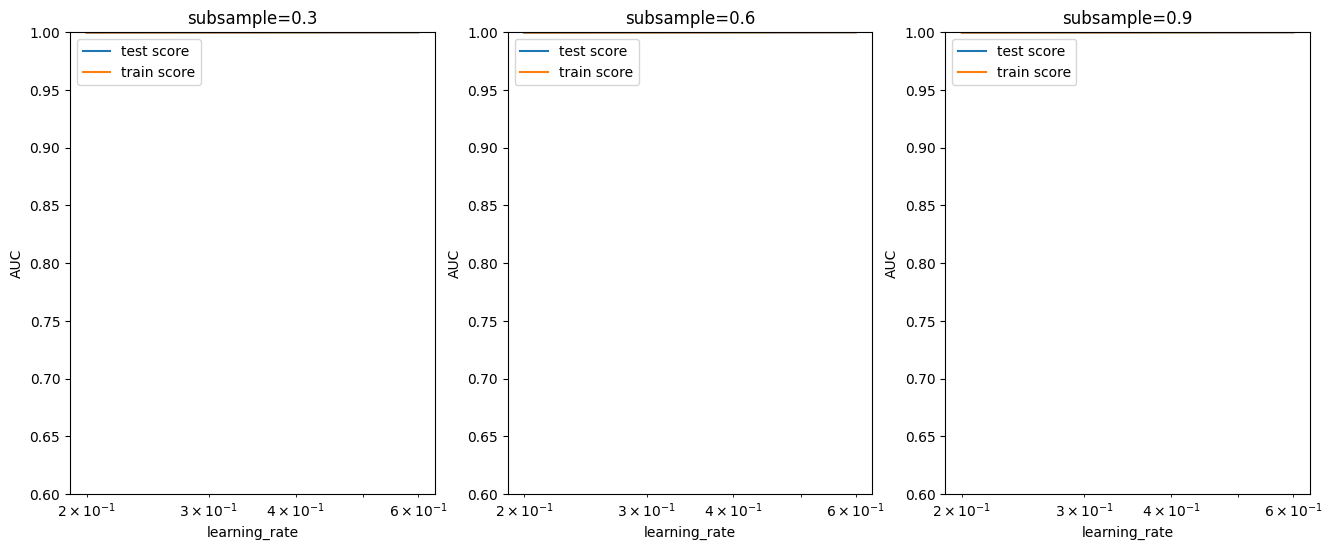

In [286]:
# lets plot
plt.figure(figsize=(16,6))

param_grid = {'learning_rate': [0.2, 0.6],
             'subsample': [0.3, 0.6, 0.9]}


for n, subsample in enumerate(param_grid['subsample']):


    # subplot 1/n
    plt.subplot(1,len(param_grid['subsample']), n+1)
    df = cv_results[cv_results['param_subsample']==subsample]

    plt.plot(df["param_learning_rate"], df["mean_test_score"])
    plt.plot(df["param_learning_rate"], df["mean_train_score"])
    plt.xlabel('learning_rate')
    plt.ylabel('AUC')
    plt.title("subsample={0}".format(subsample))
    plt.ylim([0.60, 1])
    plt.legend(['test score', 'train score'], loc='upper left')
    plt.xscale('log')


In [287]:
model_cv.best_params_

{'learning_rate': 0.6, 'subsample': 0.6}

In [288]:
# chosen hyperparameters
params = {'learning_rate': 0.6,
          'max_depth': 2,
          'n_estimators':200,
          'subsample':0.6,
         'objective':'binary:logistic'}

# fit model on training data
xgb_bal_smote_model = XGBClassifier(params = params)
xgb_bal_smote_model.fit(X_train_smote, y_train_smote)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None,
              num_parallel_tree=None,
              params={'learning_rate': 0.6, 'max_depth': 2, 'n_estimators': 200,
                      'objective': 'binary:logistic', 'subsample': 0.6}, ...)

#### Prediction on the train set

In [289]:
# Predictions on the train set
y_train_pred = xgb_bal_smote_model.predict(X_train_smote)

# Confusion matrix
confusion = metrics.confusion_matrix(y_train_smote, y_train_pred)
print(confusion)

[[227448      1]
 [     0 227449]]


In [290]:
TP = confusion[1,1] # true positive
TN = confusion[0,0] # true negatives
FP = confusion[0,1] # false positives
FN = confusion[1,0] # false negatives

# Accuracy
print("Accuracy:-",metrics.accuracy_score(y_train_smote, y_train_pred))

# Sensitivity
print("Sensitivity:-",TP / float(TP+FN))

# Specificity
print("Specificity:-", TN / float(TN+FP))


Accuracy:- 0.9999978017049976
Sensitivity:- 1.0
Specificity:- 0.9999956034099952


In [291]:
# classification_report
print(classification_report(y_train_smote, y_train_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00    227449
           1       1.00      1.00      1.00    227449

    accuracy                           1.00    454898
   macro avg       1.00      1.00      1.00    454898
weighted avg       1.00      1.00      1.00    454898



In [292]:
# Predicted probability
y_train_pred_proba = xgb_bal_smote_model.predict_proba(X_train_smote)[:,1]

# roc_auc
auc = metrics.roc_auc_score(y_train_smote, y_train_pred_proba)
auc

0.9999999890785479

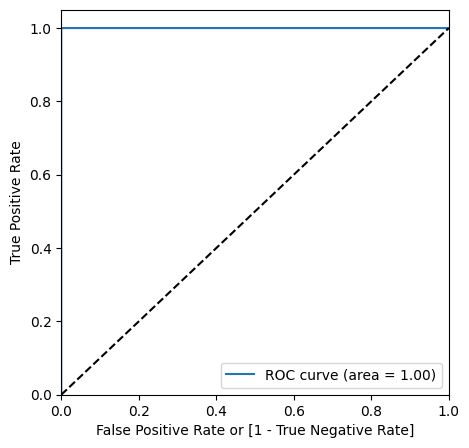

In [293]:
# Plot the ROC curve
draw_roc(y_train_smote, y_train_pred_proba)

#### Prediction on the test set

In [294]:
# Predictions on the test set
y_test_pred = xgb_bal_smote_model.predict(X_test)

# Confusion matrix
confusion = metrics.confusion_matrix(y_test, y_test_pred)
print(confusion)

[[56833    33]
 [   20    76]]


In [295]:
TP = confusion[1,1] # true positive
TN = confusion[0,0] # true negatives
FP = confusion[0,1] # false positives
FN = confusion[1,0] # false negatives

# Accuracy
print("Accuracy:-",metrics.accuracy_score(y_test, y_test_pred))

# Sensitivity
print("Sensitivity:-",TP / float(TP+FN))

# Specificity
print("Specificity:-", TN / float(TN+FP))

Accuracy:- 0.9990695551420246
Sensitivity:- 0.7916666666666666
Specificity:- 0.9994196883902507


In [296]:
# classification_report
print(classification_report(y_test, y_test_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56866
           1       0.70      0.79      0.74        96

    accuracy                           1.00     56962
   macro avg       0.85      0.90      0.87     56962
weighted avg       1.00      1.00      1.00     56962



In [297]:
# Predicted probability
y_test_pred_proba = xgb_bal_smote_model.predict_proba(X_test)[:,1]

# roc_auc
auc = metrics.roc_auc_score(y_test, y_test_pred_proba)
auc

0.9553290117703608

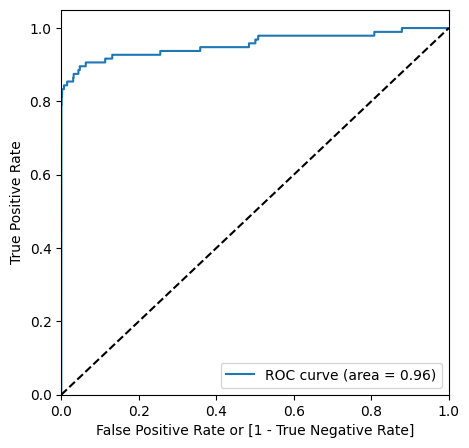

In [298]:
# Plot the ROC curve
draw_roc(y_test, y_test_pred_proba)

#### Model syummary based on test data\

* Accuracy:- 0.9990695551420246
* Sensitivity:- 0.7916666666666666
* Specificity:- 0.9994196883902507
* ROC - 0.96

### Decision Tree

In [299]:
# Create the parameter grid
param_grid = {
    'max_depth': range(5, 15, 5),
    'min_samples_leaf': range(50, 150, 50),
    'min_samples_split': range(50, 150, 50),
}


# Instantiate the grid search model
dtree = DecisionTreeClassifier()

grid_search = GridSearchCV(estimator = dtree,
                           param_grid = param_grid,
                           scoring= 'roc_auc',
                           cv = 3,
                           verbose = 1)

# Fit the grid search to the data
grid_search.fit(X_train_smote,y_train_smote)

Fitting 3 folds for each of 8 candidates, totalling 24 fits


GridSearchCV(cv=3, estimator=DecisionTreeClassifier(),
             param_grid={'max_depth': range(5, 15, 5),
                         'min_samples_leaf': range(50, 150, 50),
                         'min_samples_split': range(50, 150, 50)},
             scoring='roc_auc', verbose=1)

In [300]:
cv_results = pd.DataFrame(grid_search.cv_results_)
cv_results

mean_fit_time  std_fit_time  mean_score_time  std_score_time  \
0      13.599169      3.871859         0.062971        0.013743   
1      12.082719      2.926967         0.062797        0.011572   
2      10.287681      0.273940         0.061186        0.011718   
3      11.201985      1.047219         0.064087        0.011418   
4      18.728475      0.197740         0.069782        0.014291   
5      18.885376      0.294397         0.058688        0.001595   
6      19.479872      0.765985         0.064915        0.007966   
7      19.055678      0.467814         0.075017        0.020161   

   param_max_depth  param_min_samples_leaf  param_min_samples_split  \
0                5                      50                       50   
1                5                      50                      100   
2                5                     100                       50   
3                5                     100                      100   
4               10                      50                       50   
5               10                      50                      100   
6               10                     100                       50   
7               10                     100                      100   

                                              params  split0_test_score  \
0  {'max_depth': 5, 'min_samples_leaf': 50, 'min_...           0.986127   
1  {'max_depth': 5, 'min_samples_leaf': 50, 'min_...           0.986127   
2  {'max_depth': 5, 'min_samples_leaf': 100, 'min...           0.986053   
3  {'max_depth': 5, 'min_samples_leaf': 100, 'min...           0.986068   
4  {'max_depth': 10, 'min_samples_leaf': 50, 'min...           0.998167   
5  {'max_depth': 10, 'min_samples_leaf': 50, 'min...           0.998108   
6  {'max_depth': 10, 'min_samples_leaf': 100, 'mi...           0.998118   
7  {'max_depth': 10, 'min_samples_leaf': 100, 'mi...           0.998097   

   split1_test_score  split2_test_score  mean_test_score  std_test_score  \
0           0.985690           0.984839         0.985552        0.000535   
1           0.985688           0.984839         0.985551        0.000535   
2           0.985642           0.984773         0.985490        0.000534   
3           0.985637           0.984768         0.985491        0.000541   
4           0.998134           0.997986         0.998096        0.000079   
5           0.998142           0.998052         0.998101        0.000037   
6           0.998054           0.997893         0.998022        0.000094   
7           0.998046           0.997951         0.998031        0.000060   

   rank_test_score  
0                5  
1                6  
2                8  
3                7  
4                2  
5                1  
6                4  
7                3

In [300]:
# print the optimal sensitivity score and hyperparameters
print("Best roc_auc:-", grid_search.best_score_)
print(grid_search.best_estimator_)

In [301]:
# Model with optimal hyperparameters
dt_bal_smote_model = DecisionTreeClassifier(criterion = "gini",
                                  random_state = 100,
                                  max_depth=10,
                                  min_samples_leaf=50,
                                  min_samples_split=100)

dt_bal_smote_model.fit(X_train_smote, y_train_smote)

DecisionTreeClassifier(max_depth=10, min_samples_leaf=50, min_samples_split=100,
                       random_state=100)

#### Prediction on the train set

In [302]:
# Predictions on the train set
y_train_pred = dt_bal_smote_model.predict(X_train_smote)

# Confusion matrix
confusion = metrics.confusion_matrix(y_train_smote, y_train_pred)
print(confusion)

[[223809   3640]
 [  2374 225075]]


In [303]:
TP = confusion[1,1] # true positive
TN = confusion[0,0] # true negatives
FP = confusion[0,1] # false positives
FN = confusion[1,0] # false negatives

# Accuracy
print("Accuracy:-",metrics.accuracy_score(y_train_smote, y_train_pred))

# Sensitivity
print("Sensitivity:-",TP / float(TP+FN))

# Specificity
print("Specificity:-", TN / float(TN+FP))



Accuracy:- 0.9867794538555896
Sensitivity:- 0.9895624953286232
Specificity:- 0.9839964123825561


In [304]:
# classification_report
print(classification_report(y_train_smote, y_train_pred))

              precision    recall  f1-score   support

           0       0.99      0.98      0.99    227449
           1       0.98      0.99      0.99    227449

    accuracy                           0.99    454898
   macro avg       0.99      0.99      0.99    454898
weighted avg       0.99      0.99      0.99    454898



In [305]:
# Predicted probability
y_train_pred_proba = dt_bal_smote_model.predict_proba(X_train_smote)[:,1]

# roc_auc
auc = metrics.roc_auc_score(y_train_smote, y_train_pred_proba)
auc



0.9986355757920081

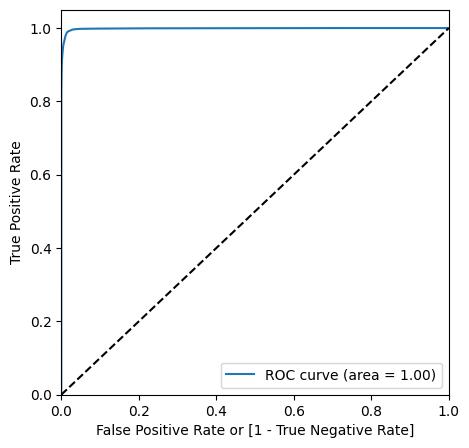

In [306]:
# Plot the ROC curve
draw_roc(y_train_smote, y_train_pred_proba)

#### Prediction on the test set

In [307]:
# Predictions on the test set
y_test_pred = dt_bal_smote_model.predict(X_test)

# Confusion matrix
confusion = metrics.confusion_matrix(y_test, y_test_pred)
print(confusion)

[[55852  1014]
 [   19    77]]


In [308]:
TP = confusion[1,1] # true positive
TN = confusion[0,0] # true negatives
FP = confusion[0,1] # false positives
FN = confusion[1,0] # false negatives

# Accuracy
print("Accuracy:-",metrics.accuracy_score(y_test, y_test_pred))

# Sensitivity
print("Sensitivity:-",TP / float(TP+FN))

# Specificity
print("Specificity:-", TN / float(TN+FP))

Accuracy:- 0.9818651030511569
Sensitivity:- 0.8020833333333334
Specificity:- 0.9821686069004326


In [309]:
# classification_report
print(classification_report(y_test, y_test_pred))

              precision    recall  f1-score   support

           0       1.00      0.98      0.99     56866
           1       0.07      0.80      0.13        96

    accuracy                           0.98     56962
   macro avg       0.54      0.89      0.56     56962
weighted avg       1.00      0.98      0.99     56962



In [310]:
# Predicted probability
y_test_pred_proba = dt_bal_smote_model.predict_proba(X_test)[:,1]

# roc_auc
auc = metrics.roc_auc_score(y_test, y_test_pred_proba)
auc

0.8551876157692353

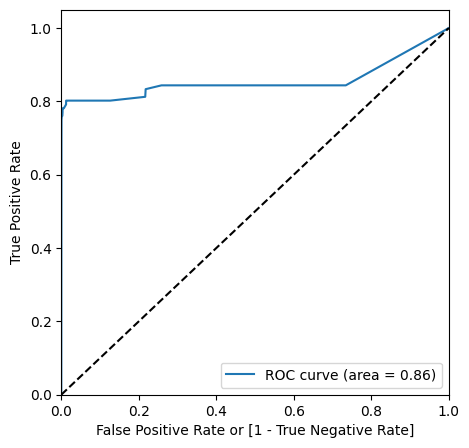

In [311]:
# Plot the ROC curve
draw_roc(y_test, y_test_pred_proba)

#### Model Summary based in test data

* Accuracy:- 0.9818651030511569
* Sensitivity:- 0.8020833333333334
* Specificity:- 0.9821686069004326
* ROC = 0.86

## AdaSyn

In [312]:
# import adasyn
from imblearn.over_sampling import ADASYN

# Instantiate adasyn
ada = ADASYN(random_state=0)
X_train_adasyn, y_train_adasyn = ada.fit_resample(X_train, y_train)

# Befor sampling class distribution
print('Before sampling class distribution:-',Counter(y_train))
# new class distribution
print('New class distribution:-',Counter(y_train_adasyn))

Before sampling class distribution:- Counter({0: 227449, 1: 396})
New class distribution:- Counter({0: 227449, 1: 227448})


### Logistic Regression

In [313]:
# Creating KFold object with 3 splits
folds = KFold(n_splits=3, shuffle=True, random_state=4)

# Specify params
params = {"C": [0.01, 0.1, 1, 10, 100, 1000]}

# Specifing score as roc-auc
model_cv = GridSearchCV(estimator = LogisticRegression(),
                        param_grid = params,
                        scoring= 'roc_auc',
                        cv = folds,
                        verbose = 1,
                        return_train_score=True)

# Fit the model
model_cv.fit(X_train_adasyn, y_train_adasyn)

Fitting 3 folds for each of 6 candidates, totalling 18 fits


GridSearchCV(cv=KFold(n_splits=3, random_state=4, shuffle=True),
             estimator=LogisticRegression(),
             param_grid={'C': [0.01, 0.1, 1, 10, 100, 1000]},
             return_train_score=True, scoring='roc_auc', verbose=1)

In [314]:
cv_results = pd.DataFrame(model_cv.cv_results_)
cv_results

mean_fit_time  std_fit_time  mean_score_time  std_score_time  param_C  \
0       1.294785      0.214575         0.092098        0.003894     0.01   
1       1.228258      0.017200         0.092524        0.002412     0.10   
2       2.521490      0.781749         0.178025        0.027542     1.00   
3       2.116746      0.085380         0.108188        0.021938    10.00   
4       2.618039      0.431796         0.186841        0.004962   100.00   
5       2.095931      0.149172         0.157457        0.038572  1000.00   

        params  split0_test_score  split1_test_score  split2_test_score  \
0  {'C': 0.01}           0.963486           0.962321           0.963286   
1   {'C': 0.1}           0.963598           0.962445           0.963375   
2     {'C': 1}           0.963600           0.962453           0.963379   
3    {'C': 10}           0.963600           0.962454           0.963380   
4   {'C': 100}           0.963600           0.962454           0.963380   
5  {'C': 1000}           0.963600           0.962454           0.963380   

   mean_test_score  std_test_score  rank_test_score  split0_train_score  \
0         0.963031        0.000509                6            0.962783   
1         0.963139        0.000499                5            0.962901   
2         0.963144        0.000497                4            0.962905   
3         0.963145        0.000496                3            0.962906   
4         0.963145        0.000496                2            0.962906   
5         0.963145        0.000496                1            0.962906   

   split1_train_score  split2_train_score  mean_train_score  std_train_score  
0            0.963208            0.963184          0.963059         0.000195  
1            0.963314            0.963277          0.963164         0.000187  
2            0.963320            0.963282          0.963169         0.000187  
3            0.963321            0.963282          0.963170         0.000187  
4            0.963321            0.963282          0.963170         0.000187  
5            0.963321            0.963282          0.963170         0.000187

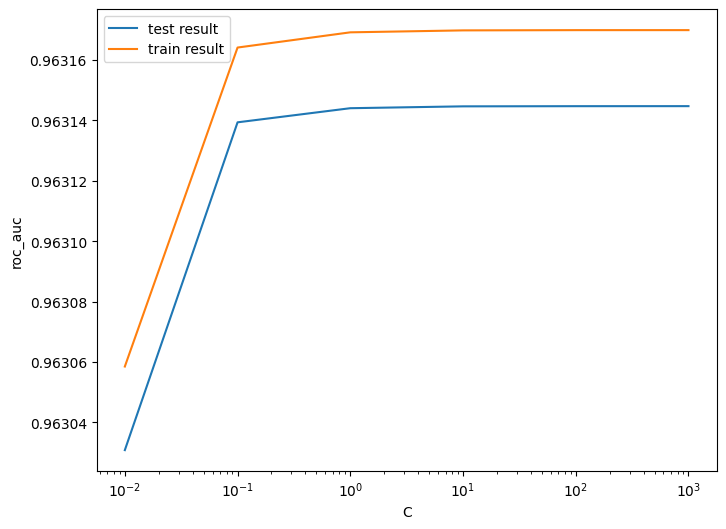

In [315]:
# plot of C versus train and validation scores

plt.figure(figsize=(8, 6))
plt.plot(cv_results['param_C'], cv_results['mean_test_score'])
plt.plot(cv_results['param_C'], cv_results['mean_train_score'])
plt.xlabel('C')
plt.ylabel('roc_auc')
plt.legend(['test result', 'train result'], loc='upper left')
plt.xscale('log')

In [316]:
# Best score with best C
best_score = model_cv.best_score_
best_C = model_cv.best_params_['C']

print(" The Best roc_auc is {0} at C = {1}".format(best_score, best_C))

 The Best roc_auc is 0.9631447476364444 at C = 1000


#### Logistic regression with optimal C

In [317]:
# Instantiate the model with best C
logistic_bal_adasyn = LogisticRegression(C=1000)

# Fit the model on the train set
logistic_bal_adasyn_model = logistic_bal_adasyn.fit(X_train_adasyn, y_train_adasyn)

#### Prediction in Tran set

In [318]:
# Predictions on the train set
y_train_pred = logistic_bal_adasyn_model.predict(X_train_adasyn)

# Confusion matrix
confusion = metrics.confusion_matrix(y_train_adasyn, y_train_pred)
print(confusion)

[[207033  20416]
 [ 31286 196162]]


In [319]:
TP = confusion[1,1] # true positive
TN = confusion[0,0] # true negatives
FP = confusion[0,1] # false positives
FN = confusion[1,0] # false negatives

# Accuracy
print("Accuracy:-",metrics.accuracy_score(y_train_adasyn, y_train_pred))

# Sensitivity
print("Sensitivity:-",TP / float(TP+FN))

# Specificity
print("Specificity:-", TN / float(TN+FP))

# F1 score
print("F1Score:-", f1_score(y_train_adasyn, y_train_pred))

Accuracy:- 0.886343501935603
Sensitivity:- 0.862447680348915
Specificity:- 0.9102392184621607
F1Score:- 0.8835608725615167


In [320]:
# classification_report
print(classification_report(y_train_adasyn, y_train_pred))

              precision    recall  f1-score   support

           0       0.87      0.91      0.89    227449
           1       0.91      0.86      0.88    227448

    accuracy                           0.89    454897
   macro avg       0.89      0.89      0.89    454897
weighted avg       0.89      0.89      0.89    454897



In [321]:
# Predicted probability
y_train_pred_proba = logistic_bal_adasyn_model.predict_proba(X_train_adasyn)[:,1]

# roc_auc
auc = metrics.roc_auc_score(y_train_adasyn, y_train_pred_proba)
auc

0.9631757345452517

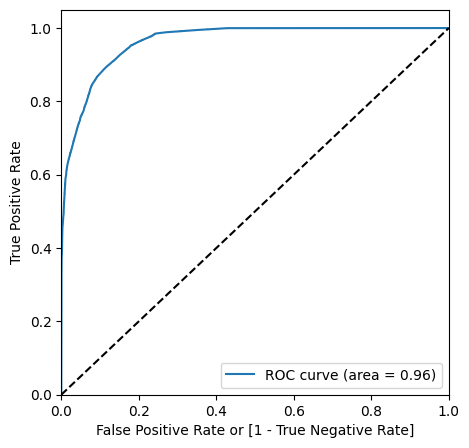

In [322]:
# Plot the ROC curve
draw_roc(y_train_adasyn, y_train_pred_proba)

In [323]:
#### Prediction on the test set

In [324]:
# Prediction on the test set
y_test_pred = logistic_bal_adasyn_model.predict(X_test)

# Confusion matrix
confusion = metrics.confusion_matrix(y_test, y_test_pred)
print(confusion)

[[51643  5223]
 [    4    92]]


In [325]:
TP = confusion[1,1] # true positive
TN = confusion[0,0] # true negatives
FP = confusion[0,1] # false positives
FN = confusion[1,0] # false negatives

# Accuracy
print("Accuracy:-",metrics.accuracy_score(y_test, y_test_pred))

# Sensitivity
print("Sensitivity:-",TP / float(TP+FN))

# Specificity
print("Specificity:-", TN / float(TN+FP))

Accuracy:- 0.9082370703275868
Sensitivity:- 0.9583333333333334
Specificity:- 0.908152498856962


In [326]:
# classification_report
print(classification_report(y_test, y_test_pred))

              precision    recall  f1-score   support

           0       1.00      0.91      0.95     56866
           1       0.02      0.96      0.03        96

    accuracy                           0.91     56962
   macro avg       0.51      0.93      0.49     56962
weighted avg       1.00      0.91      0.95     56962



In [327]:
# Predicted probability
y_test_pred_proba = logistic_bal_adasyn_model.predict_proba(X_test)[:,1]

# roc_auc
auc = metrics.roc_auc_score(y_test, y_test_pred_proba)
auc

0.9671461747793058

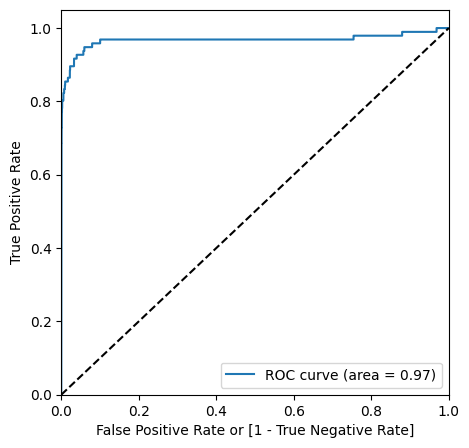

In [328]:
# Plot the ROC curve
draw_roc(y_test, y_test_pred_proba)

#### Model summary on test data

Accuracy:- 0.9082370703275868
Sensitivity:- 0.9583333333333334
Specificity:- 0.908152498856962
ROC = 0.97

### DEcision Tree

In [329]:
# Create the parameter grid
param_grid = {
    'max_depth': range(5, 15, 5),
    'min_samples_leaf': range(50, 150, 50),
    'min_samples_split': range(50, 150, 50),
}


# Instantiate the grid search model
dtree = DecisionTreeClassifier()

grid_search = GridSearchCV(estimator = dtree,
                           param_grid = param_grid,
                           scoring= 'roc_auc',
                           cv = 3,
                           verbose = 1)

# Fit the grid search to the data
grid_search.fit(X_train_adasyn,y_train_adasyn)

Fitting 3 folds for each of 8 candidates, totalling 24 fits


GridSearchCV(cv=3, estimator=DecisionTreeClassifier(),
             param_grid={'max_depth': range(5, 15, 5),
                         'min_samples_leaf': range(50, 150, 50),
                         'min_samples_split': range(50, 150, 50)},
             scoring='roc_auc', verbose=1)

In [330]:
cv_results = pd.DataFrame(grid_search.cv_results_)
cv_results

mean_fit_time  std_fit_time  mean_score_time  std_score_time  \
0      19.006281      4.577380         0.097535        0.008670   
1      13.552944      1.138658         0.111845        0.042738   
2      16.969492      1.109982         0.094843        0.009368   
3      15.435127      0.627082         0.080355        0.011210   
4      30.513111      1.773844         0.129569        0.050462   
5      28.733679      3.610660         0.103233        0.035553   
6      21.395302      1.942963         0.104755        0.058047   
7      26.409286      0.799465         0.173509        0.060113   

   param_max_depth  param_min_samples_leaf  param_min_samples_split  \
0                5                      50                       50   
1                5                      50                      100   
2                5                     100                       50   
3                5                     100                      100   
4               10                      50                       50   
5               10                      50                      100   
6               10                     100                       50   
7               10                     100                      100   

                                              params  split0_test_score  \
0  {'max_depth': 5, 'min_samples_leaf': 50, 'min_...           0.902958   
1  {'max_depth': 5, 'min_samples_leaf': 50, 'min_...           0.902958   
2  {'max_depth': 5, 'min_samples_leaf': 100, 'min...           0.902958   
3  {'max_depth': 5, 'min_samples_leaf': 100, 'min...           0.902958   
4  {'max_depth': 10, 'min_samples_leaf': 50, 'min...           0.933880   
5  {'max_depth': 10, 'min_samples_leaf': 50, 'min...           0.935406   
6  {'max_depth': 10, 'min_samples_leaf': 100, 'mi...           0.937283   
7  {'max_depth': 10, 'min_samples_leaf': 100, 'mi...           0.937472   

   split1_test_score  split2_test_score  mean_test_score  std_test_score  \
0           0.920356           0.908615         0.910643        0.007246   
1           0.920355           0.908615         0.910643        0.007246   
2           0.920316           0.910801         0.911359        0.007097   
3           0.920310           0.912920         0.912063        0.007110   
4           0.946340           0.935832         0.938684        0.005472   
5           0.946917           0.935433         0.939252        0.005420   
6           0.944537           0.943763         0.941861        0.003253   
7           0.945708           0.943304         0.942161        0.003458   

   rank_test_score  
0                7  
1                8  
2                6  
3                5  
4                4  
5                3  
6                2  
7                1

In [331]:
# look at the optimal sensitivity score and hyperparameters
print("Best roc_auc:-", grid_search.best_score_)
print(grid_search.best_estimator_)

Best roc_auc:- 0.9421614143292855
DecisionTreeClassifier(max_depth=10, min_samples_leaf=100,
                       min_samples_split=100)


In [332]:
# Model with optimal hyperparameters
dt_bal_adasyn_model = DecisionTreeClassifier(criterion = "gini",
                                  random_state = 100,
                                  max_depth=10,
                                  min_samples_leaf=100,
                                  min_samples_split=50)

dt_bal_adasyn_model.fit(X_train_adasyn, y_train_adasyn)

DecisionTreeClassifier(max_depth=10, min_samples_leaf=100, min_samples_split=50,
                       random_state=100)

#### Prediction on the train set

In [333]:
# Predictions on the train set
y_train_pred = dt_bal_adasyn_model.predict(X_train_adasyn)

# Confusion matrix
confusion = metrics.confusion_matrix(y_train_adasyn, y_train_pred)
print(confusion)

[[215929  11520]
 [  1118 226330]]


In [334]:
TP = confusion[1,1] # true positive
TN = confusion[0,0] # true negatives
FP = confusion[0,1] # false positives
FN = confusion[1,0] # false negatives

# Accuracy
print("Accuracy:-",metrics.accuracy_score(y_train_adasyn, y_train_pred))

# Sensitivity
print("Sensitivity:-",TP / float(TP+FN))

# Specificity
print("Specificity:-", TN / float(TN+FP))

Accuracy:- 0.9722178866864367
Sensitivity:- 0.9950845907636031
Specificity:- 0.9493512831447929


In [335]:
# classification_report
print(classification_report(y_train_adasyn, y_train_pred))

              precision    recall  f1-score   support

           0       0.99      0.95      0.97    227449
           1       0.95      1.00      0.97    227448

    accuracy                           0.97    454897
   macro avg       0.97      0.97      0.97    454897
weighted avg       0.97      0.97      0.97    454897



In [336]:
# Predicted probability
y_train_pred_proba = dt_bal_adasyn_model.predict_proba(X_train_adasyn)[:,1]

# roc_auc
auc = metrics.roc_auc_score(y_train_adasyn, y_train_pred_proba)
auc


0.9917591040224101

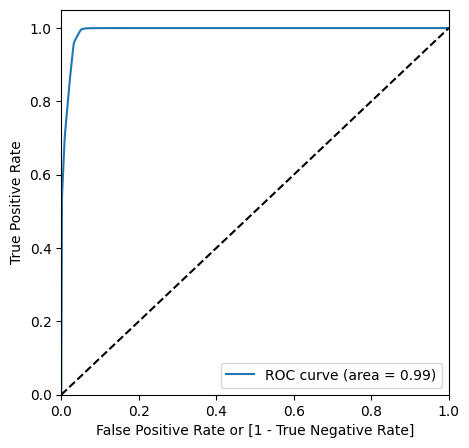

In [337]:
# Plot the ROC curve
draw_roc(y_train_adasyn, y_train_pred_proba)

#### Prediction on the test set

In [338]:
# Predictions on the test set
y_test_pred = dt_bal_adasyn_model.predict(X_test)

# Confusion matrix
confusion = metrics.confusion_matrix(y_test, y_test_pred)
print(confusion)

[[53880  2986]
 [   15    81]]


In [339]:
TP = confusion[1,1] # true positive
TN = confusion[0,0] # true negatives
FP = confusion[0,1] # false positives
FN = confusion[1,0] # false negatives


# Accuracy
print("Accuracy:-",metrics.accuracy_score(y_test, y_test_pred))

# Sensitivity
print("Sensitivity:-",TP / float(TP+FN))

# Specificity
print("Specificity:-", TN / float(TN+FP))

Accuracy:- 0.9473157543625575
Sensitivity:- 0.84375
Specificity:- 0.9474905919178419


In [340]:
# classification_report
print(classification_report(y_test, y_test_pred))

              precision    recall  f1-score   support

           0       1.00      0.95      0.97     56866
           1       0.03      0.84      0.05        96

    accuracy                           0.95     56962
   macro avg       0.51      0.90      0.51     56962
weighted avg       1.00      0.95      0.97     56962



In [341]:
# Predicted probability
y_test_pred_proba = dt_bal_adasyn_model.predict_proba(X_test)[:,1]

# roc_auc
auc = metrics.roc_auc_score(y_test, y_test_pred_proba)
auc

0.9141440147305362

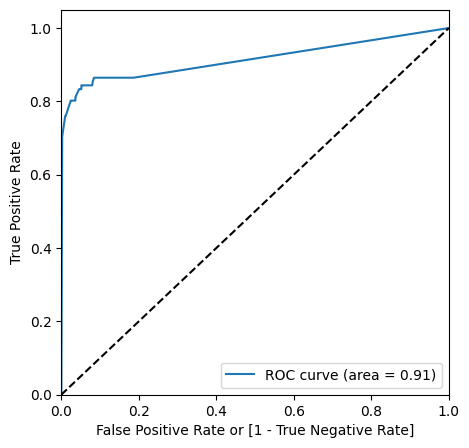

In [342]:
# Plot the ROC curve
draw_roc(y_test, y_test_pred_proba)

#### Model Summary based on test data

Accuracy:- 0.9473157543625575
Sensitivity:- 0.84375
Specificity:- 0.9474905919178419

### XGBoost

In [343]:
# creating a KFold object
folds = 3

# specify range of hyperparameters
param_grid = {'learning_rate': [0.2, 0.6],'subsample': [0.3, 0.6, 0.9]}

# specify model
xgb_model = XGBClassifier(max_depth=2, n_estimators=200)

# set up GridSearchCV()
model_cv = GridSearchCV(estimator = xgb_model,
                        param_grid = param_grid,
                        scoring= 'roc_auc',
                        cv = folds,
                        verbose = 1,
                        return_train_score=True)

# fit the model
model_cv.fit(X_train_adasyn, y_train_adasyn)

Fitting 3 folds for each of 6 candidates, totalling 18 fits


GridSearchCV(cv=3,
             estimator=XGBClassifier(base_score=None, booster=None,
                                     callbacks=None, colsample_bylevel=None,
                                     colsample_bynode=None,
                                     colsample_bytree=None, device=None,
                                     early_stopping_rounds=None,
                                     enable_categorical=False, eval_metric=None,
                                     feature_types=None, gamma=None,
                                     grow_policy=None, importance_type=None,
                                     interaction_constraints=None,
                                     learning_rate=None,...
                                     max_cat_threshold=None,
                                     max_cat_to_onehot=None,
                                     max_delta_step=None, max_depth=2,
                                     max_leaves=None, min_child_weight=None,
                                     missing=nan, monotone_constraints=None,
                                     multi_strategy=None, n_estimators=200,
                                     n_jobs=None, num_parallel_tree=None,
                                     random_state=None, ...),
             param_grid={'learning_rate': [0.2, 0.6],
                         'subsample': [0.3, 0.6, 0.9]},
             return_train_score=True, scoring='roc_auc', verbose=1)

In [344]:
cv_results = pd.DataFrame(model_cv.cv_results_)
cv_results

mean_fit_time  std_fit_time  mean_score_time  std_score_time  \
0       7.706190      1.402428         0.260489        0.012803   
1       8.512610      2.364777         0.256107        0.005914   
2       6.655187      1.535541         0.271487        0.005206   
3       7.510763      1.193310         0.319912        0.099421   
4       7.771920      1.128013         0.349105        0.105516   
5       6.636394      1.368237         0.273119        0.006874   

   param_learning_rate  param_subsample  \
0                  0.2              0.3   
1                  0.2              0.6   
2                  0.2              0.9   
3                  0.6              0.3   
4                  0.6              0.6   
5                  0.6              0.9   

                                     params  split0_test_score  \
0  {'learning_rate': 0.2, 'subsample': 0.3}           0.975756   
1  {'learning_rate': 0.2, 'subsample': 0.6}           0.976063   
2  {'learning_rate': 0.2, 'subsample': 0.9}           0.976420   
3  {'learning_rate': 0.6, 'subsample': 0.3}           0.974789   
4  {'learning_rate': 0.6, 'subsample': 0.6}           0.975207   
5  {'learning_rate': 0.6, 'subsample': 0.9}           0.974465   

   split1_test_score  split2_test_score  mean_test_score  std_test_score  \
0           0.996402           0.993919         0.988692        0.009203   
1           0.995996           0.995207         0.989088        0.009216   
2           0.996090           0.993491         0.988667        0.008725   
3           0.996623           0.994658         0.988690        0.009862   
4           0.997983           0.996377         0.989856        0.010379   
5           0.996719           0.997379         0.989521        0.010649   

   rank_test_score  split0_train_score  split1_train_score  \
0                4            0.999297            0.998992   
1                3            0.999291            0.999086   
2                6            0.999310            0.999026   
3                5            0.999911            0.999935   
4                1            0.999917            0.999937   
5                2            0.999941            0.999934   

   split2_train_score  mean_train_score  std_train_score  
0            0.999160          0.999150         0.000125  
1            0.999233          0.999203         0.000086  
2            0.999176          0.999171         0.000116  
3            0.999933          0.999926         0.000011  
4            0.999931          0.999928         0.000009  
5            0.999956          0.999944         0.000009

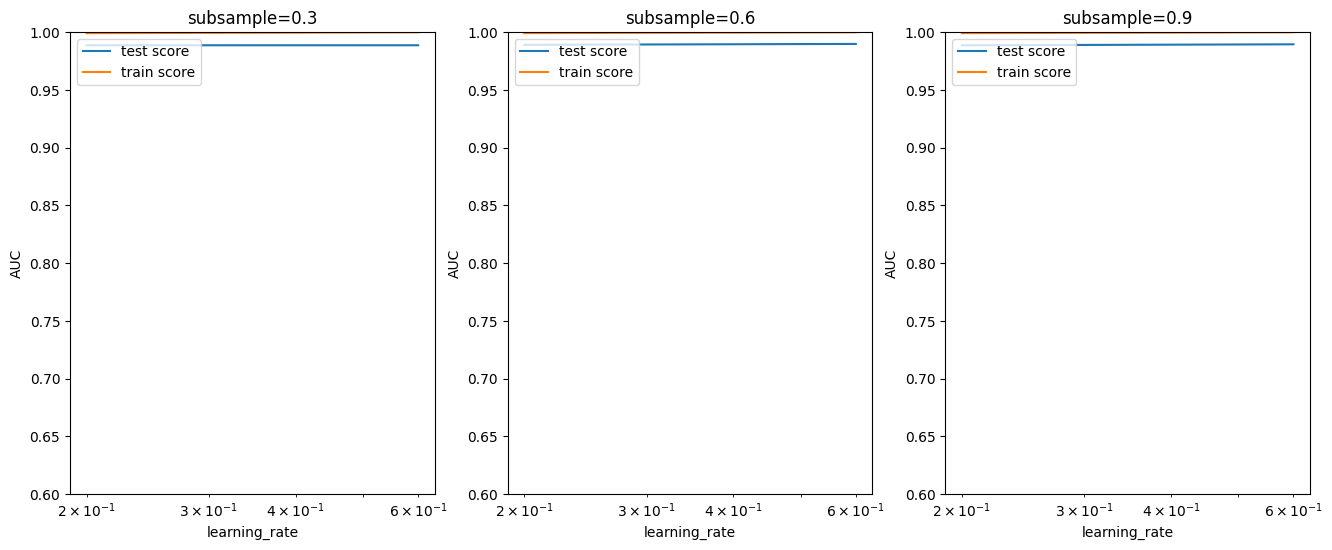

In [345]:
# plot
plt.figure(figsize=(16,6))

param_grid = {'learning_rate': [0.2, 0.6], 'subsample': [0.3, 0.6, 0.9]}

for n, subsample in enumerate(param_grid['subsample']):

    # subplot 1/n
    plt.subplot(1,len(param_grid['subsample']), n+1)
    df = cv_results[cv_results['param_subsample']==subsample]

    plt.plot(df["param_learning_rate"], df["mean_test_score"])
    plt.plot(df["param_learning_rate"], df["mean_train_score"])
    plt.xlabel('learning_rate')
    plt.ylabel('AUC')
    plt.title("subsample={0}".format(subsample))
    plt.ylim([0.60, 1])
    plt.legend(['test score', 'train score'], loc='upper left')
    plt.xscale('log')

In [346]:
model_cv.best_params_

{'learning_rate': 0.6, 'subsample': 0.6}

In [347]:
# selected hyperparameters

params = {'learning_rate': 0.6,'max_depth': 2,
          'n_estimators':200,'subsample':0.6,
         'objective':'binary:logistic'}

# fit model on training data
xgb_bal_adasyn_model = XGBClassifier(params = params)
xgb_bal_adasyn_model.fit(X_train_adasyn, y_train_adasyn)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None,
              num_parallel_tree=None,
              params={'learning_rate': 0.6, 'max_depth': 2, 'n_estimators': 200,
                      'objective': 'binary:logistic', 'subsample': 0.6}, ...)

#### Prediction on the train set

In [348]:
# Predictions on the train set
y_train_pred = xgb_bal_adasyn_model.predict(X_train_adasyn)

# Confusion matrix
confusion = metrics.confusion_matrix(y_train_adasyn, y_train_adasyn)
print(confusion)

[[227449      0]
 [     0 227448]]


In [349]:
TP = confusion[1,1] # true positive
TN = confusion[0,0] # true negatives
FP = confusion[0,1] # false positives
FN = confusion[1,0] # false negatives

# Accuracy
print("Accuracy:-",metrics.accuracy_score(y_train_adasyn, y_train_pred))

# Sensitivity
print("Sensitivity:-",TP / float(TP+FN))

# Specificity
print("Specificity:-", TN / float(TN+FP))

Accuracy:- 0.9999934051004953
Sensitivity:- 1.0
Specificity:- 1.0


In [350]:
# classification_report
print(classification_report(y_train_adasyn, y_train_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00    227449
           1       1.00      1.00      1.00    227448

    accuracy                           1.00    454897
   macro avg       1.00      1.00      1.00    454897
weighted avg       1.00      1.00      1.00    454897



In [351]:
# Predicted probability
y_train_pred_proba = xgb_bal_adasyn_model.predict_proba(X_train_adasyn)[:,1]

# roc_auc
auc = metrics.roc_auc_score(y_train_adasyn, y_train_pred_proba)
auc

1.0

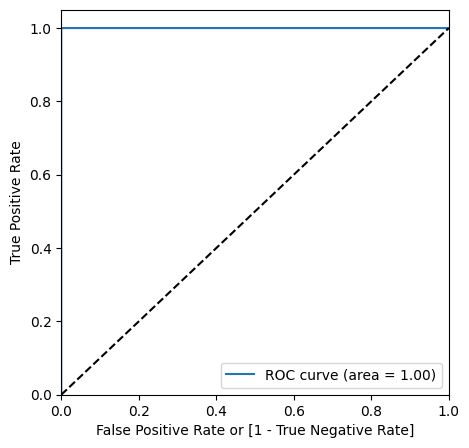

In [352]:
# Plot the ROC curve
draw_roc(y_train_adasyn, y_train_pred_proba)

#### Prediction on the test set

In [353]:
# Predictions on the test set
y_test_pred = xgb_bal_adasyn_model.predict(X_test)

# Confusion matrix
confusion = metrics.confusion_matrix(y_test, y_test_pred)
print(confusion)


[[56828    38]
 [   22    74]]


In [354]:
TP = confusion[1,1] # true positive
TN = confusion[0,0] # true negatives
FP = confusion[0,1] # false positives
FN = confusion[1,0] # false negatives

# Accuracy
print("Accuracy:-",metrics.accuracy_score(y_test, y_test_pred))

# Sensitivity
print("Sensitivity:-",TP / float(TP+FN))

# Specificity
print("Specificity:-", TN / float(TN+FP))


Accuracy:- 0.9989466661985184
Sensitivity:- 0.7708333333333334
Specificity:- 0.9993317623887736


In [355]:
# classification_report
print(classification_report(y_test, y_test_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56866
           1       0.66      0.77      0.71        96

    accuracy                           1.00     56962
   macro avg       0.83      0.89      0.86     56962
weighted avg       1.00      1.00      1.00     56962



In [356]:
# Predicted probability
y_test_pred_proba = xgb_bal_adasyn_model.predict_proba(X_test)[:,1]

# roc_auc
auc = metrics.roc_auc_score(y_test, y_test_pred_proba)
auc

0.951038589256615

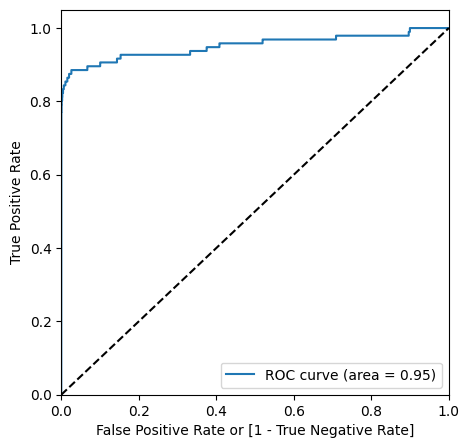

In [357]:
# Plot the ROC curve
draw_roc(y_test, y_test_pred_proba)

#### Model summary based in test data

* Accuracy:- 0.9989466661985184
* Sensitivity:- 0.7708333333333334
* Specificity:- 0.9993317623887736
* ROC - 0.95

### Best model on balanced data

Based on the analysis we infer that the Logistic regression model with AdaSyn.

Primary reason for this is ROC score  0f 0.95 we received in test data.

In [358]:
print('Train auc =', metrics.roc_auc_score(y_train_smote, y_train_pred_proba_log_bal_smote))
fpr, tpr, thresholds = metrics.roc_curve(y_train_smote, y_train_pred_proba_log_bal_smote)
threshold = thresholds[np.argmax(tpr-fpr)]
print("Threshold=",threshold)

Train auc = 0.989769064523665
Threshold= 0.5342133665453892


#### Threshold is 0.53, for which the TPR is the highest and FPR is the lowest and we got the best ROC score.

### REsponse to Banks

A low recall rate means the system fails to detect fraudulent transactions that may be classified as non-fraudulent. This oversight can lead to substantial losses, especially if a high-value fraudulent transaction slips through the cracks.

To mitigate these risks, it’s critical for banks to focus on improving recall. High recall enables the detection of actual fraudulent transactions, safeguarding against significant financial losses.

After evaluating several models, we found that the simplest Logistic Regression model, combined with the AdaSyn technique on a balanced dataset, yields promising results. This model not only achieves a strong ROC score but also maintains high recall.

By prioritizing both precision and recall, banks can effectively manage fraud detection while minimizing the burden on their resources. The choice of Logistic Regression aligns well with these goals, providing a balance between performance and ease of communication.

In conclusion, focusing on high precision for smaller transactions and high recall for larger ones enables banks to enhance their fraud detection systems effectively. Adopting the Logistic Regression model offers a practical solution that meets these needs while remaining accessible for business analysis.